In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('final.csv', dtype={'Distance Unit_x': str, 'Distance Unit_y': str})

In [3]:
data = data.rename(columns={"Lumbar Segment": "Lumbar_Segment"})
data = data.rename(columns={"Colocalisation VGLUT1": "Colocalisation_VGLUT1"})
data = data.rename(columns={"Colocalisation MMP9": "Colocalisation_MMP9"})
data = data.rename(columns={"MN Volume": "MN_Volume"})

In [4]:
data['Colocalisation_only_VGLUT'] = np.where((data['Distance to VGLUT1'] <= 0.1) & (data['Distance to MMP9'] > 2),  'Yes', 'No')


In [5]:
data['Colocalisation_VGLUT1_and_MMP9'] = np.where((data['Distance to VGLUT1'] <= 0.1) & (data['Distance to MMP9'] <= 2),  'Yes', 'No')

In [6]:
data['Colocalisation_only_MMP9'] = np.where((data['Distance to VGLUT1'] > 0.1) & (data['Distance to MMP9'] <= 2),  'Yes', 'No')


In [7]:
data['No_Colocalisation'] = np.where((data['Distance to VGLUT1'] > 0.1) & (data['Distance to MMP9'] > 2),  'Yes', 'No')


In [8]:
data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN_Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
0,0.042181,µm^3,Other,1,1001,M,1,Upper,0.850943,µm^2,...,1109.687,µm^2,1190.923,µm^3,No,No,No,No,No,Yes
1,0.070322,µm^3,Other,2,1001,M,1,Upper,1.173010,µm^2,...,1109.687,µm^2,1190.923,µm^3,No,No,No,No,No,Yes
2,0.430202,µm^3,Other,3,1001,M,1,Upper,4.984310,µm^2,...,1109.687,µm^2,1190.923,µm^3,No,No,No,No,No,Yes
3,0.104559,µm^3,Other,4,1001,M,1,Upper,1.519960,µm^2,...,1109.687,µm^2,1190.923,µm^3,No,No,No,No,No,Yes
4,0.093794,µm^3,Other,6,1001,M,1,Upper,1.327620,µm^2,...,1109.687,µm^2,1190.923,µm^3,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369560,0.128276,µm^3,Other,29685,1094,L,2,Upper,1.440850,µm^2,...,1608.070,µm^2,921.522,µm^3,No,No,No,No,No,Yes
2369561,0.118354,µm^3,Other,29686,1094,L,2,Upper,1.377840,µm^2,...,479.779,µm^2,542.236,µm^3,No,No,No,No,No,Yes
2369562,0.116735,µm^3,Other,29687,1094,L,2,Upper,1.267910,µm^2,...,1608.070,µm^2,921.522,µm^3,No,No,No,No,No,Yes
2369563,0.107981,µm^3,Other,29688,1094,L,2,Upper,1.209640,µm^2,...,479.779,µm^2,542.236,µm^3,No,Yes,No,No,Yes,No


In [9]:
data['Colocalisation_VGLUT1_and_MMP9'] = data['Colocalisation_VGLUT1_and_MMP9'].map({'No': 0, 'Yes': 1})
data['Colocalisation_only_VGLUT'] = data['Colocalisation_only_VGLUT'].map({'No': 0, 'Yes': 1})
data['Colocalisation_only_MMP9'] = data['Colocalisation_only_MMP9'].map({'No': 0, 'Yes': 1})
data['No_Colocalisation'] = data['No_Colocalisation'].map({'No': 0, 'Yes': 1})
data['Colocalisation_VGLUT1'] = data['Colocalisation_VGLUT1'].map({'No': 0, 'Yes': 1})
data['Colocalisation_MMP9'] = data['Colocalisation_MMP9'].map({'No': 0, 'Yes': 1})


In [10]:
ColocMN = pd.read_csv('MNcoloc.csv', dtype={'Distance Unit': str})

In [11]:
ColocMN = ColocMN.rename(columns={"Lumbar Segment": "Lumbar_Segment"})


In [12]:
ColocMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume
0,1001,MN A,M,Upper,3159,0,3159,287,2872,0,287,0,2872,2850.969,2783.454
1,1001,MN B,M,Upper,1639,0,1639,163,1476,0,163,0,1476,1210.523,1022.167
2,1001,MN C,M,Upper,1887,0,1887,217,1670,0,217,0,1670,1543.300,1849.940
3,1001,MN D,M,Upper,7408,0,7408,157,7251,0,157,0,7251,1109.687,1190.923
4,1001,MN E,M,Upper,3409,0,3409,74,3335,0,74,0,3335,531.328,599.755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540


In [13]:
# Mapping from Image ID to Animal number
image_to_animal = {
    1001: 1, 1002: 1, 1003: 1, 1004: 1, 1005: 1, 1006: 1, 1007: 1, 1008: 1, 1009: 1, 1010: 1,
    1011: 1, 1012: 1, 1013: 2, 1014: 2, 1015: 2, 1016: 2, 1017: 2, 1018: 2, 1019: 2, 1020: 2,
    1021: 2, 1022: 2, 1023: 2, # 1024 is omitted
    1025: 2, 1026: 2, 1027: 3, 1028: 3, 1029: 3, 1030: 3, 1031: 3, 1032: 3, 1033: 3, 1034: 3,
    1035: 1, 1036: 1, 1037: 1, 1038: 1, 1039: 1, 1040: 1, 1041: 1, 1042: 1, 1043: 1, 1044: 1,
    1045: 1, 1046: 1, 1047: 1, 1048: 2, 1049: 2, 1050: 2, 1051: 2, 1052: 2, 1053: 2, 1054: 2,
    1055: 3, 1056: 3, 1057: 3, 1058: 3, 1059: 3, 1060: 3, 1061: 1, 1062: 1, 1063: 1, 1064: 1,
    1065: 1, 1066: 1, 1067: 1, 1068: 1, 1069: 1, 1070: 3, 1071: 3, 1072: 3, 1073: 3, 1074: 3,
    1075: 3, 1076: 3, 1077: 3, 1078: 3, 1079: 3, 1080: 1, 1081: 1, 1082: 1, 1083: 1, 1084: 1,
    1085: 1, 1086: 1, 1087: 1, 1088: 1, 1089: 1, 1090: 1, 1091: 1, 1092: 1, 1093: 1, 1094: 2
}

# Assign 'Animal' column to ColocMN using the mapping
ColocMN['Animal'] = ColocMN['Image ID'].map(image_to_animal)


In [14]:
ColocMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal
0,1001,MN A,M,Upper,3159,0,3159,287,2872,0,287,0,2872,2850.969,2783.454,1
1,1001,MN B,M,Upper,1639,0,1639,163,1476,0,163,0,1476,1210.523,1022.167,1
2,1001,MN C,M,Upper,1887,0,1887,217,1670,0,217,0,1670,1543.300,1849.940,1
3,1001,MN D,M,Upper,7408,0,7408,157,7251,0,157,0,7251,1109.687,1190.923,1
4,1001,MN E,M,Upper,3409,0,3409,74,3335,0,74,0,3335,531.328,599.755,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522,2
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439,2
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110,2
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540,2


In [15]:
MN = pd.read_csv('MNcolocpercentages.csv', dtype={'Distance Unit_x': str, 'Distance Unit_y': str})

In [16]:
MN = MN.rename(columns={"Lumbar Segment": "Lumbar_Segment"})


In [17]:
# Mapping from Image ID to Animal number
image_to_animal = {
    1001: 1, 1002: 1, 1003: 1, 1004: 1, 1005: 1, 1006: 1, 1007: 1, 1008: 1, 1009: 1, 1010: 1,
    1011: 1, 1012: 1, 1013: 2, 1014: 2, 1015: 2, 1016: 2, 1017: 2, 1018: 2, 1019: 2, 1020: 2,
    1021: 2, 1022: 2, 1023: 2, # 1024 is omitted
    1025: 2, 1026: 2, 1027: 3, 1028: 3, 1029: 3, 1030: 3, 1031: 3, 1032: 3, 1033: 3, 1034: 3,
    1035: 1, 1036: 1, 1037: 1, 1038: 1, 1039: 1, 1040: 1, 1041: 1, 1042: 1, 1043: 1, 1044: 1,
    1045: 1, 1046: 1, 1047: 1, 1048: 2, 1049: 2, 1050: 2, 1051: 2, 1052: 2, 1053: 2, 1054: 2,
    1055: 3, 1056: 3, 1057: 3, 1058: 3, 1059: 3, 1060: 3, 1061: 1, 1062: 1, 1063: 1, 1064: 1,
    1065: 1, 1066: 1, 1067: 1, 1068: 1, 1069: 1, 1070: 3, 1071: 3, 1072: 3, 1073: 3, 1074: 3,
    1075: 3, 1076: 3, 1077: 3, 1078: 3, 1079: 3, 1080: 1, 1081: 1, 1082: 1, 1083: 1, 1084: 1,
    1085: 1, 1086: 1, 1087: 1, 1088: 1, 1089: 1, 1090: 1, 1091: 1, 1092: 1, 1093: 1, 1094: 2
}

# Assign 'Animal' column to ColocMN using the mapping
MN['Animal'] = MN['Image ID'].map(image_to_animal)


In [18]:
MN

,Position,Lumbar_Segment,Image ID,MN ID,Total_MNs,MNs_with_Colocalised_HC,Total_Colocalised_HCs,Percentage_MNs_with_Colocalised_HC,Average_Colocalised_HC,Average_Colocalised_HC_All,Animal
0,L,Lower,1035,MN A,1,1,3,100.0,3.0,3.0,1
1,L,Lower,1035,MN B,1,0,0,0.0,NaN,0.0,1
2,L,Lower,1035,MN C,1,1,2,100.0,2.0,2.0,1
3,L,Lower,1035,MN D,1,0,0,0.0,NaN,0.0,1
4,L,Lower,1037,MN A,1,1,6,100.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...
368,M,Upper,1091,MN C,1,1,1,100.0,1.0,1.0,1
369,M,Upper,1093,MN A,1,1,6,100.0,6.0,6.0,1
370,M,Upper,1093,MN B,1,0,0,0.0,NaN,0.0,1
371,M,Upper,1093,MN C,1,0,0,0.0,NaN,0.0,1


In [23]:
#note that colocalisedMN has been coded in by MN section using data frame MN, 
#they are similar but MN doesnt have MN volume information and column names differ
MNcolocalised = ColocMN[ColocMN["Colocalised_HC"] > 0]

In [24]:
VGLUT = pd.read_csv('VGLUTdata.csv')

In [19]:
hc_data = data[data["Type"] == "HC"]

In [20]:
other_data = data[data["Type"] == "Other"]

# Checking whether data is normally distributed

## Area

In [547]:
agg_dataArea = data.groupby(['Animal', 'Type', 'Position', 'Lumbar_Segment'], as_index=False, observed = False)['Area'].mean()

In [548]:
from scipy.stats import kstest

# Perform KS test against normal distribution
stat, p = kstest(other_data['Area'], 'norm')
print(f'Kolmogorov-Smirnov Test: D={stat:.4f}, p={p:.4f}')
print('The data is not normally distributed')

Kolmogorov-Smirnov Test: D=0.7495, p=0.0000
The data is not normally distributed


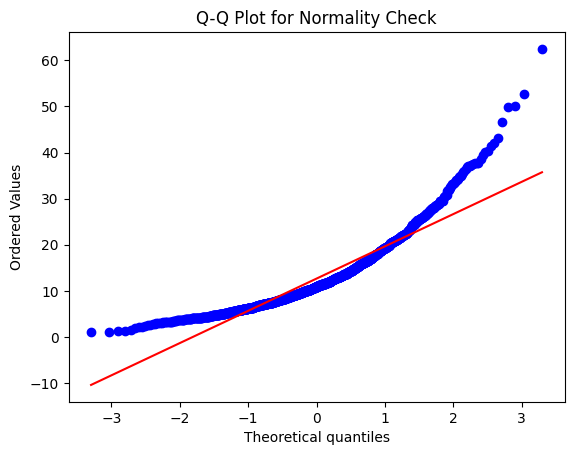

In [549]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(hc_data['Area'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Check")
plt.show()


In [551]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p = shapiro(hc_data['Area'])
print(f'Shapiro-Wilk Test: W={stat:.4f}, p={p:.4f}')
print('the data is not normally distributed')

Shapiro-Wilk Test: W=0.8787, p=0.0000
the data is not normally distributed


### Area data is not normally distributed

## Volume

In [552]:
# Volume
agg_dataVolume = data.groupby(['Animal', 'Type', 'Position', 'Lumbar_Segment'], as_index=False, observed = False)['Volume'].mean()

In [554]:
from scipy.stats import kstest

# Perform KS test against normal distribution
stat, p = kstest(hc_data['Volume'], 'norm')
print(f'Kolmogorov-Smirnov Test: D={stat:.4f}, p={p:.4f}')
print('The data is not normally distributed')

Kolmogorov-Smirnov Test: D=0.6543, p=0.0000
The data is not normally distributed


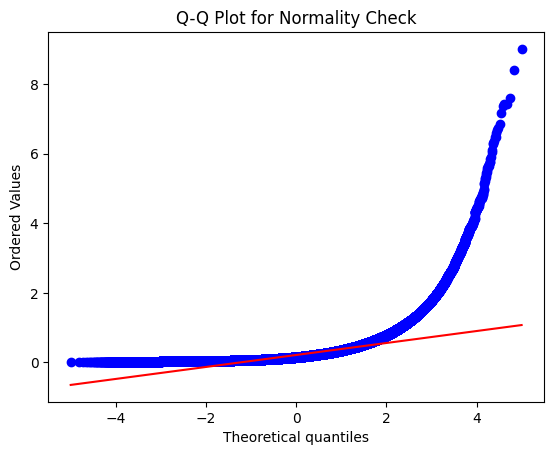

In [555]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(data['Volume'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Check")
plt.show()


In [556]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p = shapiro(data['Volume'])
print(f'Shapiro-Wilk Test: W={stat:.4f}, p={p:.4f}')
print('the data is not normally distributed')

Shapiro-Wilk Test: W=0.6842, p=0.0000
the data is not normally distributed


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2369565.
  res = hypotest_fun_out(*samples, **kwds)


### Volume data is not normally distributed

## Distance to VGLUT1

In [512]:
agg_dataVGLUT = data.groupby(['Animal', 'Type', 'Position', 'Lumbar_Segment'], as_index=False, observed = False)['Distance to VGLUT1'].mean()

In [513]:
from scipy.stats import kstest

# Perform KS test against normal distribution
stat, p = kstest(data['Distance to VGLUT1'], 'norm')
print(f'Kolmogorov-Smirnov Test: D={stat:.4f}, p={p:.4f}')
print('The data is not normally distributed')

Kolmogorov-Smirnov Test: D=0.7566, p=0.0000
The data is not normally distributed


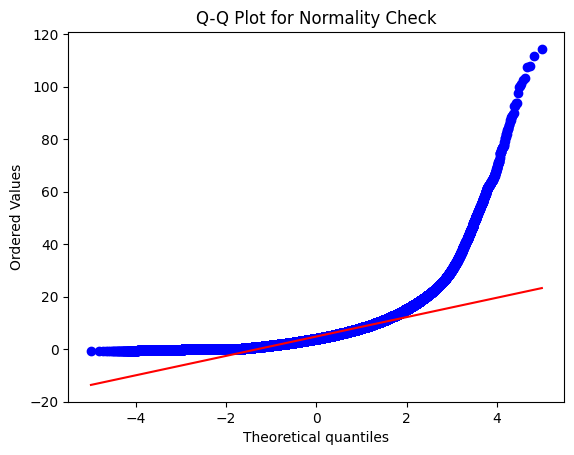

In [514]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(data['Distance to VGLUT1'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Check")
plt.show()


In [515]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p = shapiro(data['Distance to VGLUT1'])
print(f'Shapiro-Wilk Test: W={stat:.4f}, p={p:.4f}')
print('the data is not normally distributed')

Shapiro-Wilk Test: W=0.8345, p=0.0000
the data is not normally distributed


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2369565.
  res = hypotest_fun_out(*samples, **kwds)


### Distance to VGLUT1 data is not normally distributed

In [516]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert necessary columns to numeric values
data["Volume"] = pd.to_numeric(data["Volume"], errors="coerce")
data["Area"] = pd.to_numeric(data["Area"], errors="coerce")
data["Distance to VGLUT1"] = pd.to_numeric(data["Distance to VGLUT1"], errors="coerce")

# Testing HC vs Other

## Area

In [517]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test for independent samples
u_stat, p_val = mannwhitneyu(
    data[data['Type'] == "HC"]["Area"], 
    data[data['Type'] == "Other"]["Area"],
    alternative='two-sided'
)

print(f'Mann-Whitney U Test: U={u_stat}, p={p_val:.4f}')


Mann-Whitney U Test: U=3308107162.5, p=0.0000


## Volume

In [93]:
group_means = data.groupby(['Animal', 'Type'])['Volume'].mean().unstack()
print(group_means)


Type          HC     Other
Animal                    
1       1.868369  0.219485
2       2.115695  0.215277
3       1.472832  0.203440


In [94]:
from scipy.stats import wilcoxon

hc = group_means['HC']
other = group_means['Other']

stat, p = wilcoxon(hc, other)
print(f"Wilcoxon signed-rank test p = {p:.4f}")


Wilcoxon signed-rank test p = 0.2500


In [131]:
#Volume overall
# dont use because doesnt account for repeated measures!
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test for independent samples
u_stat, p_val = mannwhitneyu(
    data[data['Type'] == "HC"]["Volume"], 
    data[data['Type'] == "Other"]["Volume"],
    alternative='two-sided'
)

print(f'Mann-Whitney U Test: U={u_stat}, p={p_val:.4f}')


Mann-Whitney U Test: U=3308615892.0, p=0.0000


In [326]:
import statsmodels.formula.api as smf
# HC+ MN Volume by Lumbar Segment and Position
# Linear mixed-effects model with random intercept for Animal

model = smf.mixedlm(
    formula="MN_Volume ~ Lumbar_Segment * C(Position, Treatment(reference='M'))",
    data=colocalisedMN,
    groups=colocalisedMN['Animal']
).fit()

print(model.summary())

                                        Mixed Linear Model Regression Results
Model:                                 MixedLM                    Dependent Variable:                    MN_Volume   
No. Observations:                      177                        Method:                                REML        
No. Groups:                            3                          Scale:                                 2101239.0381
Min. group size:                       39                         Log-Likelihood:                        -1511.9034  
Max. group size:                       94                         Converged:                             Yes         
Mean group size:                       59.0                                                                          
---------------------------------------------------------------------------------------------------------------------
                                                                     Coef.   Std.Err.   z    P>|

In [102]:
import statsmodels.formula.api as smf
# HC Volume detailed by  position and lumbar segment - accounting for repeated measures!
# Linear mixed-effects model with random intercept for Animal
#use even though not significant
model = smf.mixedlm(
    formula="Volume ~ Lumbar_Segment * C(Position, Treatment(reference='M'))",
    data=hc_data,
    groups=hc_data['Animal']
).fit()

print(model.summary())

                                    Mixed Linear Model Regression Results
Model:                               MixedLM                  Dependent Variable:                  Volume    
No. Observations:                    1421                     Method:                              REML      
No. Groups:                          3                        Scale:                               1.3424    
Min. group size:                     335                      Log-Likelihood:                      -2233.1394
Max. group size:                     741                      Converged:                           Yes       
Mean group size:                     473.7                                                                   
-------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------

In [99]:
import statsmodels.formula.api as smf
# Other Volume detailed position and lumbar segment - accounting for repeated measures!
# Linear mixed-effects model with random intercept for Animal

model = smf.mixedlm(
    formula="Volume ~ Lumbar_Segment * C(Position, Treatment(reference='M'))",
    data=other_data,
    groups=other_data['Animal']
).fit()

print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                                   Mixed Linear Model Regression Results
Model:                              MixedLM                  Dependent Variable:                 Volume     
No. Observations:                   2368144                  Method:                             REML       
No. Groups:                         3                        Scale:                              0.0408     
Min. group size:                    467670                   Log-Likelihood:                     428184.8340
Max. group size:                    1235732                  Converged:                          Yes        
Mean group size:                    789381.3                                                                
------------------------------------------------------------------------------------------------------------
                                                                   Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------

In [101]:
import statsmodels.formula.api as smf
# Volume  by type - accounting for repeated measures! good!
# Linear mixed-effects model with random intercept for Animal
# used!
model = smf.mixedlm(
    formula="Volume ~ C(Type, Treatment(reference='Other'))",
    data=data,
    groups=data['Animal']
).fit()

print(model.summary())


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:          Volume     
No. Observations:           2369565           Method:                      REML       
No. Groups:                 3                 Scale:                       0.0417     
Min. group size:            468015            Log-Likelihood:              402063.4663
Max. group size:            1236473           Converged:                   Yes        
Mean group size:            789855.0                                                  
--------------------------------------------------------------------------------------
                                            Coef. Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------
Intercept                                   0.213    0.118   1.805 0.071 -0.018  0.444
C(Type, Treatment(reference='Other'))[T.HC] 1.620    0.005 299.046 0

In [97]:
import statsmodels.formula.api as smf
# Volume detailed by type,  position and lumbar segment - accounting for repeated measures!
# Linear mixed-effects model with random intercept for Animal

model = smf.mixedlm(
    formula="Volume ~ C(Type, Treatment(reference='Other')) * Lumbar_Segment * C(Position, Treatment(reference='M'))",
    data=data,
    groups=data['Animal']
).fit()

print(model.summary())


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                                                          Mixed Linear Model Regression Results
Model:                                             MixedLM                                 Dependent Variable:                                Volume     
No. Observations:                                  2369565                                 Method:                                            REML       
No. Groups:                                        3                                       Scale:                                             0.0416     
Min. group size:                                   468015                                  Log-Likelihood:                                    405569.3312
Max. group size:                                   1236473                                 Converged:                                         Yes        
Mean group size:                                   789855.0                                                                           

In [150]:
hc_data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
15169,3.709070,µm^3,HC,27697,1001,M,1,Upper,31.59650,µm^2,...,2413.150,µm^2,2487.290,µm^3,1,1,0,1,0,0
15768,1.489430,µm^3,HC,28722,1001,M,1,Upper,14.18870,µm^2,...,2413.150,µm^2,2487.290,µm^3,1,1,0,1,0,0
59740,4.428090,µm^3,HC,15921,1003,L,1,Upper,29.54010,µm^2,...,1595.755,µm^2,1358.522,µm^3,1,0,1,0,0,0
69469,2.264950,µm^3,HC,37596,1003,L,1,Upper,19.14770,µm^2,...,756.690,µm^2,688.760,µm^3,1,1,0,1,0,0
86026,4.973700,µm^3,HC,16582,1004,M,1,Upper,37.36090,µm^2,...,2096.770,µm^2,2444.810,µm^3,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365532,0.816079,µm^3,HC,23463,1094,L,2,Upper,7.09212,µm^2,...,479.779,µm^2,542.236,µm^3,1,0,1,0,0,0
2365871,1.527900,µm^3,HC,24060,1094,L,2,Upper,11.48310,µm^2,...,1608.070,µm^2,921.522,µm^3,1,1,0,1,0,0
2365958,0.840816,µm^3,HC,24196,1094,L,2,Upper,9.46901,µm^2,...,479.779,µm^2,542.236,µm^3,1,0,1,0,0,0
2365987,0.903467,µm^3,HC,24245,1094,L,2,Upper,7.14795,µm^2,...,1608.070,µm^2,921.522,µm^3,1,0,1,0,0,0


In [149]:
# Volume detailed - HC size by posiiton and lumbar segment
#dont use output! assumptions violated (see below - QQ plot and Shapiro Wilk), instead use gamma distribution

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the simplified logistic regression model
model = smf.ols(
    "Volume ~ C(Lumbar_Segment, Treatment(reference='Lower')) * C(Position, Treatment(reference='M'))",
    data=hc_data
).fit()

# Print the summary of the new model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.290
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           4.39e-06
Time:                        11:25:31   Log-Likelihood:                -2238.3
No. Observations:                1421   AIC:                             4485.
Df Residuals:                    1417   BIC:                             4506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [166]:
#checking if assumptions are met
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Residuals
residuals = model_log.resid
fitted = model_log.fittedvalues
exog = model_log.model.exog


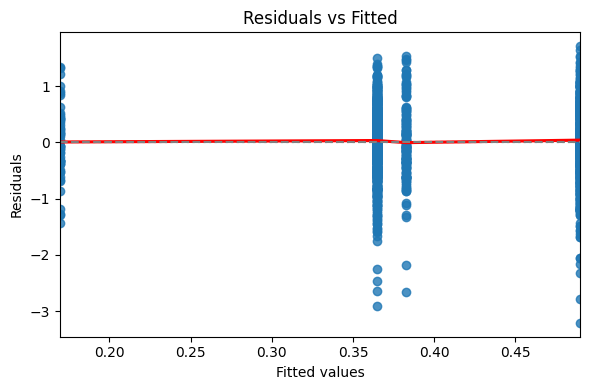

In [167]:
#checking linearity
plt.figure(figsize=(6, 4))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


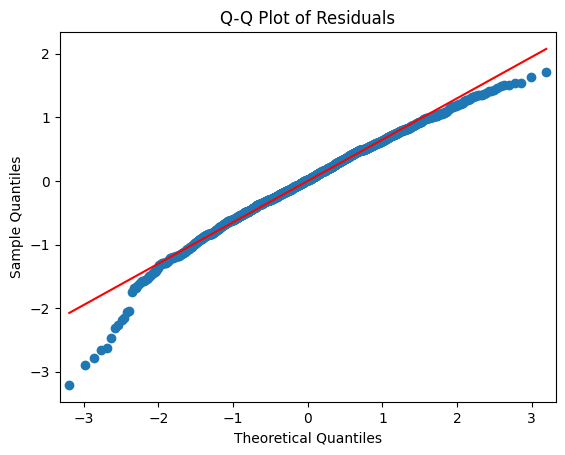

Shapiro-Wilk test p = 0.0000


In [168]:
#normality of residuals
sm.qqplot(residuals, line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test (optional)
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test p = {p:.4f}")  # p > 0.05 = normal residuals


In [169]:
#independence
dw = durbin_watson(residuals)
print(f"Durbin-Watson = {dw:.2f}")  # ~2 is good, <1 or >3 is bad


Durbin-Watson = 1.55


In [171]:
#use this model! it fits the assumptions! for just 
import statsmodels.api as sm
model_gamma = smf.glm(
    formula="Volume ~ C(Lumbar_Segment, Treatment(reference='Lower')) * C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()

print(model_gamma.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                 1421
Model:                            GLM   Df Residuals:                     1417
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                         0.39831
Method:                          IRLS   Log-Likelihood:                -1970.3
Date:                Tue, 25 Mar 2025   Deviance:                       549.03
Time:                        11:37:46   Pearson chi2:                     564.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02024
Covariance Type:            nonrobust                                         
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [28]:
data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
0,0.042181,µm^3,Other,1,1001,M,1,Upper,0.850943,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
1,0.070322,µm^3,Other,2,1001,M,1,Upper,1.173010,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
2,0.430202,µm^3,Other,3,1001,M,1,Upper,4.984310,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
3,0.104559,µm^3,Other,4,1001,M,1,Upper,1.519960,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
4,0.093794,µm^3,Other,6,1001,M,1,Upper,1.327620,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369560,0.128276,µm^3,Other,29685,1094,L,2,Upper,1.440850,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369561,0.118354,µm^3,Other,29686,1094,L,2,Upper,1.377840,µm^2,...,479.779,µm^2,542.236,µm^3,0,0,0,0,0,1
2369562,0.116735,µm^3,Other,29687,1094,L,2,Upper,1.267910,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369563,0.107981,µm^3,Other,29688,1094,L,2,Upper,1.209640,µm^2,...,479.779,µm^2,542.236,µm^3,0,1,0,0,1,0


## MN Volume by position and lumbar segment

In [192]:
MNcolocalised

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume
5,1001,MN F,M,Upper,6310,2,6308,238,6072,2,236,0,6072,2413.150,2487.290
10,1003,MN A,L,Upper,6754,1,6753,153,6601,1,152,0,6601,756.690,688.760
16,1004,MN B,M,Upper,10907,1,10906,492,10415,1,491,0,10415,2096.770,2444.810
17,1004,MN C,M,Upper,5725,1,5724,413,5312,1,412,0,5312,3256.500,3694.120
20,1005,MN A,M,Upper,13868,4,13864,1091,12777,4,1087,0,12777,8235.154,7999.836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540


In [194]:
# MN Volume detailed - MN volume by posiiton and lumbar segment
#dont use this model, assumptions violateed (see below), instead use gamma distribution
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the simplified logistic regression model
model = smf.ols(
    "MN_Volume ~ C(Lumbar_Segment, Treatment(reference='Lower')) * C(Position, Treatment(reference='M'))",
    data=MNcolocalised
).fit()

# Print the summary of the new model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              MN_Volume   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.489
Date:                Tue, 25 Mar 2025   Prob (F-statistic):              0.219
Time:                        12:25:47   Log-Likelihood:                -1538.3
No. Observations:                 177   AIC:                             3085.
Df Residuals:                     173   BIC:                             3097.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [195]:
# now check to see if assumptions are violated or not
#checking if assumptions are met
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Residuals
residuals = model.resid
fitted = model.fittedvalues
exog = model.model.exog


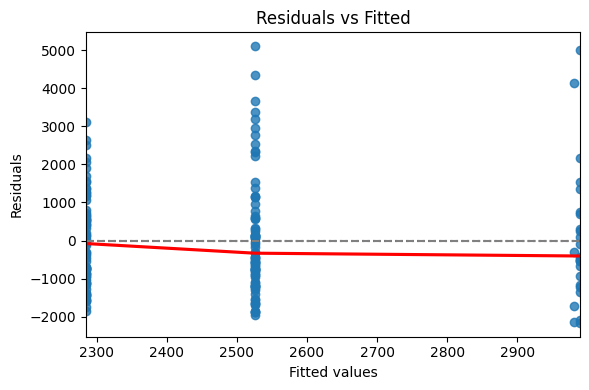

In [196]:
#checking linearity
plt.figure(figsize=(6, 4))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


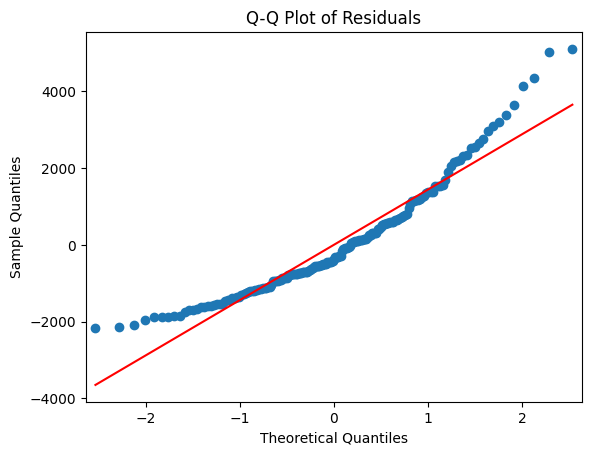

Shapiro-Wilk test p = 0.0000


In [197]:
#normality of residuals
sm.qqplot(residuals, line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test (optional)
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test p = {p:.4f}")  # p > 0.05 = normal residuals


In [198]:
#independence
dw = durbin_watson(residuals)
print(f"Durbin-Watson = {dw:.2f}")  # ~2 is good, <1 or >3 is bad

Durbin-Watson = 1.72


In [200]:
#assumptions (QQ plot, Shapiro Wilk) are violated for normal ols, use gamma distribution instead
#use this model! it fits the assumptions! 
import statsmodels.api as sm
model_gamma = smf.glm(
    formula="MN_Volume ~ C(Lumbar_Segment, Treatment(reference='Lower')) * C(Position, Treatment(reference='M'))",
    data=MNcolocalised,
    family=sm.families.Gamma(link=sm.families.links.Log())
).fit()

print(model_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              MN_Volume   No. Observations:                  177
Model:                            GLM   Df Residuals:                      173
Model Family:                   Gamma   Df Model:                            3
Link Function:                    Log   Scale:                         0.33322
Method:                          IRLS   Log-Likelihood:                -1512.6
Date:                Tue, 25 Mar 2025   Deviance:                       58.238
Time:                        12:33:38   Pearson chi2:                     57.6
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02404
Covariance Type:            nonrobust                                         
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [ ]:
import statsmodels.formula.api as smf
# HC+ MN Volume by Lumbar Segment and Position
# Linear mixed-effects model with random intercept for Animal

model = smf.mixedlm(
    formula="MN_Volume ~ Lumbar_Segment * C(Position, Treatment(reference='M'))",
    data=colocalisedMN,
    groups=colocalisedMN['Animal']
).fit()

print(model.summary())

In [328]:
ColocMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal
0,1001,MN A,M,Upper,3159,0,3159,287,2872,0,287,0,2872,2850.969,2783.454,1
1,1001,MN B,M,Upper,1639,0,1639,163,1476,0,163,0,1476,1210.523,1022.167,1
2,1001,MN C,M,Upper,1887,0,1887,217,1670,0,217,0,1670,1543.300,1849.940,1
3,1001,MN D,M,Upper,7408,0,7408,157,7251,0,157,0,7251,1109.687,1190.923,1
4,1001,MN E,M,Upper,3409,0,3409,74,3335,0,74,0,3335,531.328,599.755,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522,2
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439,2
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110,2
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540,2


In [330]:
ColocMN['Colocalised_HC_binary'] = ColocMN['Colocalised_HC'].apply(lambda x: 'Yes' if x > 0 else 'No')


In [331]:
ColocMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal,Colocalised_HC_binary
0,1001,MN A,M,Upper,3159,0,3159,287,2872,0,287,0,2872,2850.969,2783.454,1,No
1,1001,MN B,M,Upper,1639,0,1639,163,1476,0,163,0,1476,1210.523,1022.167,1,No
2,1001,MN C,M,Upper,1887,0,1887,217,1670,0,217,0,1670,1543.300,1849.940,1,No
3,1001,MN D,M,Upper,7408,0,7408,157,7251,0,157,0,7251,1109.687,1190.923,1,No
4,1001,MN E,M,Upper,3409,0,3409,74,3335,0,74,0,3335,531.328,599.755,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522,2,Yes
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439,2,Yes
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110,2,Yes
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540,2,Yes


In [333]:
model = smf.mixedlm(
    formula="MN_Volume ~ C(Colocalised_HC_binary, Treatment(reference='No'))",
    data=ColocMN,
    groups=ColocMN['Animal']
).fit()

print(model.summary())


                                   Mixed Linear Model Regression Results
Model:                             MixedLM                 Dependent Variable:                 MN_Volume   
No. Observations:                  373                     Method:                             REML        
No. Groups:                        3                       Scale:                              1577493.7515
Min. group size:                   82                      Log-Likelihood:                     -3179.5186  
Max. group size:                   201                     Converged:                          Yes         
Mean group size:                   124.3                                                                   
-----------------------------------------------------------------------------------------------------------
                                                            Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
---------------------------------------------------------------

/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_76955/1456745727.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


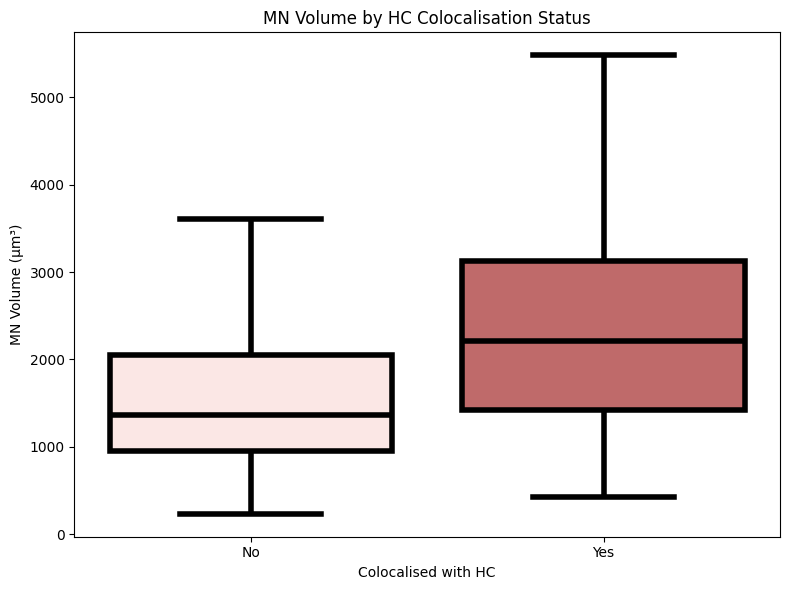

In [342]:
# Re-import required packages due to code execution environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Placeholder: Since ColocMN is not available due to reset, simulate structure for plotting code
# In your actual use, replace this with the real ColocMN DataFrame
# Sample data simulation to show plot formatting
import numpy as np


# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=ColocMN,
    x='Colocalised_HC_binary',
    y='MN_Volume',
    palette={'Yes': 'indianred', 'No': 'mistyrose'},
    linewidth=2.5,
    boxprops=dict(edgecolor='black', linewidth = 4,),
    medianprops=dict(color='black',linewidth = 4,),
    whiskerprops=dict(color='black', linewidth = 4,),
    capprops=dict(color='black', linewidth = 4,),
    showfliers = False
)

plt.title("MN Volume by HC Colocalisation Status")
plt.xlabel("Colocalised with HC")
plt.ylabel("MN Volume (μm³)")
plt.tight_layout()
plt.show()


## Distance to VGLUT1

In [520]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test for independent samples
u_stat, p_val = mannwhitneyu(
    data[data['Type'] == "HC"]["Distance to VGLUT1"], 
    data[data['Type'] == "Other"]["Distance to VGLUT1"],
    alternative='two-sided'
)

print(f'Mann-Whitney U Test: U={u_stat}, p={p_val:.4f}')


Mann-Whitney U Test: U=342951878.0, p=0.0000


# Percentages

In [31]:
# Testing influence of position and lumbar segment on likelihood of HC 
# with clustered standard error approach to adjust for non-independence of synapses
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(
    formula="C(Type, Treatment(reference='Other')) ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference = 'Lower'))",
    data=data,
    family=sm.families.Binomial()
).fit(cov_type='cluster', cov_kwds={'groups': data['Animal']})

print(model.summary())

                                                       Generalized Linear Model Regression Results                                                       
Dep. Variable:     ["C(Type, Treatment(reference='Other'))[HC]", "C(Type, Treatment(reference='Other'))[Other]"]   No. Observations:              2369565
Model:                                                                                                       GLM   Df Residuals:                  2369561
Model Family:                                                                                           Binomial   Df Model:                            3
Link Function:                                                                                             Logit   Scale:                          1.0000
Method:                                                                                                     IRLS   Log-Likelihood:                -11529.
Date:                                                                       

In [72]:
# Testing influence of position and lumbar segment on likelihood of HC 
# output from this does NOT account for repeated measures - dont use!! use above

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


model = smf.glm(
    formula="C(Type, Treatment(reference='Other')) ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference = 'Lower'))",
    data=data,
    family=sm.families.Binomial()
).fit()

print(model.summary())

from statsmodels.stats.multitest import multipletests


                                                       Generalized Linear Model Regression Results                                                       
Dep. Variable:     ["C(Type, Treatment(reference='Other'))[HC]", "C(Type, Treatment(reference='Other'))[Other]"]   No. Observations:              2369565
Model:                                                                                                       GLM   Df Residuals:                  2369561
Model Family:                                                                                           Binomial   Df Model:                            3
Link Function:                                                                                             Logit   Scale:                          1.0000
Method:                                                                                                     IRLS   Log-Likelihood:                -11529.
Date:                                                                       

# by MN

## percentage of HC+ MNs

In [95]:
MN

,Position,Lumbar_Segment,Image ID,MN ID,Total_MNs,MNs_with_Colocalised_HC,Total_Colocalised_HCs,Percentage_MNs_with_Colocalised_HC,Average_Colocalised_HC,Average_Colocalised_HC_All
0,L,Lower,1035,MN A,1,1,3,100.0,3.0,3.0
1,L,Lower,1035,MN B,1,0,0,0.0,NaN,0.0
2,L,Lower,1035,MN C,1,1,2,100.0,2.0,2.0
3,L,Lower,1035,MN D,1,0,0,0.0,NaN,0.0
4,L,Lower,1037,MN A,1,1,6,100.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...
368,M,Upper,1091,MN C,1,1,1,100.0,1.0,1.0
369,M,Upper,1093,MN A,1,1,6,100.0,6.0,6.0
370,M,Upper,1093,MN B,1,0,0,0.0,NaN,0.0
371,M,Upper,1093,MN C,1,0,0,0.0,NaN,0.0


In [62]:
colocalisedMN = MN[MN["Total_Colocalised_HCs"] > 0]

In [39]:
colocalisedMN

,Position,Lumbar_Segment,Image ID,MN ID,Total_MNs,MNs_with_Colocalised_HC,Total_Colocalised_HCs,Percentage_MNs_with_Colocalised_HC,Average_Colocalised_HC,Average_Colocalised_HC_All,Animal
0,L,Lower,1035,MN A,1,1,3,100.0,3.0,3.0,1
2,L,Lower,1035,MN C,1,1,2,100.0,2.0,2.0,1
4,L,Lower,1037,MN A,1,1,6,100.0,6.0,6.0,1
8,L,Lower,1037,MN E,1,1,2,100.0,2.0,2.0,1
10,L,Lower,1039,MN A,1,1,4,100.0,4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...
359,M,Upper,1085,MN C,1,1,2,100.0,2.0,2.0,1
364,M,Upper,1089,MN A,1,1,2,100.0,2.0,2.0,1
367,M,Upper,1091,MN B,1,1,1,100.0,1.0,1.0,1
368,M,Upper,1091,MN C,1,1,1,100.0,1.0,1.0,1


In [41]:
# determining if HC+ MN percentage differs by position and lumbar segment
# accounts for repeated measures
# used!
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(
    formula="MNs_with_Colocalised_HC ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference='Lower'))",
    data=MN,
    family=sm.families.Binomial()
).fit(cov_type='cluster', cov_kwds={'groups': MN['Animal']})

print(model.summary())


                    Generalized Linear Model Regression Results                    
Dep. Variable:     MNs_with_Colocalised_HC   No. Observations:                  373
Model:                                 GLM   Df Residuals:                      369
Model Family:                     Binomial   Df Model:                            3
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -217.21
Date:                     Wed, 26 Mar 2025   Deviance:                       434.43
Time:                             17:13:44   Pearson chi2:                     373.
No. Iterations:                          5   Pseudo R-squ. (CS):             0.1967
Covariance Type:                   cluster                                         
                                                                                                          coef    std err          z      P>|z|      [0.025     

### testing number of (average) colocalised HC at MN by position and lumbar

In [69]:
# testing number of colocalised HC at HC+ MN by posiiton and lumbar segment
# using this model bc it determines alpha (predictor of overdispersion), and adjusts accordingly 
# accounts for repeated measures
#used

from statsmodels.discrete.discrete_model import NegativeBinomial

nb_true_model = NegativeBinomial.from_formula(
    formula="Total_Colocalised_HCs ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference='Lower'))",
    data=colocalisedMN
).fit(cov_type='cluster', cov_kwds={'groups': colocalisedMN['Animal']})

print(nb_true_model.summary())


Optimization terminated successfully.
         Current function value: 2.104506
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
                       NegativeBinomial Regression Results                       
Dep. Variable:     Total_Colocalised_HCs   No. Observations:                  177
Model:                  NegativeBinomial   Df Residuals:                      173
Method:                              MLE   Df Model:                            3
Date:                   Wed, 26 Mar 2025   Pseudo R-squ.:                0.007455
Time:                           18:15:52   Log-Likelihood:                -372.50
converged:                          True   LL-Null:                       -375.30
Covariance Type:                 cluster   LLR p-value:                    0.1330
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-------

In [ ]:
pip install pandas numpy statsmodels


# Coloc to VGLUT

In [201]:
data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
0,0.042181,µm^3,Other,1,1001,M,1,Upper,0.850943,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
1,0.070322,µm^3,Other,2,1001,M,1,Upper,1.173010,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
2,0.430202,µm^3,Other,3,1001,M,1,Upper,4.984310,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
3,0.104559,µm^3,Other,4,1001,M,1,Upper,1.519960,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
4,0.093794,µm^3,Other,6,1001,M,1,Upper,1.327620,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369560,0.128276,µm^3,Other,29685,1094,L,2,Upper,1.440850,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369561,0.118354,µm^3,Other,29686,1094,L,2,Upper,1.377840,µm^2,...,479.779,µm^2,542.236,µm^3,0,0,0,0,0,1
2369562,0.116735,µm^3,Other,29687,1094,L,2,Upper,1.267910,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369563,0.107981,µm^3,Other,29688,1094,L,2,Upper,1.209640,µm^2,...,479.779,µm^2,542.236,µm^3,0,1,0,0,1,0


In [203]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
#DONT USE
#data["Colocalisation_VGLUT1_numeric"] = data["Colocalisation_VGLUT1"].map({"Yes": 1, "No": 0})  # Convert categorical to numeric

# Define logistic regression model using Generalized Linear Model (GLM)
model = smf.logit("Colocalisation_VGLUT1 ~ C(Type, Treatment(reference='Other')) * Lumbar_Segment * C(Position, Treatment(reference='M'))",
                  data=data).fit()

# Print summary of logistic regression results
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.185405
         Iterations 7
                             Logit Regression Results                            
Dep. Variable:     Colocalisation_VGLUT1   No. Observations:              2369565
Model:                             Logit   Df Residuals:                  2369557
Method:                              MLE   Df Model:                            7
Date:                   Tue, 25 Mar 2025   Pseudo R-squ.:                 0.01184
Time:                           13:23:30   Log-Likelihood:            -4.3933e+05
converged:                          True   LL-Null:                   -4.4459e+05
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

In [524]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#DONT USE
# Change the reference group for Type to "Other"
updated_model = smf.logit(
    "Colocalisation_VGLUT1_numeric ~ C(Type, Treatment(reference='Other')) * Lumbar_Segment + C(Type, Treatment(reference='Other')) * Position",
    data=data
).fit()

# Print the updated model summary
print(updated_model.summary())


Optimization terminated successfully.
         Current function value: 0.185421
         Iterations 7
                                 Logit Regression Results                                
Dep. Variable:     Colocalisation_VGLUT1_numeric   No. Observations:              2369565
Model:                                     Logit   Df Residuals:                  2369559
Method:                                      MLE   Df Model:                            5
Date:                           Wed, 19 Mar 2025   Pseudo R-squ.:                 0.01175
Time:                                   11:40:25   Log-Likelihood:            -4.3937e+05
converged:                                  True   LL-Null:                   -4.4459e+05
Covariance Type:                       nonrobust   LLR p-value:                     0.000
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [525]:
# this is the best model!!
#not needed bc logit
#DONT USE
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the simplified logistic regression model
simplified_model = smf.logit(
    "Colocalisation_VGLUT1_numeric ~ C(Type, Treatment(reference='Other')) * Lumbar_Segment + "
    "C(Type, Treatment(reference='Other')) * C(Position, Treatment(reference='M')) + "
    "Lumbar_Segment * C(Position, Treatment(reference='M'))",
    data=data
).fit()

# Print the summary of the new model
print(simplified_model.summary())


Optimization terminated successfully.
         Current function value: 0.185405
         Iterations 7
                                 Logit Regression Results                                
Dep. Variable:     Colocalisation_VGLUT1_numeric   No. Observations:              2369565
Model:                                     Logit   Df Residuals:                  2369558
Method:                                      MLE   Df Model:                            6
Date:                           Wed, 19 Mar 2025   Pseudo R-squ.:                 0.01184
Time:                                   11:40:48   Log-Likelihood:            -4.3933e+05
converged:                                  True   LL-Null:                   -4.4459e+05
Covariance Type:                       nonrobust   LLR p-value:                     0.000
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

In [211]:
#Colocalisation with VGLUT1 by type - overall
#smf.glm rather than smf.logit
#DONT USE
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

#data["Colocalisation_VGLUT1_numeric"] = data["Colocalisation_VGLUT1"].map({"Yes": 1, "No": 0})  # Convert categorical to numeric

# Define logistic regression model using Generalized Linear Model (GLM)
model = smf.glm( "Colocalisation_VGLUT1 ~ C(Type, Treatment(reference='Other'))",
                  data=data,
               family=sm.families.Binomial(link=sm.families.links.Logit())
).fit()

# Print summary of logistic regression results
print(model.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Colocalisation_VGLUT1   No. Observations:              2369565
Model:                               GLM   Df Residuals:                  2369563
Model Family:                   Binomial   Df Model:                            1
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -4.4175e+05
Date:                   Tue, 25 Mar 2025   Deviance:                   8.8351e+05
Time:                           13:41:38   Pearson chi2:                 2.37e+06
No. Iterations:                        6   Pseudo R-squ. (CS):           0.002395
Covariance Type:               nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [207]:
#detailed Colocalisation with VLGUT1 by Type, Position, and Lumbar segment
#this is glm which is better than smf.logit
#DONT USE

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

#data["Colocalisation_VGLUT1_numeric"] = data["Colocalisation_VGLUT1"].map({"Yes": 1, "No": 0})  # Convert categorical to numeric

# Define logistic regression model using Generalized Linear Model (GLM)
model = smf.glm( "Colocalisation_VGLUT1 ~ C(Type, Treatment(reference='Other')) * Lumbar_Segment + "
    "C(Type, Treatment(reference='Other')) * C(Position, Treatment(reference='M')) + "
    "Lumbar_Segment * C(Position, Treatment(reference='M'))",
                  data=data,
               family=sm.families.Binomial(link=sm.families.links.Logit())
).fit()

# Print summary of logistic regression results
print(model.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Colocalisation_VGLUT1   No. Observations:              2369565
Model:                               GLM   Df Residuals:                  2369558
Model Family:                   Binomial   Df Model:                            6
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -4.3933e+05
Date:                   Tue, 25 Mar 2025   Deviance:                   8.7866e+05
Time:                           13:36:01   Pearson chi2:                 2.37e+06
No. Iterations:                        6   Pseudo R-squ. (CS):           0.004433
Covariance Type:               nonrobust                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

In [343]:
#looking at hc only - colocalisation with MMP9 by position and lumbar segment
# USE!! MMP9!
# this adjusts for repeated measures!

model = smf.glm(
    formula="Colocalisation_MMP9 ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference='Lower'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit(cov_type="cluster", cov_kwds={"groups": hc_data["Animal"]})

print(model.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     Colocalisation_MMP9   No. Observations:                 1421
Model:                             GLM   Df Residuals:                     1417
Model Family:                 Binomial   Df Model:                            3
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -785.97
Date:                 Sun, 30 Mar 2025   Deviance:                       1571.9
Time:                         14:02:40   Pearson chi2:                 1.42e+03
No. Iterations:                      4   Pseudo R-squ. (CS):           0.007076
Covariance Type:               cluster                                         
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

In [124]:
#looking at hc only - colocalisation with VGLUT1 by position and lumbar segment
# USE!
# this adjusts for repeated measures!

model = smf.glm(
    formula="Colocalisation_VGLUT1 ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference='Lower'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit(cov_type="cluster", cov_kwds={"groups": hc_data["Animal"]})

print(model.summary())


                   Generalized Linear Model Regression Results                   
Dep. Variable:     Colocalisation_VGLUT1   No. Observations:                 1421
Model:                               GLM   Df Residuals:                     1417
Model Family:                   Binomial   Df Model:                            3
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -649.86
Date:                   Thu, 27 Mar 2025   Deviance:                       1299.7
Time:                           16:31:29   Pearson chi2:                 1.42e+03
No. Iterations:                        5   Pseudo R-squ. (CS):            0.06568
Covariance Type:                 cluster                                         
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------

In [126]:
#looking at OTHER only - colocalisation with VGLUT1 by position and lumbar segment
# dont include in dissertation because beyond the scope, focus on HC 
# this adjusts for repeated measures!

model = smf.glm(
    formula="Colocalisation_VGLUT1 ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference='Lower'))",
    data=other_data,
    family=sm.families.Binomial()
).fit(cov_type="cluster", cov_kwds={"groups": other_data["Animal"]})

print(model.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Colocalisation_VGLUT1   No. Observations:              2368144
Model:                               GLM   Df Residuals:                  2368140
Model Family:                   Binomial   Df Model:                            3
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -4.3868e+05
Date:                   Thu, 27 Mar 2025   Deviance:                   8.7736e+05
Time:                           16:41:17   Pearson chi2:                 2.37e+06
No. Iterations:                        6   Pseudo R-squ. (CS):           0.002005
Covariance Type:                 cluster                                         
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------

In [215]:
#looking at hc only - colocalisation with VGLUT1 by position and lumbar segment
# smf.glm rather than smf.logit
# dont use bc assumes independence of samples

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define logistic regression model using Generalized Linear Model (GLM)
model = smf.glm( "Colocalisation_VGLUT1 ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference = 'Lower'))",
                  data=hc_data,
               family=sm.families.Binomial(link=sm.families.links.Logit())
).fit()

# Print summary of logistic regression results
print(model.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Colocalisation_VGLUT1   No. Observations:                 1421
Model:                               GLM   Df Residuals:                     1417
Model Family:                   Binomial   Df Model:                            3
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -649.86
Date:                   Tue, 25 Mar 2025   Deviance:                       1299.7
Time:                           14:01:47   Pearson chi2:                 1.42e+03
No. Iterations:                        5   Pseudo R-squ. (CS):            0.06568
Covariance Type:               nonrobust                                         
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------

In [213]:
other_data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
0,0.042181,µm^3,Other,1,1001,M,1,Upper,0.850943,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
1,0.070322,µm^3,Other,2,1001,M,1,Upper,1.173010,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
2,0.430202,µm^3,Other,3,1001,M,1,Upper,4.984310,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
3,0.104559,µm^3,Other,4,1001,M,1,Upper,1.519960,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
4,0.093794,µm^3,Other,6,1001,M,1,Upper,1.327620,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369560,0.128276,µm^3,Other,29685,1094,L,2,Upper,1.440850,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369561,0.118354,µm^3,Other,29686,1094,L,2,Upper,1.377840,µm^2,...,479.779,µm^2,542.236,µm^3,0,0,0,0,0,1
2369562,0.116735,µm^3,Other,29687,1094,L,2,Upper,1.267910,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369563,0.107981,µm^3,Other,29688,1094,L,2,Upper,1.209640,µm^2,...,479.779,µm^2,542.236,µm^3,0,1,0,0,1,0


In [217]:
#looking at Other only - colocalisation with VGLUT1 by position and lumbar segment
# smf.glm rather than smf.logit
# this is interesting, but wont include in report bc need to focus on HC 

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

#data["Colocalisation_VGLUT1_numeric"] = data["Colocalisation_VGLUT1"].map({"Yes": 1, "No": 0})  # Convert categorical to numeric

# Define logistic regression model using Generalized Linear Model (GLM)
model = smf.glm( "Colocalisation_VGLUT1 ~ C(Position, Treatment(reference='M')) * C(Lumbar_Segment, Treatment(reference = 'Lower'))",
                  data=other_data,
               family=sm.families.Binomial(link=sm.families.links.Logit())
).fit()

# Print summary of logistic regression results
print(model.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Colocalisation_VGLUT1   No. Observations:              2368144
Model:                               GLM   Df Residuals:                  2368140
Model Family:                   Binomial   Df Model:                            3
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -4.3868e+05
Date:                   Tue, 25 Mar 2025   Deviance:                   8.7736e+05
Time:                           14:07:59   Pearson chi2:                 2.37e+06
No. Iterations:                        6   Pseudo R-squ. (CS):           0.002005
Covariance Type:               nonrobust                                         
                                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------

# HC size by VGLUT1 colocalisation

In [220]:
hc_data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area Unit,MN Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation,log_Volume
15169,3.709070,µm^3,HC,27697,1001,M,1,Upper,31.59650,µm^2,...,µm^2,2487.290,µm^3,1,1,0,1,0,0,1.310781
15768,1.489430,µm^3,HC,28722,1001,M,1,Upper,14.18870,µm^2,...,µm^2,2487.290,µm^3,1,1,0,1,0,0,0.398393
59740,4.428090,µm^3,HC,15921,1003,L,1,Upper,29.54010,µm^2,...,µm^2,1358.522,µm^3,1,0,1,0,0,0,1.487968
69469,2.264950,µm^3,HC,37596,1003,L,1,Upper,19.14770,µm^2,...,µm^2,688.760,µm^3,1,1,0,1,0,0,0.817553
86026,4.973700,µm^3,HC,16582,1004,M,1,Upper,37.36090,µm^2,...,µm^2,2444.810,µm^3,1,1,0,1,0,0,1.604164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365532,0.816079,µm^3,HC,23463,1094,L,2,Upper,7.09212,µm^2,...,µm^2,542.236,µm^3,1,0,1,0,0,0,-0.203244
2365871,1.527900,µm^3,HC,24060,1094,L,2,Upper,11.48310,µm^2,...,µm^2,921.522,µm^3,1,1,0,1,0,0,0.423894
2365958,0.840816,µm^3,HC,24196,1094,L,2,Upper,9.46901,µm^2,...,µm^2,542.236,µm^3,1,0,1,0,0,0,-0.173382
2365987,0.903467,µm^3,HC,24245,1094,L,2,Upper,7.14795,µm^2,...,µm^2,921.522,µm^3,1,0,1,0,0,0,-0.101516


In [127]:
#is Volume predicted by VGLUT1 colocalisation yes/no?
# accounts for repeated measures
model = smf.mixedlm(
    formula="Volume ~ C(Colocalisation_VGLUT1, Treatment(reference=0))",
    data=hc_data,
    groups=hc_data["Animal"]
).fit()

print(model.summary())


                            Mixed Linear Model Regression Results
Model:                          MixedLM             Dependent Variable:             Volume    
No. Observations:               1421                Method:                         REML      
No. Groups:                     3                   Scale:                          1.2605    
Min. group size:                335                 Log-Likelihood:                 -2187.4221
Max. group size:                741                 Converged:                      Yes       
Mean group size:                473.7                                                         
----------------------------------------------------------------------------------------------
                                                      Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                             1.219    0.179 6.805 0.00

In [226]:
#Volume overall - HC by vglut 1 coloc
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test for independent samples
u_stat, p_val = mannwhitneyu(
    hc_data[hc_data['Colocalisation_VGLUT1'] == 0]["Volume"], 
    hc_data[hc_data['Colocalisation_VGLUT1'] == 1]["Volume"],
    alternative='two-sided'
)

print(f'Mann-Whitney U Test: U={u_stat}, p={p_val:.4f}')

Mann-Whitney U Test: U=87058.0, p=0.0000


In [241]:
# Volume by coloc yes/no, by lumbar segment, and position - only looking at HC
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

#hc_data["Colocalisation_VGLUT1_numeric"] = hc_data["Colocalisation_VGLUT1"].map({"Yes": 1, "No": 0})  # Convert categorical to numeric

# Define logistic regression model using Generalized Linear Model (GLM)
model = smf.ols("Volume ~ C(Colocalisation_VGLUT1, Treatment(reference=0))", data=hc_data).fit()

# Print summary of logistic regression results
print(model.summary())

#significance only for VGLUT1 coloc yes/no, so with VGLUT1 is larger, but this is not influenced by Lumbar segment or position

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     104.0
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.29e-23
Time:                        15:12:19   Log-Likelihood:                -2201.8
No. Observations:                1421   AIC:                             4408.
Df Residuals:                    1419   BIC:                             4418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [242]:
# now check to see if assumptions are violated or not
#checking if assumptions are met
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Residuals
residuals = model.resid
fitted = model.fittedvalues
exog = model.model.exog

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


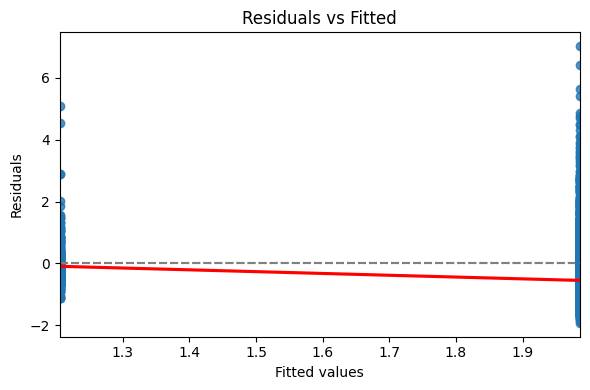

In [243]:
#checking linearity
plt.figure(figsize=(6, 4))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

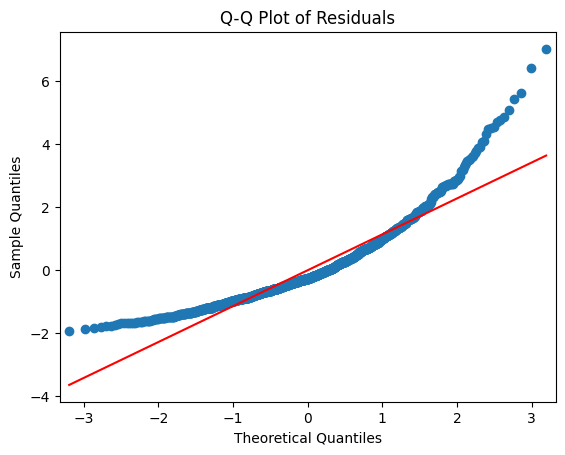

Shapiro-Wilk test p = 0.0000


In [244]:
#normality of residuals
sm.qqplot(residuals, line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test (optional)
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test p = {p:.4f}")  # p > 0.05 = normal residuals


In [229]:
# don't use .ols because assumptions violated, use gamme instead
#assumptions (QQ plot, Shapiro Wilk) are violated for normal ols, use gamma distribution instead
#use this model! it fits the assumptions! 
import statsmodels.api as sm
model_gamma = smf.glm(
    formula="Volume ~ C(Colocalisation_VGLUT1, Treatment(reference=0)) * Lumbar_Segment * C(Position, Treatment(reference='M'))",
    data=hc_data, 
    family=sm.families.Gamma(link=sm.families.links.Log())
).fit()

print(model_gamma.summary())

#note: why no significance for lateral vs medial and upper vs lower? was significant or close to significance without Coloc VGLUT1

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                 1421
Model:                            GLM   Df Residuals:                     1413
Model Family:                   Gamma   Df Model:                            7
Link Function:                    Log   Scale:                         0.36649
Method:                          IRLS   Log-Likelihood:                -1905.2
Date:                Tue, 25 Mar 2025   Deviance:                       503.51
Time:                        14:32:41   Pearson chi2:                     518.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1038
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [245]:
# don't use .ols because assumptions violated, use gamme instead
#assumptions (QQ plot, Shapiro Wilk) are violated for normal ols, use gamma distribution instead
#use this model! it fits the assumptions! 
import statsmodels.api as sm
model_gamma = smf.glm(
    formula="Volume ~ C(Colocalisation_VGLUT1, Treatment(reference=0)) ",
    data=hc_data, 
    family=sm.families.Gamma(link=sm.families.links.Log())
).fit()

print(model_gamma.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                 1421
Model:                            GLM   Df Residuals:                     1419
Model Family:                   Gamma   Df Model:                            1
Link Function:                    Log   Scale:                         0.37755
Method:                          IRLS   Log-Likelihood:                -1917.2
Date:                Tue, 25 Mar 2025   Deviance:                       510.80
Time:                        15:12:59   Pearson chi2:                     536.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.08865
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

# testing MMP9 and VGLUT1 coloc - HC only

In [135]:
# checking whether or not data is balanced - data is not balanced

import pandas as pd

# Cross-tab of outcome vs. group
#pd.crosstab(Data['group'], Data['binary_outcome'])

# Cross-tab of all factors together
pd.crosstab([data['Type'], data['Position']], data['Colocalisation_only_VGLUT'])


Colocalisation_only_VGLUT        0      1
Type  Position                           
HC    L                       1005    214
      M                        189     13
Other L                    1139154  35332
      M                    1169228  24430

In [136]:
# checking sample sizes
data['Type'].value_counts()
data.groupby(['Type', 'Position']).size()


Type   Position
HC     L              1219
       M               202
Other  L           1174486
       M           1193658
dtype: int64

In [140]:
data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN_Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
0,0.042181,µm^3,Other,1,1001,M,1,Upper,0.850943,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
1,0.070322,µm^3,Other,2,1001,M,1,Upper,1.173010,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
2,0.430202,µm^3,Other,3,1001,M,1,Upper,4.984310,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
3,0.104559,µm^3,Other,4,1001,M,1,Upper,1.519960,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
4,0.093794,µm^3,Other,6,1001,M,1,Upper,1.327620,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369560,0.128276,µm^3,Other,29685,1094,L,2,Upper,1.440850,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369561,0.118354,µm^3,Other,29686,1094,L,2,Upper,1.377840,µm^2,...,479.779,µm^2,542.236,µm^3,0,0,0,0,0,1
2369562,0.116735,µm^3,Other,29687,1094,L,2,Upper,1.267910,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369563,0.107981,µm^3,Other,29688,1094,L,2,Upper,1.209640,µm^2,...,479.779,µm^2,542.236,µm^3,0,1,0,0,1,0


In [278]:
# checking sample sizes
#HC_DATA['Typ'].value_counts()
hc_data.groupby([ 'Position']).size()


Position
L    1219
M     202
dtype: int64

In [141]:
hc_data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN_Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
15169,3.709070,µm^3,HC,27697,1001,M,1,Upper,31.59650,µm^2,...,2413.150,µm^2,2487.290,µm^3,1,1,0,1,0,0
15768,1.489430,µm^3,HC,28722,1001,M,1,Upper,14.18870,µm^2,...,2413.150,µm^2,2487.290,µm^3,1,1,0,1,0,0
59740,4.428090,µm^3,HC,15921,1003,L,1,Upper,29.54010,µm^2,...,1595.755,µm^2,1358.522,µm^3,1,0,1,0,0,0
69469,2.264950,µm^3,HC,37596,1003,L,1,Upper,19.14770,µm^2,...,756.690,µm^2,688.760,µm^3,1,1,0,1,0,0
86026,4.973700,µm^3,HC,16582,1004,M,1,Upper,37.36090,µm^2,...,2096.770,µm^2,2444.810,µm^3,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365532,0.816079,µm^3,HC,23463,1094,L,2,Upper,7.09212,µm^2,...,479.779,µm^2,542.236,µm^3,1,0,1,0,0,0
2365871,1.527900,µm^3,HC,24060,1094,L,2,Upper,11.48310,µm^2,...,1608.070,µm^2,921.522,µm^3,1,1,0,1,0,0
2365958,0.840816,µm^3,HC,24196,1094,L,2,Upper,9.46901,µm^2,...,479.779,µm^2,542.236,µm^3,1,0,1,0,0,0
2365987,0.903467,µm^3,HC,24245,1094,L,2,Upper,7.14795,µm^2,...,1608.070,µm^2,921.522,µm^3,1,0,1,0,0,0


In [137]:
# Testing influence of Position on only MMP9

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 3-way interaction
model_only_MMP9 = smf.glm(
    formula="Colocalisation_only_MMP9 ~ C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit()

print(model_only_MMP9.summary())

from statsmodels.stats.multitest import multipletests


                    Generalized Linear Model Regression Results                     
Dep. Variable:     Colocalisation_only_MMP9   No. Observations:                 1421
Model:                                  GLM   Df Residuals:                     1419
Model Family:                      Binomial   Df Model:                            1
Link Function:                        Logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -455.64
Date:                      Thu, 27 Mar 2025   Deviance:                       911.28
Time:                              17:42:28   Pearson chi2:                 1.42e+03
No. Iterations:                           5   Pseudo R-squ. (CS):            0.04392
Covariance Type:                  nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

# Plotting Area by synapse subtype

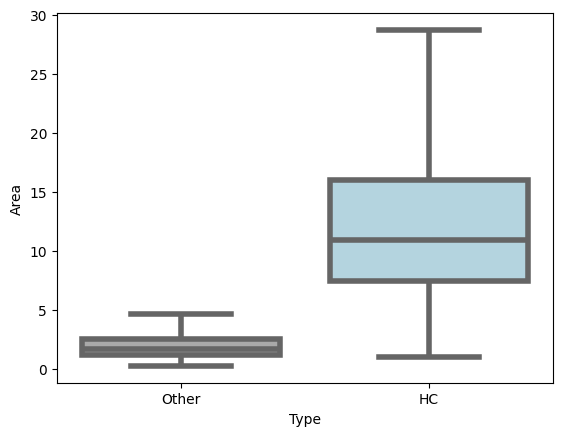

In [526]:
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(data, x="Type", y="Area", hue="Type", palette=custom_palette,  linewidth = 4, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

plt.show()

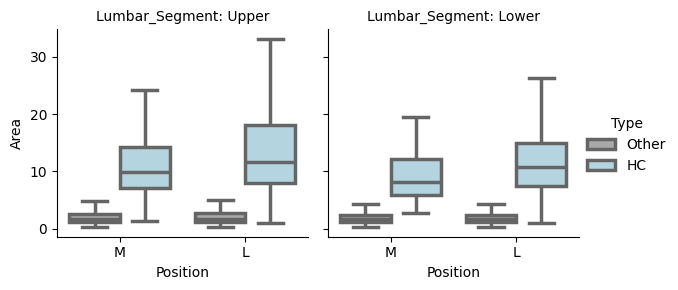

In [527]:
# plotting Area data by Type, Posiiton and Lumbar Segment
# Define a custom color palette (adjust as needed)
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  # Adjust colors based on your data

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(data, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the boxplot with the custom color palette
g.map_dataframe(sns.boxplot, x="Position", y="Area", hue="Type", palette=custom_palette, linewidth = 2.5, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar_Segment: {col_name}")
g.add_legend(title="Type")

plt.show()

# Testing influence of Position on Colocalisation with VGLUT1 and/or MMP9 or no coloc

In [142]:
# using mixed model to account for repeated measures
import statsmodels.formula.api as smf

# Fit models with clustered SEs
model_only_VGLUT = smf.glm(
    formula="Colocalisation_only_VGLUT ~ C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit(cov_type='cluster', cov_kwds={'groups': hc_data['Animal']})

model_only_MMP9 = smf.glm(
    formula="Colocalisation_only_MMP9 ~ C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit(cov_type='cluster', cov_kwds={'groups': hc_data['Animal']})

model_VGLUT_MMP9 = smf.glm(
    formula="Colocalisation_VGLUT1_and_MMP9 ~ C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit(cov_type='cluster', cov_kwds={'groups': hc_data['Animal']})

model_no_coloc = smf.glm(
    formula="No_Colocalisation ~ C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit(cov_type='cluster', cov_kwds={'groups': hc_data['Animal']})


In [143]:
key = "C(Position, Treatment(reference='M'))[T.L]"

pvals = [
    model_only_MMP9.pvalues[key],
    model_only_VGLUT.pvalues[key],
    model_VGLUT_MMP9.pvalues[key],
    model_no_coloc.pvalues[key]
]


In [144]:
from statsmodels.stats.multitest import multipletests

adjusted_pvals = multipletests(pvals, method='fdr_bh')[1]  # Returns adjusted p-values
model_names = ["Only MMP9", "Only VGLUT1", "VGLUT1 + MMP9", "No Colocalisation"]

# Print results nicely
print("Adjusted p-values (FDR):")
for name, p in zip(model_names, adjusted_pvals):
    print(f"{name:>20}: {p:.6f}")


Adjusted p-values (FDR):
           Only MMP9: 0.000000
         Only VGLUT1: 0.000175
       VGLUT1 + MMP9: 0.009491
   No Colocalisation: 0.028239


In [145]:
import numpy as np

for name, model in zip(model_names, [model_only_MMP9, model_only_VGLUT, model_VGLUT_MMP9, model_no_coloc]):
    or_val = np.exp(model.params[key])
    ci_lower, ci_upper = np.exp(model.conf_int().loc[key])
    print(f"{name:>20}: OR = {or_val:.2f} [95% CI: {ci_lower:.2f}, {ci_upper:.2f}]")


           Only MMP9: OR = 0.20 [95% CI: 0.13, 0.33]
         Only VGLUT1: OR = 3.10 [95% CI: 1.76, 5.44]
       VGLUT1 + MMP9: OR = 2.09 [95% CI: 1.22, 3.57]
   No Colocalisation: OR = 0.46 [95% CI: 0.23, 0.92]


In [146]:
betas = [
    model_only_MMP9.params[key],
    model_only_VGLUT.params[key],
    model_VGLUT_MMP9.params[key],
    model_no_coloc.params[key]
]

model_names = ["Only MMP9", "Only VGLUT1", "VGLUT1 + MMP9", "No Colocalisation"]

print("Beta (log-odds) values:")
for name, b in zip(model_names, betas):
    print(f"{name:>20}: {b:.4f}")


Beta (log-odds) values:
           Only MMP9: -1.5855
         Only VGLUT1: 1.1300
       VGLUT1 + MMP9: 0.7364
   No Colocalisation: -0.7710


In [147]:
import numpy as np
import pandas as pd

key = "C(Position, Treatment(reference='M'))[T.L]"

models = {
    "Only MMP9": model_only_MMP9,
    "Only VGLUT1": model_only_VGLUT,
    "VGLUT1 + MMP9": model_VGLUT_MMP9,
    "No Colocalisation": model_no_coloc
}

rows = []
for name, model in models.items():
    beta = model.params[key]
    pval = model.pvalues[key]
    or_val = np.exp(beta)
    ci_lower, ci_upper = np.exp(model.conf_int().loc[key])
    
    rows.append({
        "Model": name,
        "β (log-odds)": f"{beta:.4f}",
        "p-value": f"{pval:.4f}",
        "OR": f"{or_val:.2f}",
        "95% CI for OR": f"[{ci_lower:.2f}, {ci_upper:.2f}]"
    })

summary_df = pd.DataFrame(rows)


In [148]:
summary_df

,Model,β (log-odds),p-value,OR,95% CI for OR
0,Only MMP9,-1.5855,0.0000,0.20,"[0.13, 0.33]"
1,Only VGLUT1,1.1300,0.0001,3.10,"[1.76, 5.44]"
2,VGLUT1 + MMP9,0.7364,0.0071,2.09,"[1.22, 3.57]"
3,No Colocalisation,-0.7710,0.0282,0.46,"[0.23, 0.92]"


In [138]:
# Testing influence of Position on only VGLUT1

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


model_only_VGLUT = smf.glm(
    formula="Colocalisation_only_VGLUT ~ C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit()

print(model_only_VGLUT.summary())

from statsmodels.stats.multitest import multipletests

                     Generalized Linear Model Regression Results                     
Dep. Variable:     Colocalisation_only_VGLUT   No. Observations:                 1421
Model:                                   GLM   Df Residuals:                     1419
Model Family:                       Binomial   Df Model:                            1
Link Function:                         Logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -614.56
Date:                       Thu, 27 Mar 2025   Deviance:                       1229.1
Time:                               17:42:59   Pearson chi2:                 1.42e+03
No. Iterations:                            5   Pseudo R-squ. (CS):            0.01343
Covariance Type:                   nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

In [264]:
# Testing influence of Position on VGLUT1 and MMP9

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 3-way interaction
model_VGLUT_MMP9 = smf.glm(
    formula="Colocalisation_VGLUT1_and_MMP9 ~ C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit()

print(model_VGLUT_MMP9.summary())

from statsmodels.stats.multitest import multipletests

                       Generalized Linear Model Regression Results                        
Dep. Variable:     Colocalisation_VGLUT1_and_MMP9   No. Observations:                 1421
Model:                                        GLM   Df Residuals:                     1419
Model Family:                            Binomial   Df Model:                            1
Link Function:                              Logit   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:                -911.45
Date:                            Tue, 25 Mar 2025   Deviance:                       1822.9
Time:                                    15:42:00   Pearson chi2:                 1.42e+03
No. Iterations:                                 4   Pseudo R-squ. (CS):            0.01594
Covariance Type:                        nonrobust                                         
                                                 coef    std err          z      P>|z|    

In [265]:
# Testing influence of Position on no colocalisation

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 3-way interaction
model_no_coloc = smf.glm(
    formula="No_Colocalisation ~ C(Position, Treatment(reference='M'))",
    data=hc_data,
    family=sm.families.Binomial()
).fit()

print(model_no_coloc.summary())

from statsmodels.stats.multitest import multipletests

                 Generalized Linear Model Regression Results                  
Dep. Variable:      No_Colocalisation   No. Observations:                 1421
Model:                            GLM   Df Residuals:                     1419
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -408.52
Date:                Tue, 25 Mar 2025   Deviance:                       817.04
Time:                        15:43:35   Pearson chi2:                 1.42e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.007347
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [266]:
# Step 1: Inspect the keys to find the correct one
print(model_no_coloc.pvalues.index.tolist())

['Intercept', "C(Position, Treatment(reference='M'))[T.L]"]


In [267]:
# Step 2: Use the correct key from inspection
key = "C(Position, Treatment(reference='M'))[T.L]"  # ← use exact match

# Step 3: Extract p-values
pvals = [
    model_only_MMP9.pvalues[key],
    model_only_VGLUT.pvalues[key],
    model_VGLUT_MMP9.pvalues[key],
    model_no_coloc.pvalues[key]
]

# Adjust
from statsmodels.stats.multitest import multipletests
adjusted_pvals = multipletests(pvals, method='fdr_bh')[1]

# Print nicely
model_names = ["Only MMP9", "Only VGLUT", "VGLUT + MMP9", "No Colocalisation"]

print("Adjusted p-values (FDR, 4 decimal places):")
for name, p in zip(model_names, adjusted_pvals):
    print(f"{name:>20}: {p:.10f}")



Adjusted p-values (FDR, 4 decimal places):
           Only MMP9: 0.0000000000
          Only VGLUT: 0.0001838652
        VGLUT + MMP9: 0.0000031521
   No Colocalisation: 0.0006413866


# Plotting HC vs Other


## Area

## Volume

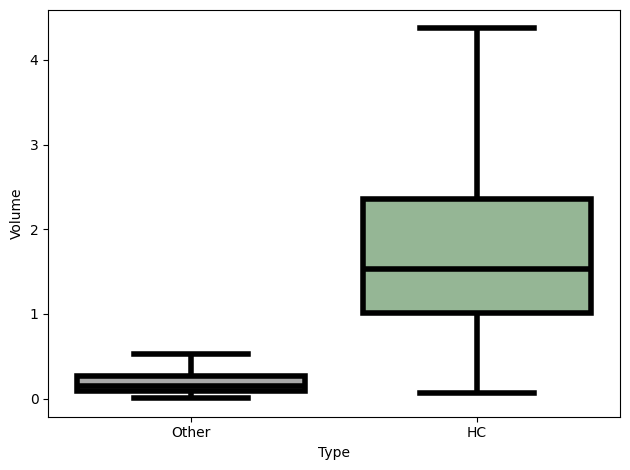

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom fill colors
custom_palette = {"Other": "darkgrey", "HC": "darkseagreen"}
order = ["Other", "HC"]

# Plot
plot = sns.boxplot(
    data=data,
    x="Type",
    y="Volume",
    hue="Type",
    palette=custom_palette,
    order=order,
    hue_order=order,
    linewidth=4,
    showfliers=False,
    boxprops=dict(edgecolor="black", linewidth=4),
    medianprops=dict(color="black", linewidth=4),
    whiskerprops=dict(color="black", linewidth=4),
    capprops=dict(color="black", linewidth=4)
)



plt.tight_layout()
plt.show()



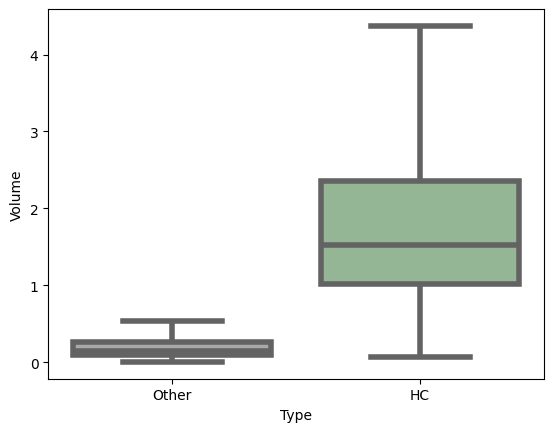

In [281]:
custom_palette = {"Other": "darkgrey", "HC": "darkseagreen"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(data, x="Type", y="Volume", hue="Type", palette=custom_palette,  linewidth = 4, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar_Segment: {col_name}")
g.add_legend(title="Type")

plt.show()

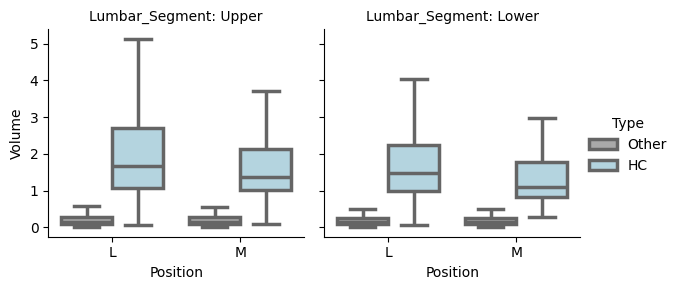

In [38]:
# plotting Volume data by Type, Posiiton and Lumbar Segment
# Define a custom color palette (adjust as needed)
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  # Adjust colors based on your data

# Set hue order (Other first, then HC)
hue_order = ["Other", "HC"]
order = ["L", "M"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(data, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the boxplot with the custom color palette
g.map_dataframe(sns.boxplot, x="Position", y="Volume", hue="Type", hue_order = hue_order, order = order,
            palette=custom_palette, linewidth = 2.5, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar_Segment: {col_name}")
g.add_legend(title="Type")

plt.show()

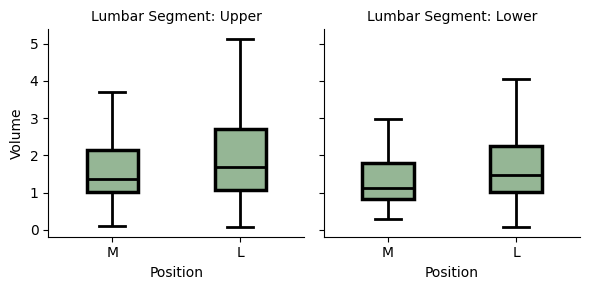

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette for fills
custom_palette = {"M": "darkseagreen", "L": "darkseagreen"}
hue_order = ["M", "L"]

# Function wrapper to customize boxplot styling
def styled_boxplot(data, **kwargs):
    sns.boxplot(
        data=data,
        x="Position",
        y="Volume",
        hue="Position",
        hue_order=hue_order,
        palette=custom_palette,
        showfliers=False,
        linewidth=2.5,
        width = 0.4,
        boxprops=dict(edgecolor="black", linewidth=2.5),
        whiskerprops=dict(color="black", linewidth=2),
        capprops=dict(color="black", linewidth=2),
        medianprops=dict(color="black", linewidth=2),
        **kwargs
    )

# Create FacetGrid split by Lumbar Segment
g = sns.FacetGrid(hc_data, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Apply styled boxplot function to each facet
g.map_dataframe(styled_boxplot)

# Adjust titles and clean up legend
g.set_titles("Lumbar Segment: {col_name}")
#g.add_legend(title="Position")

plt.tight_layout()
plt.show()


ValueError: The palette dictionary is missing keys: {'Other', 'HC'}

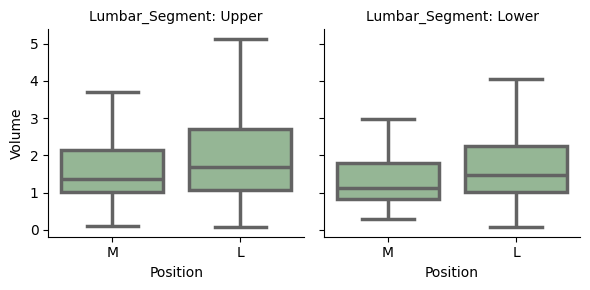

In [295]:
# plotting HC Volume data by Posiiton and Lumbar Segment
# Define a custom color palette (adjust as needed)
custom_palette = {"M": "darkseagreen", "L": "darkseagreen"}  # Adjust colors based on your data

# Set hue order (Other first, then HC)
hue_order = ["M", "L"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(hc_data, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the boxplot with the custom color palette
g.map_dataframe(sns.boxplot, x="Position", y="Volume", hue="Position", hue_order = hue_order, 
            palette=custom_palette, linewidth = 2.5, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar_Segment: {col_name}")
#g.add_legend(title="Position")




plt.show()

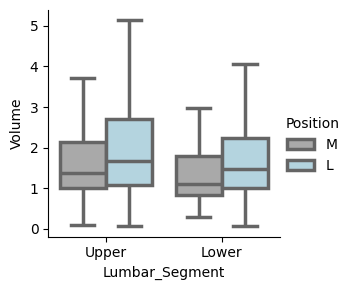

In [299]:
# plotting HC Volume data by Posiiton and Lumbar Segment
# Define a custom color palette (adjust as needed)
custom_palette = {"M": "darkgrey", "L": "lightblue"}  # Adjust colors based on your data

# Set hue order (Other first, then HC)
hue_order = ["M", "L"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(hc_data, sharey=True)

# Map the boxplot with the custom color palette
g.map_dataframe(sns.boxplot, x="Lumbar_Segment", y="Volume", hue="Position", hue_order = hue_order, 
            palette=custom_palette, linewidth = 2.5, showfliers=False)

# Adjust titles and legends
#g.set_titles("Lumbar_Segment: {col_name}")
g.add_legend(title="Position")

plt.show()

# Volume of HC if colocalised with VGLUT1 vs if not

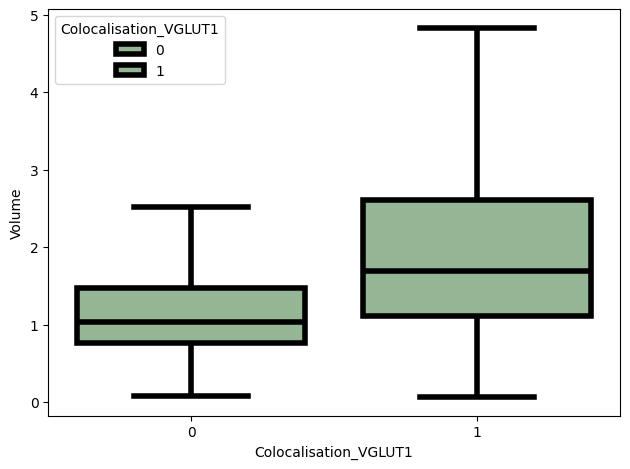

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom fill colors
custom_palette = {0: "darkseagreen", 1: "darkseagreen"}
order = [0, 1]
hue_order = [0, 1]

# Plot
plot = sns.boxplot(
    data=hc_data,
    x="Colocalisation_VGLUT1",
    y="Volume",
    hue="Colocalisation_VGLUT1",
    palette=custom_palette,
    #order=order,
    hue_order=order,
    linewidth=4,
    showfliers=False,
    boxprops=dict(edgecolor="black", linewidth=4),
    medianprops=dict(color="black", linewidth=4),
    whiskerprops=dict(color="black", linewidth=4),
    capprops=dict(color="black", linewidth=4)
)



plt.tight_layout()
plt.show()

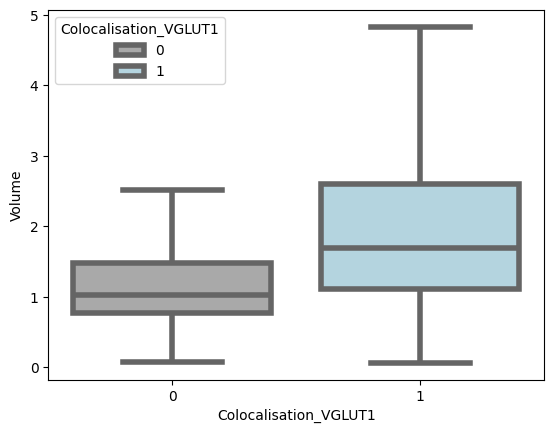

In [283]:
custom_palette = {0: "darkgrey", 1: "lightblue"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
#order = ["Other", "HC"]
hue_order = [0, 1]
# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(hc_data, x="Colocalisation_VGLUT1", y="Volume", hue="Colocalisation_VGLUT1", palette=custom_palette,  linewidth = 4, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Colocalisation_VGLUT1")

plt.show()

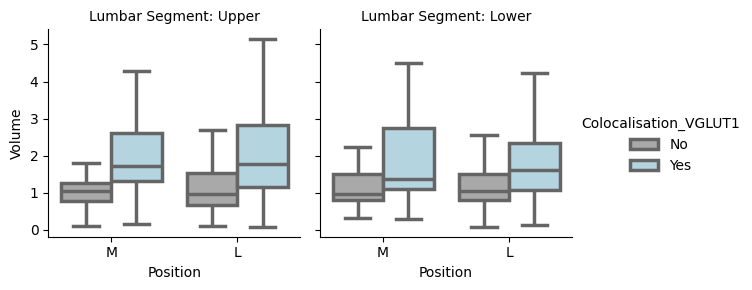

In [577]:
# plotting Area data by Type, Posiiton and Lumbar Segment
# Define a custom color palette (adjust as needed)
custom_palette = {"No": "darkgrey", "Yes": "lightblue"}  # Adjust colors based on your data

# Set hue order (Other first, then HC)
hue_order = ["No", "Yes"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(hc_data, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the boxplot with the custom color palette
g.map_dataframe(sns.boxplot, x="Position", y="Volume", hue="Colocalisation_VGLUT1", hue_order = hue_order, 
            palette=custom_palette, linewidth = 2.5, showfliers=False)

# Adjust titles and legends
#g.set_titles("Lumbar_Segment: {col_name}")
#g.add_legend(title="Type")
# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Colocalisation_VGLUT1")

plt.show()

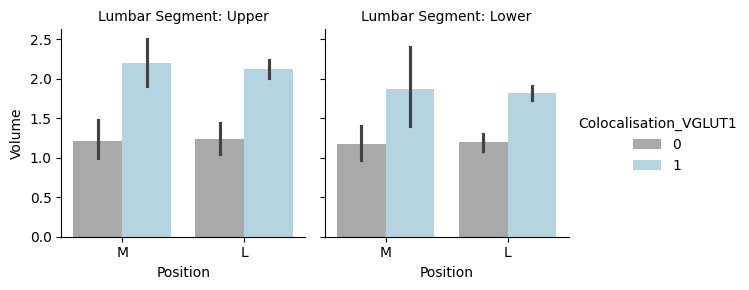

In [285]:
# bar plot - HC only - does VGLUT1 colocalisation affect volume?
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette (adjust as needed)
custom_palette = {0: "darkgrey", 1: "lightblue"}

# Set hue order (Other first, then HC)
hue_order = [0, 1]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(hc_data, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="Volume", 
    hue="Colocalisation_VGLUT1", 
    hue_order=hue_order, 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Colocalisation_VGLUT1")

# Show plot
plt.show()

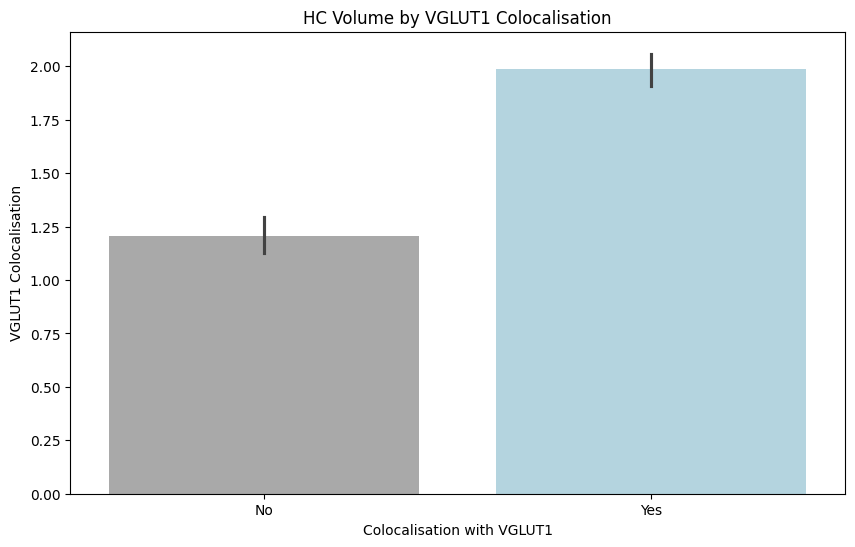

In [564]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {"No": "darkgrey", "Yes": "lightblue"}  

# Define order of categories
order = ["No", "Yes"]

# Create the barplot
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=hc_data,
    x="Colocalisation_VGLUT1",
    y="Volume",
    hue="Colocalisation_VGLUT1",
    palette=custom_palette, order = order
)

# Adjust aesthetics
plt.title("HC Volume by VGLUT1 Colocalisation")
plt.xlabel("Colocalisation with VGLUT1")
plt.ylabel("VGLUT1 Colocalisation")
#plt.legend(title="Type")

# Show plot
plt.show()

# comparing volume if colocalised with MMP9 and VGLUT1 vs if not

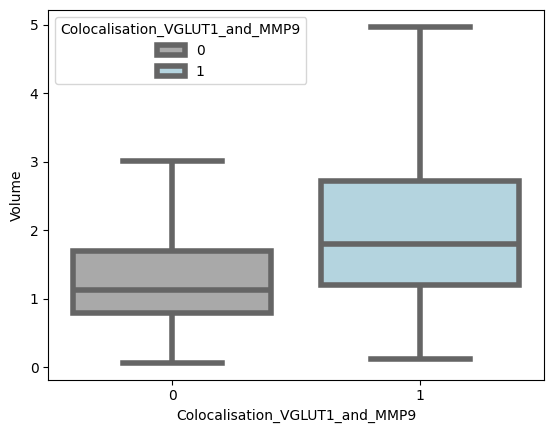

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = {0: "darkgrey", 1: "lightblue"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
#order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(hc_data, x="Colocalisation_VGLUT1_and_MMP9", y="Volume", hue="Colocalisation_VGLUT1_and_MMP9", palette=custom_palette,  linewidth = 4, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Colocalisation_VGLUT1_and_MMP9")

plt.show()

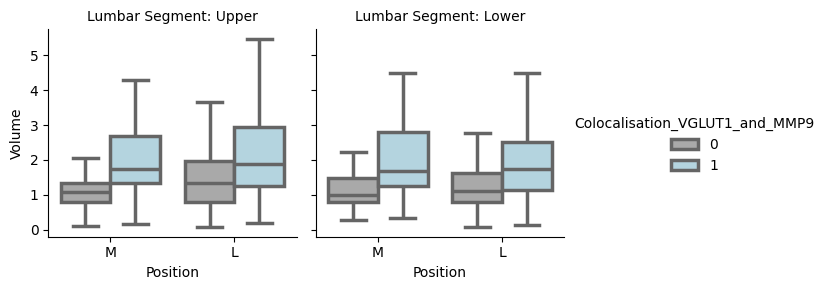

In [286]:
# plotting Area data by Type, Posiiton and Lumbar Segment
# Define a custom color palette (adjust as needed)
custom_palette = {0: "darkgrey", 1: "lightblue"}  # Adjust colors based on your data

# Set hue order (Other first, then HC)
hue_order = [0, 1]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(hc_data, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the boxplot with the custom color palette
g.map_dataframe(sns.boxplot, x="Position", y="Volume", hue="Colocalisation_VGLUT1_and_MMP9", hue_order = hue_order, 
            palette=custom_palette, linewidth = 2.5, showfliers=False)

# Adjust titles and legends
#g.set_titles("Lumbar_Segment: {col_name}")
#g.add_legend(title="Type")
# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Colocalisation_VGLUT1_and_MMP9")

plt.show()

# Distance to VGLUT1

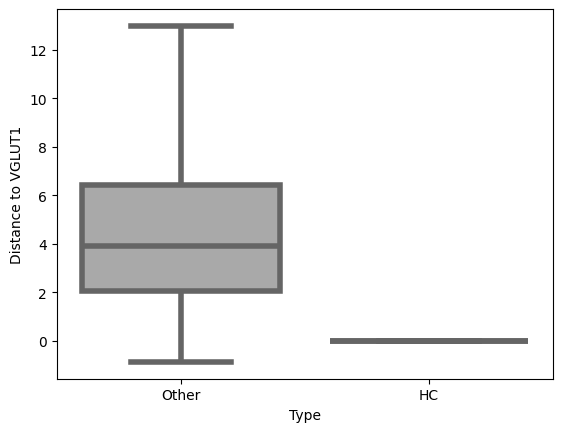

In [393]:
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(data, x="Type", y="Distance to VGLUT1", hue="Type", palette=custom_palette,  linewidth = 4, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

plt.show()

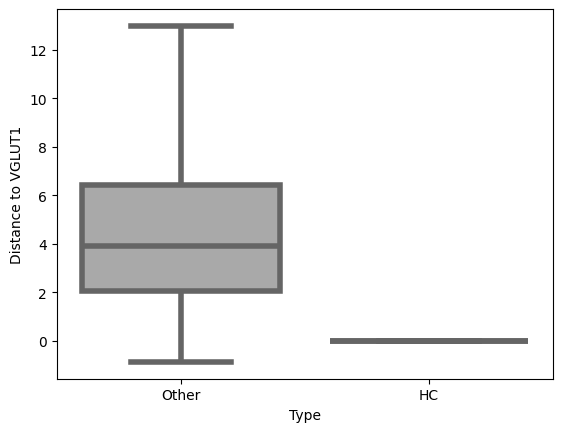

In [394]:
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(data, x="Type", y="Distance to VGLUT1", hue="Type", palette=custom_palette,  linewidth = 4, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

plt.show()

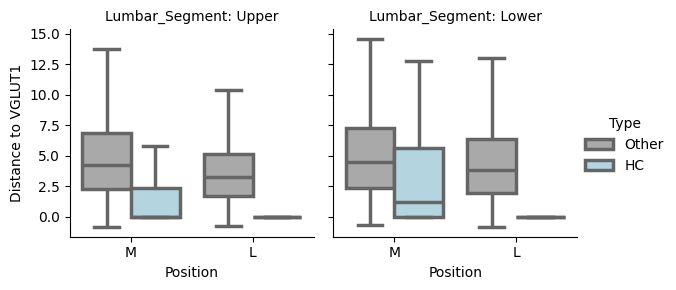

In [395]:
# plotting Area data by Type, Posiiton and Lumbar Segment
# Define a custom color palette (adjust as needed)
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  # Adjust colors based on your data

# Set hue order (Other first, then HC)
hue_order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(data, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the boxplot with the custom color palette
g.map_dataframe(sns.boxplot, x="Position", y="Distance to VGLUT1", hue="Type", hue_order = hue_order, 
            palette=custom_palette, linewidth = 2.5, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar_Segment: {col_name}")
g.add_legend(title="Type")

plt.show()

In [361]:
hc_m_novlgut_data = hc_data[(hc_data['Position'] == 'M') & (hc_data['Colocalisation_VGLUT1'] == 0)]

In [371]:
hc_novlgut_data = hc_data[(hc_data['Colocalisation_VGLUT1'] == 0)]

In [374]:
hc_vlgut_data = hc_data[(hc_data['Colocalisation_VGLUT1'] == 1)]

In [362]:
hc_m_novlgut_data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN_Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
210187,1.259140,µm^3,HC,31672,1009,M,1,Upper,8.30413,µm^2,...,1332.920,µm^2,1238.76,µm^3,0,0,0,0,0,1
314206,6.291260,µm^3,HC,14867,1014,M,2,Upper,34.97050,µm^2,...,2848.597,µm^2,3242.97,µm^3,0,1,0,0,1,0
327566,4.083830,µm^3,HC,36615,1014,M,2,Upper,37.41810,µm^2,...,2848.597,µm^2,3242.97,µm^3,0,1,0,0,1,0
383478,0.789426,µm^3,HC,3158,1018,M,2,Upper,10.06560,µm^2,...,3083.030,µm^2,3735.58,µm^3,0,1,0,0,1,0
423912,1.094650,µm^3,HC,19284,1020,M,2,Upper,7.77669,µm^2,...,4146.480,µm^2,5144.01,µm^3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293201,1.791530,µm^3,HC,39185,1091,M,1,Upper,10.34080,µm^2,...,2513.060,µm^2,2048.51,µm^3,0,1,0,0,1,0
2325321,0.855799,µm^3,HC,5227,1093,M,1,Upper,5.11581,µm^2,...,4029.830,µm^2,4344.08,µm^3,0,1,0,0,1,0
2326069,1.119180,µm^3,HC,6473,1093,M,1,Upper,7.20128,µm^2,...,4029.830,µm^2,4344.08,µm^3,0,1,0,0,1,0
2329366,0.809574,µm^3,HC,11690,1093,M,1,Upper,6.13626,µm^2,...,4029.830,µm^2,4344.08,µm^3,0,1,0,0,1,0


/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_76955/2519945099.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(hc_novlgut_data, x = 'Position', order = order, y="Distance to VGLUT1", linecolor = "black",palette = custom_palette, linewidth = 4, showfliers=True)


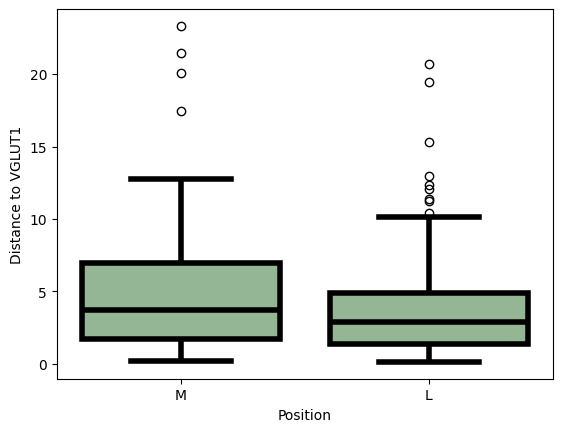

In [379]:
custom_palette = {"darkseagreen"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
order = ["M", "L"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(hc_novlgut_data, x = 'Position', order = order, y="Distance to VGLUT1", linecolor = "black",palette = custom_palette, linewidth = 4, showfliers=True)

# Adjust titles and legends
#g.set_titles("Lumbar Segment: {col_name}")
#g.add_legend(title="Type")

plt.show()

/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_76955/2575511824.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(hc_vlgut_data, x = 'Position', y="Distance to VGLUT1", linecolor = "black",palette = custom_palette, linewidth = 1, showfliers=True)


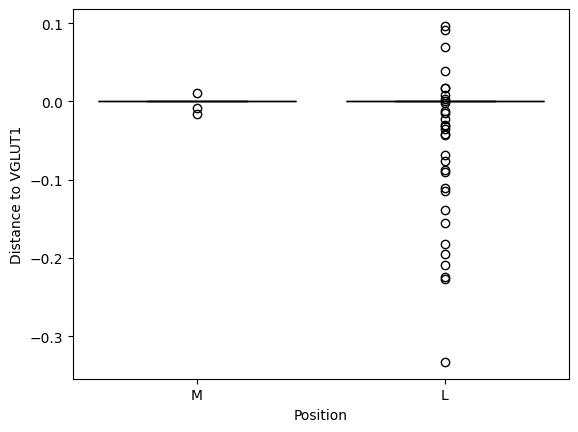

In [377]:
custom_palette = {"darkseagreen"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
#order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(hc_vlgut_data, x = 'Position', y="Distance to VGLUT1", linecolor = "black",palette = custom_palette, linewidth = 1, showfliers=True)

# Adjust titles and legends
#g.set_titles("Lumbar Segment: {col_name}")
#g.add_legend(title="Type")

plt.show()

/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_76955/798739042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(hc_m_novlgut_data, y="Distance to VGLUT1", linecolor = "black",palette = custom_palette, linewidth = 4, showfliers=False)


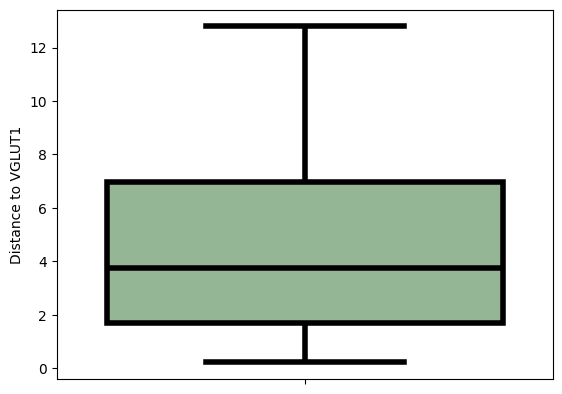

In [370]:
custom_palette = {"darkseagreen"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
#order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(hc_m_novlgut_data, y="Distance to VGLUT1", linecolor = "black",palette = custom_palette, linewidth = 4, showfliers=False)

# Adjust titles and legends
#g.set_titles("Lumbar Segment: {col_name}")
#g.add_legend(title="Type")

plt.show()

In [ ]:
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(hc_m_novlgut_data, x="Type", y="Distance to VGLUT1", hue="Type", palette=custom_palette,  linewidth = 4, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

plt.show()

# VGLUT1 Colocalisation

In [22]:
# computing percentages colocalised with MMP9 overall - just HC vs Other
counts = data.groupby(["Type"]).size().reset_index(name="Total Count")
counts

# Count colocalized synapses per Type, Lumbar Segment, and Position
colocalised_counts = data[data["Colocalisation_MMP9"] == 1].groupby(
    ["Type"]
).size().reset_index(name="Colocalised Count")
colocalised_counts

# Merge both dataframes
merged_counts = pd.merge(counts, colocalised_counts, on=["Type"], how="left")
# Compute percentage of colocalized synapses
merged_counts["Colocalisation Percentage"] = (merged_counts["Colocalised Count"] / merged_counts["Total Count"]) * 100

merged_counts

,Type,Total Count,Colocalised Count,Colocalisation Percentage
0,HC,1421,1073,75.510204
1,Other,2368144,811434,34.264555


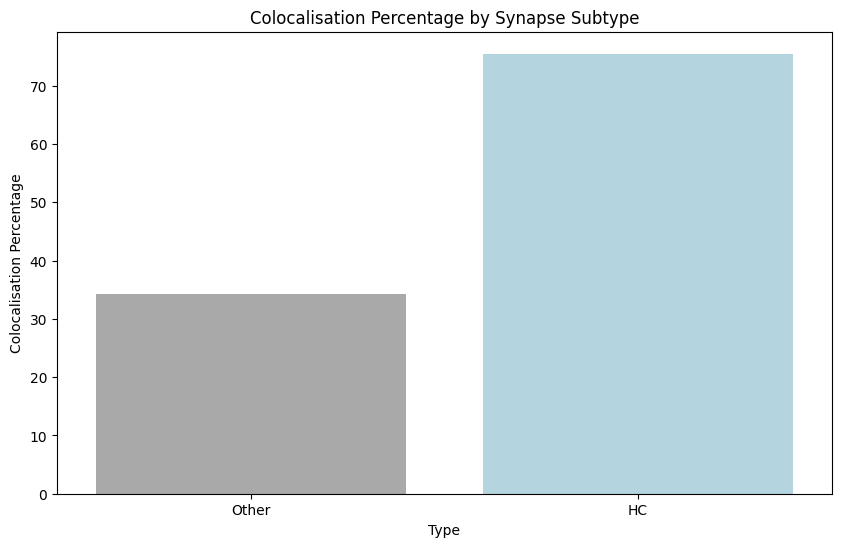

In [23]:
#plotting colocalisation with MMP9
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  

# Define order of categories
order = ["Other", "HC"]

# Create the barplot
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=merged_counts,
    x="Type",
    y="Colocalisation Percentage",
    hue="Type",
    palette=custom_palette, order = order
)

# Adjust aesthetics
plt.title("Colocalisation Percentage by Synapse Subtype")
plt.xlabel("Type")
plt.ylabel("Colocalisation Percentage")
#plt.legend(title="Type")

# Show plot
plt.show()

In [396]:
# computing percentages colocalised overall - just HC vs Other
counts = data.groupby(["Type"]).size().reset_index(name="Total Count")
counts

# Count colocalized synapses per Type, Lumbar Segment, and Position
colocalised_counts = data[data["Colocalisation_VGLUT1"] == "Yes"].groupby(
    ["Type"]
).size().reset_index(name="Colocalised Count")
colocalised_counts

# Merge both dataframes
merged_counts = pd.merge(counts, colocalised_counts, on=["Type"], how="left")
# Compute percentage of colocalized synapses
merged_counts["Colocalisation Percentage"] = (merged_counts["Colocalised Count"] / merged_counts["Total Count"]) * 100

merged_counts

,Type,Total Count,Colocalised Count,Colocalisation Percentage
0,HC,1421,1146,80.647431
1,Other,2368144,108685,4.589459


In [397]:
#computing percentages colocalised per animal, lumber segment, positon, and typr
total_counts_detailed = data.groupby(["Type", "Lumbar_Segment", "Position", "Animal"]).size().reset_index(name="Total Count")

# Count colocalized synapses per Type, Lumbar Segment, and Position
colocalised_counts_detailed = data[data["Colocalisation_VGLUT1"] == "Yes"].groupby(
    ["Type", "Lumbar_Segment", "Position", "Animal"]
).size().reset_index(name="Colocalised Count")

# Merge both dataframes
merged_counts_detailed = pd.merge(total_counts_detailed, colocalised_counts_detailed, on=["Type", "Lumbar_Segment", "Position", "Animal"], how="left")

# Compute percentage of colocalized synapses
merged_counts_detailed["Colocalisation Percentage"] = (merged_counts_detailed["Colocalised Count"] / merged_counts_detailed["Total Count"]) * 100
merged_counts_detailed

,Type,Lumbar_Segment,Position,Animal,Total Count,Colocalised Count,Colocalisation Percentage
0,HC,Lower,L,1,390,331,84.871795
1,HC,Lower,L,2,14,4,28.571429
2,HC,Lower,L,3,239,190,79.497908
3,HC,Lower,M,1,36,17,47.222222
4,HC,Lower,M,2,1,1,100.000000
5,HC,Lower,M,3,17,3,17.647059
6,HC,Upper,L,1,232,206,88.793103
7,HC,Upper,L,2,293,257,87.713311
8,HC,Upper,L,3,51,45,88.235294
9,HC,Upper,M,1,83,44,53.012048


In [398]:
numbers = data.groupby(["Type"]).size().reset_index(name="Total Count")


In [399]:
numbers

,Type,Total Count
0,HC,1421
1,Other,2368144


In [400]:
#computing percentages colocalised per animal, lumber segment, positon, and typr
total_counts_detailed = data.groupby(["Type", "Lumbar_Segment", "Position"]).size().reset_index(name="Total Count")

# Count colocalized synapses per Type, Lumbar Segment, and Position
colocalised_counts_detailed = data[data["Colocalisation_VGLUT1"] == "Yes"].groupby(
    ["Type", "Lumbar_Segment", "Position"]
).size().reset_index(name="Colocalised Count")

# Merge both dataframes
merged_counts_detailed = pd.merge(total_counts_detailed, colocalised_counts_detailed, on=["Type", "Lumbar_Segment", "Position"], how="left")

# Compute percentage of colocalized synapses
merged_counts_detailed["Colocalisation Percentage"] = (merged_counts_detailed["Colocalised Count"] / merged_counts_detailed["Total Count"]) * 100
merged_counts_detailed

,Type,Lumbar_Segment,Position,Total Count,Colocalised Count,Colocalisation Percentage
0,HC,Lower,L,643,525,81.648523
1,HC,Lower,M,54,21,38.888889
2,HC,Upper,L,576,508,88.194444
3,HC,Upper,M,148,92,62.162162
4,Other,Lower,L,650229,33413,5.138651
5,Other,Lower,M,584359,21177,3.623971
6,Other,Upper,L,524257,31119,5.935829
7,Other,Upper,M,609299,22976,3.770891


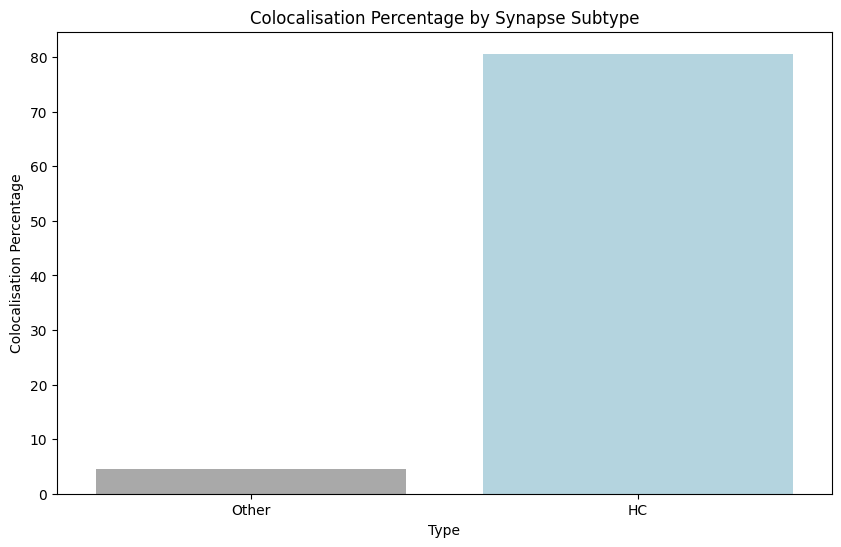

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  

# Define order of categories
order = ["Other", "HC"]

# Create the barplot
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=merged_counts,
    x="Type",
    y="Colocalisation Percentage",
    hue="Type",
    palette=custom_palette, order = order
)

# Adjust aesthetics
plt.title("Colocalisation Percentage by Synapse Subtype")
plt.xlabel("Type")
plt.ylabel("Colocalisation Percentage")
#plt.legend(title="Type")

# Show plot
plt.show()


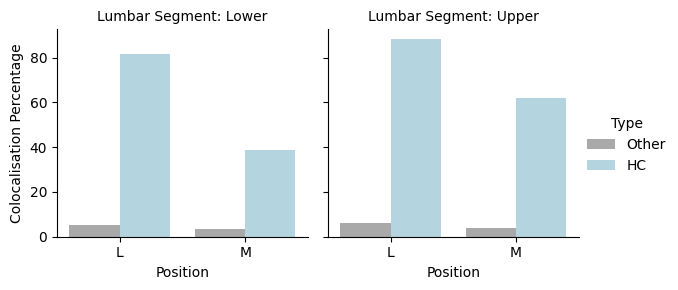

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette (adjust as needed)
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}

# Set hue order (Other first, then HC)
hue_order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(merged_counts_detailed, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="Colocalisation Percentage", 
    hue="Type", 
    hue_order=hue_order, 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

# Show plot
plt.show()


# Coloc with MMP9

In [656]:
import pandas as pd

# Compute total synapses count **and sum Volume** per Type and Colocalisation_VGLUT1
counts = data.groupby(["Type", "Colocalisation_VGLUT1"]).agg(
    Total_Count=("Type", "size"),  # Count total synapses
    Total_Volume=("Volume", "mean") # Sum Volume
).reset_index()

# Count colocalized synapses per Type, Colocalisation_VGLUT1, **and sum Volume**
colocalised_counts_mmp9 = data[data["Colocalisation MMP9"] == "Yes"].groupby(
    ["Type", "Colocalisation_VGLUT1"]
).agg(
    Colocalised_Count=("Type", "size")  # Count colocalised synapses 
).reset_index()

# Merge total counts with colocalised counts
merged_counts_mmp9 = pd.merge(counts, colocalised_counts_mmp9, on=["Type", "Colocalisation_VGLUT1"], how="left")

# Fill NaN values with 0 (for cases where there was no colocalisation)
merged_counts_mmp9.fillna(0, inplace=True)

# Compute percentage of colocalized synapses
merged_counts_mmp9["Colocalisation Percentage"] = (merged_counts_mmp9["Colocalised_Count"] / merged_counts_mmp9["Total_Count"]) * 100


merged_counts_mmp9

,Type,Colocalisation_VGLUT1,Total_Count,Total_Volume,Colocalised_Count,Colocalisation Percentage
0,HC,No,275,1.205424,154,56.000000
1,HC,Yes,1146,1.986286,919,80.191972
2,Other,No,2259459,0.209639,762511,33.747503
3,Other,Yes,108685,0.307922,48923,45.013571


In [664]:
# computing percentages colocalised overall - just HC vs Other
counts = data.groupby(["Type", "Colocalisation_VGLUT1"]).size().reset_index(name="Total_Count")
counts

# Count colocalized synapses per Type, Lumbar Segment, and Position
colocalised_counts_mmp9 = data[data["Colocalisation MMP9"] == "Yes"].groupby(
    ["Type", "Colocalisation_VGLUT1"]
).size().reset_index(name="Colocalised Count")
colocalised_counts_mmp9

# Merge both dataframes
merged_counts_mmp9 = pd.merge(counts, colocalised_counts_mmp9, on=["Type", "Colocalisation_VGLUT1"], how="left")
# Compute percentage of colocalized synapses
merged_counts_mmp9["Colocalisation Percentage"] = (merged_counts_mmp9["Colocalised Count"] / merged_counts_mmp9["Total_Count"]) * 100

merged_counts_mmp9

,Type,Colocalisation_VGLUT1,Total_Count,Colocalised Count,Colocalisation Percentage
0,HC,No,275,154,56.000000
1,HC,Yes,1146,919,80.191972
2,Other,No,2259459,762511,33.747503
3,Other,Yes,108685,48923,45.013571


In [47]:
## too detailed, per animal not needed
#computing percentages colocalised per animal, lumber segment, positon, and typr
total_counts_detailed = hc_data.groupby(["Type", "Lumbar_Segment", "Position", "Animal"]).agg(Total_Count=("Type", "size"),  # Count total synapses
    Total_Volume=("Volume", "mean") # Sum Volume
).reset_index()
    

# Compute total synapses count **and sum Volume** per Type and Colocalisation_VGLUT1
counts = hc_data.groupby(["Type", "Colocalisation_VGLUT1"]).agg(
    Total_Count=("Type", "size"),  # Count total synapses
    Total_Volume=("Volume", "mean") # Sum Volume
).reset_index()

# Count colocalized synapses per Type, Lumbar Segment, and Position
colocalised_counts_detailed_mmp9 = hc_data[hc_data["Colocalisation_VGLUT1"] == 1
].groupby(
    ["Type", "Lumbar_Segment", "Position", "Animal"]
).size().reset_index(name="Colocalised Count")

# Merge both dataframes
merged_counts_detailed_mmp9 = pd.merge(total_counts_detailed, colocalised_counts_detailed_mmp9, on=["Type", "Lumbar_Segment", "Position", "Animal"], how="left")

# Compute percentage of colocalized synapses
merged_counts_detailed_mmp9["Colocalisation Percentage"] = (merged_counts_detailed_mmp9["Colocalised Count"] / merged_counts_detailed_mmp9["Total_Count"]) * 100
merged_counts_detailed_mmp9

,Type,Lumbar_Segment,Position,Animal,Total_Count,Total_Volume,Colocalised Count,Colocalisation Percentage
0,HC,Lower,L,1,390,1.900239,331,84.871795
1,HC,Lower,L,2,14,1.398498,4,28.571429
2,HC,Lower,L,3,239,1.409302,190,79.497908
3,HC,Lower,M,1,36,1.652564,17,47.222222
4,HC,Lower,M,2,1,1.873150,1,100.000000
5,HC,Lower,M,3,17,0.964587,3,17.647059
6,HC,Upper,L,1,232,1.951694,206,88.793103
7,HC,Upper,L,2,293,2.094032,257,87.713311
8,HC,Upper,L,3,51,1.878163,45,88.235294
9,HC,Upper,M,1,83,1.579311,44,53.012048


In [46]:
#computing percentages colocalised per lumber segment, positon, and typr
total_counts_detailed = hc_data.groupby(["Type", "Lumbar_Segment", "Position"]).agg(Total_Count=("Type", "size"),  # Count total synapses
    Total_Volume=("Volume", "mean") # Sum Volume
).reset_index()
    

# Compute total synapses count **and sum Volume** per Type and Colocalisation_VGLUT1
counts = hc_data.groupby(["Type", "Colocalisation_VGLUT1"]).agg(
    Total_Count=("Type", "size"),  # Count total synapses
    Total_Volume=("Volume", "mean") # Sum Volume
).reset_index()

# Count colocalized synapses per Type, Lumbar Segment, and Position
colocalised_counts_detailed_mmp9 = hc_data[hc_data["Colocalisation_VGLUT1"] == 1].groupby(
    ["Type", "Lumbar_Segment", "Position"]
).size().reset_index(name="Colocalised Count")

# Merge both dataframes
merged_counts_detailed_mmp9 = pd.merge(total_counts_detailed, colocalised_counts_detailed_mmp9, on=["Type", "Lumbar_Segment", "Position"], how="left")

# Compute percentage of colocalized synapses
merged_counts_detailed_mmp9["Colocalisation Percentage"] = (merged_counts_detailed_mmp9["Colocalised Count"] / merged_counts_detailed_mmp9["Total_Count"]) * 100
merged_counts_detailed_mmp9

,Type,Lumbar_Segment,Position,Total_Count,Total_Volume,Colocalised Count,Colocalisation Percentage
0,HC,Lower,L,643,1.706836,525,81.648523
1,HC,Lower,M,54,1.440063,21,38.888889
2,HC,Upper,L,576,2.017588,508,88.194444
3,HC,Upper,M,148,1.826929,92,62.162162


In [40]:
#computing percentages colocalised per lumber segment, positon, and typr
total_counts_detailed = hc_data.groupby(["Type", "Lumbar_Segment", "Position"]).size().reset_index(name="Total_Count")

# Count colocalized synapses per Type, Lumbar Segment, and Position
colocalised_counts_detailed_mmp9 = hc_data[hc_data["Colocalisation_MMP9"] == 1].groupby(
    ["Type", "Lumbar_Segment", "Position", "Colocalisation_VGLUT1"]
).size().reset_index(name="Colocalised Count")

# Merge both dataframes
merged_counts_detailed_mmp9 = pd.merge(total_counts_detailed, colocalised_counts_detailed_mmp9, on=["Type", "Lumbar_Segment", "Position"], how="left")

# Compute percentage of colocalized synapses
merged_counts_detailed_mmp9["Colocalisation Percentage"] = (merged_counts_detailed_mmp9["Colocalised Count"] / merged_counts_detailed_mmp9["Total_Count"]) * 100
merged_counts_detailed_mmp9

,Type,Lumbar_Segment,Position,Total_Count,Colocalisation_VGLUT1,Colocalised Count,Colocalisation Percentage
0,HC,Lower,L,643,0,65,10.108865
1,HC,Lower,L,643,1,424,65.940902
2,HC,Lower,M,54,0,17,31.481481
3,HC,Lower,M,54,1,18,33.333333
4,HC,Upper,L,576,0,30,5.208333
5,HC,Upper,L,576,1,395,68.576389
6,HC,Upper,M,148,0,42,28.378378
7,HC,Upper,M,148,1,82,55.405405


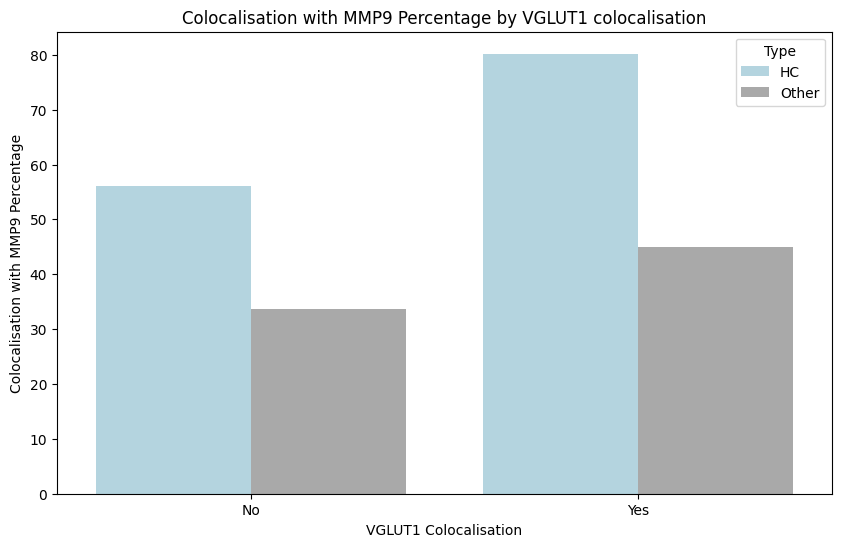

In [668]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}  

# Define order of categories
order = ["No", "Yes"]

# Create the barplot
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=merged_counts_mmp9,
    x="Colocalisation_VGLUT1",
    y="Colocalisation Percentage",
    hue="Type",
    palette=custom_palette, order = order
)

# Adjust aesthetics
plt.title("Colocalisation with MMP9 Percentage by VGLUT1 colocalisation")
plt.xlabel("VGLUT1 Colocalisation")
plt.ylabel("Colocalisation with MMP9 Percentage")
#plt.legend(title="Type")

# Show plot
plt.show()


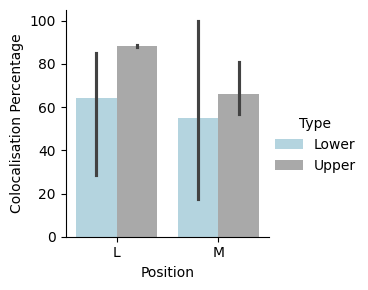

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette (adjust as needed)
custom_palette = {"Upper": "darkgrey", "Lower": "lightblue"}

# Set hue order (Other first, then HC)
#hue_order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(merged_counts_detailed_mmp9,   sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="Colocalisation Percentage", 
    hue="Lumbar_Segment", 
    #hue_order=hue_order, 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
#g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

# Show plot
plt.show()

In [50]:
import pandas as pd
import numpy as np

summary_df = (
    merged_counts_detailed_mmp9
    .groupby(['Position', 'Lumbar_Segment'])['Colocalisation Percentage']
    .agg(['mean', 'sem'])
    .reset_index()
)


In [53]:
summary_df

,Position,Lumbar_Segment,mean,sem
0,L,Lower,64.313710,17.938345
1,L,Upper,88.247236,0.311767
2,M,Lower,54.956427,24.085716
3,M,Upper,66.126281,8.154925


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


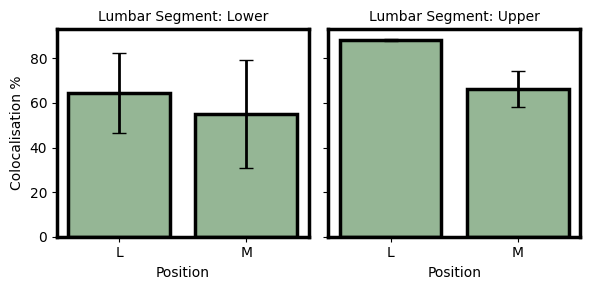

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {"L": "darkseagreen", "M": "darkseagreen"}

g = sns.FacetGrid(
    summary_df,
    col="Lumbar_Segment",
    col_wrap=2,
    sharey=True,
    despine=False
)

g.map_dataframe(
    sns.barplot,
    x="Position",
    y="mean",
    hue="Position",
    palette=custom_palette,
    linewidth=2.5,
    edgecolor="black",
    dodge=False,
    ci=None
)

# Add error bars manually
for ax, (_, group) in zip(g.axes.flat, summary_df.groupby("Lumbar_Segment")):
    positions = group['Position']
    x_coords = range(len(positions))
    errors = group['sem']
    means = group['mean']
    
    ax.errorbar(
        x=x_coords,
        y=means,
        yerr=errors,
        fmt='none',
        ecolor='black',
        elinewidth=2,
        capsize=5
    )

    # Set x-tick labels
    ax.set_xticks(x_coords)
    ax.set_xticklabels(positions)

    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    ax.set_xlabel("Position")
    ax.set_ylabel("Colocalisation %")

g.set_titles("Lumbar Segment: {col_name}")
g.set_axis_labels("Position", "Colocalisation %")
#g.add_legend(title="Position")

plt.tight_layout()
plt.show()


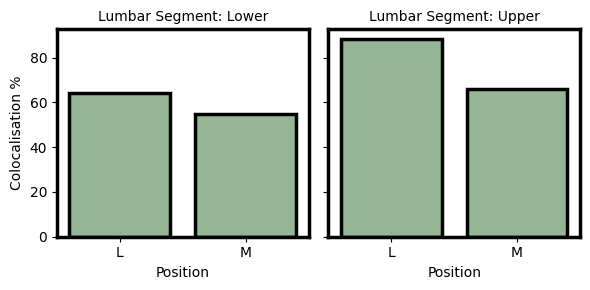

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette similar to second plot
custom_palette = {"L": "darkseagreen", "M": "darkseagreen"}

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(
    merged_counts_detailed_mmp9,
    col="Lumbar_Segment",  # Optional: add col if you want multiple panels
    col_wrap=2,
    sharey=True,
    despine=False
)

# Map the barplot with updated style
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="Colocalisation Percentage", 
    hue="Position",  # match palette use
    palette=custom_palette,
    linewidth=2.5,
    edgecolor="black",
    dodge=False,
    errorbar=('ci', True)  # to match manually handled SE in second plot
)

# Beautify each subplot
for ax in g.axes.flat:
    # Thicker spines
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
    
    ax.set_xlabel("Position")
    ax.set_ylabel("Colocalisation %")

# Set titles and legend
g.set_titles("Lumbar Segment: {col_name}")
#g.add_legend(title="Position")

# Layout and show
plt.tight_layout()
plt.show()


# Colocalisation with MMP9 and VGLUT1

In [158]:
data

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN_Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
0,0.042181,µm^3,Other,1,1001,M,1,Upper,0.850943,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
1,0.070322,µm^3,Other,2,1001,M,1,Upper,1.173010,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
2,0.430202,µm^3,Other,3,1001,M,1,Upper,4.984310,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
3,0.104559,µm^3,Other,4,1001,M,1,Upper,1.519960,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
4,0.093794,µm^3,Other,6,1001,M,1,Upper,1.327620,µm^2,...,1109.687,µm^2,1190.923,µm^3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369560,0.128276,µm^3,Other,29685,1094,L,2,Upper,1.440850,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369561,0.118354,µm^3,Other,29686,1094,L,2,Upper,1.377840,µm^2,...,479.779,µm^2,542.236,µm^3,0,0,0,0,0,1
2369562,0.116735,µm^3,Other,29687,1094,L,2,Upper,1.267910,µm^2,...,1608.070,µm^2,921.522,µm^3,0,0,0,0,0,1
2369563,0.107981,µm^3,Other,29688,1094,L,2,Upper,1.209640,µm^2,...,479.779,µm^2,542.236,µm^3,0,1,0,0,1,0


In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine total number of synapses by synapse subtype **and Position**
TotalRowsByTypPosition = data.groupby(['Type', 'Lumbar_Segment', 'Position']).size()
TotalRowsByTypPosition

Type   Lumbar_Segment  Position
HC     Lower           L              643
                       M               54
       Upper           L              576
                       M              148
Other  Lower           L           650229
                       M           584359
       Upper           L           524257
                       M           609299
dtype: int64

In [175]:
# Calculate percentages of synapses colocalised with VGLUT1 and/or PV for HC and Non-HC synapses **by Position**
onlyVGLUT = (
    data[(data['Colocalisation_VGLUT1'] == 1) & (data['Colocalisation_MMP9'] == 0)]
    .groupby(['Type', 'Lumbar_Segment','Position'])
    .size() / TotalRowsByTypPosition * 100  # Normalize by total count
)


onlyVGLUT.fillna(0, inplace=True)
onlyVGLUT

Type   Lumbar_Segment  Position
HC     Lower           L           15.707621
                       M            5.555556
       Upper           L           19.618056
                       M            6.756757
Other  Lower           L            2.711352
                       M            1.732497
       Upper           L            3.376588
                       M            2.347944
dtype: float64

In [351]:
((10.1+31.4+5.2+28.3) / 4 + (65.9 + 33.33 + 68.5 + 55.4) /4)

74.5325

In [355]:
(10.1+31.4+5.2+28.3 + 65.9 + 33.33 + 68.5 + 55.4) /4

74.5325

In [356]:
( 33.33 + 55.4 + 5.55 + 6.7) /2

50.489999999999995

In [380]:
noVGLUT1 = (
   data[(data['Colocalisation_VGLUT1'] == 0)]
    .groupby(['Type',  'Lumbar_Segment', 'Position'])
    .size() / TotalRowsByTypPosition * 100
)
noVGLUT1.fillna(0, inplace=True)
noVGLUT1

Type   Lumbar_Segment  Position
HC     Lower           L           18.351477
                       M           61.111111
       Upper           L           11.805556
                       M           37.837838
Other  Lower           L           94.861349
                       M           96.376029
       Upper           L           94.064171
                       M           96.229109
dtype: float64

In [382]:
(61.111111 + 37.837838)/2

49.4744745

In [383]:
(18.351477+11.805556)/2

15.0785165

In [176]:
onlyMMP9 = (
   data[(data['Colocalisation_MMP9'] == 1) & (data['Colocalisation_VGLUT1'] == 0)]
    .groupby(['Type',  'Lumbar_Segment', 'Position'])
    .size() / TotalRowsByTypPosition * 100
)
onlyMMP9.fillna(0, inplace=True)
onlyMMP9

Type   Lumbar_Segment  Position
HC     Lower           L           10.108865
                       M           31.481481
       Upper           L            5.208333
                       M           28.378378
Other  Lower           L           34.662557
                       M           34.970797
       Upper           L           27.248086
                       M           31.170246
dtype: float64

In [177]:
VGLUTandMMP9 = (
    data[(data['Colocalisation_VGLUT1'] == 1) & (data['Colocalisation_MMP9'] == 1)]
    .groupby(['Type', 'Lumbar_Segment', 'Position', 'Lumbar_Segment'])
    .size() / TotalRowsByTypPosition * 100
)
VGLUTandMMP9.fillna(0, inplace=True)
VGLUTandMMP9

Type   Lumbar_Segment  Position
HC     Lower           L           65.940902
                       M           33.333333
       Upper           L           68.576389
                       M           55.405405
Other  Lower           L            2.427299
                       M            1.891474
       Upper           L            2.559241
                       M            1.422947
dtype: float64

In [181]:
# Determine percentage of synapses **not** colocalised with PV and/or VGLUT1
NoColocalisation = 100 - (onlyVGLUT + onlyMMP9 + VGLUTandMMP9)
NoColocalisation

Type   Lumbar_Segment  Position
HC     Lower           L            8.242613
                       M           29.629630
       Upper           L            6.597222
                       M            9.459459
Other  Lower           L           60.198792
                       M           61.405232
       Upper           L           66.816084
                       M           65.058863
dtype: float64

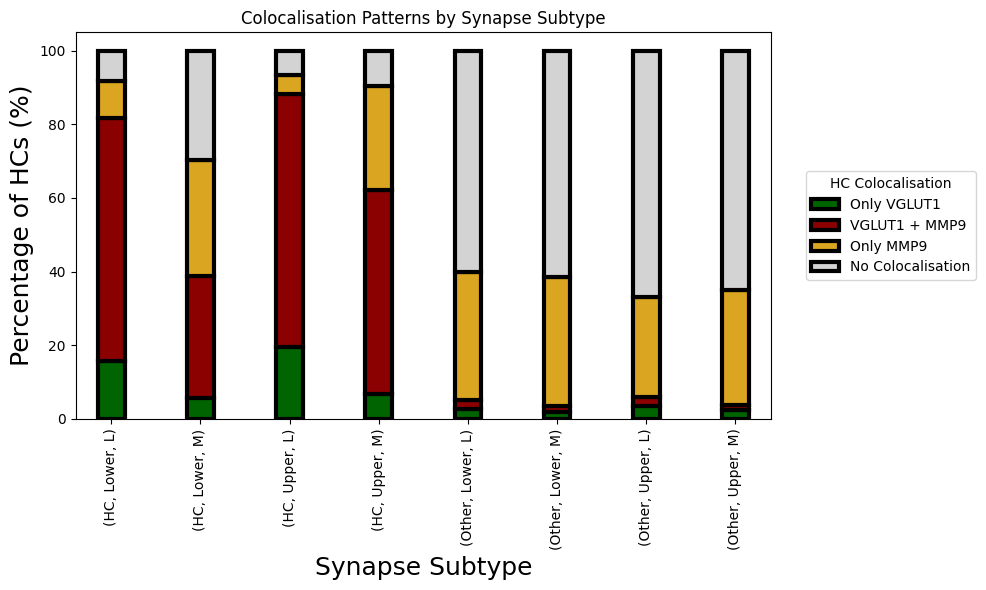

In [180]:
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
#PlottingData = pd.DataFrame({
    #'Only VGLUT1': onlyVGLUT, 
    #'Only MMP9': onlyMMP9,
    #'VGLUT1 + MMP9': VGLUTandMMP9,
   # 'No Colocalisation': NoColocalisation
#}).reset_index()


# Create a DataFrame for plotting
PlottingData = pd.DataFrame({
    'Only VGLUT1': onlyVGLUT,
    'VGLUT1 + MMP9': VGLUTandMMP9,
    'Only MMP9': onlyMMP9,
    'No Colocalisation': NoColocalisation
}).reset_index()

# Adjust figure size for extra space for legend
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar graph
PlottingData.set_index(['Type', 'Lumbar_Segment', 'Position',]).plot(
    kind='bar', 
    stacked=True, 
    ax=ax,
    width=0.3,
    color=['darkgreen', 'darkred', 'goldenrod', 'lightgrey'],
    edgecolor='black',
    linewidth=3
)

# Adjust labels and title
plt.title("Colocalisation Patterns by Synapse Subtype")
plt.ylabel("Percentage of HCs (%)", fontsize=18)
plt.xlabel("Synapse Subtype", fontsize=18)

# Move legend outside the plot (to the right)
plt.legend(
    title="HC Colocalisation",
    bbox_to_anchor=(1.05, 0.5),  # (x, y) - Moves legend outside plot
    loc='center left',            # Aligns legend to the left of bbox
    borderaxespad=0               # Removes extra padding
)

# Adjust layout so everything fits
plt.tight_layout()

# Show plot
plt.show()

In [642]:
hc_vglut = data[(data["Type"] == "HC") & (data["Colocalisation_VGLUT1"] == "Yes")]

In [643]:
hc_vglut

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,Distance to MMP9,Distance to MN,Distance Unit_y,MN ID,MN Area,MN Area Unit,MN Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation MMP9
15169,3.709070,µm^3,HC,27697,1001,M,1,Upper,31.59650,µm^2,...,0.00000,0.00000,µm,MN F,2413.150,µm^2,2487.290,µm^3,Yes,Yes
15768,1.489430,µm^3,HC,28722,1001,M,1,Upper,14.18870,µm^2,...,0.00000,0.00000,µm,MN F,2413.150,µm^2,2487.290,µm^3,Yes,Yes
59740,4.428090,µm^3,HC,15921,1003,L,1,Upper,29.54010,µm^2,...,30.10360,30.10360,µm,MN E,1595.755,µm^2,1358.522,µm^3,Yes,No
69469,2.264950,µm^3,HC,37596,1003,L,1,Upper,19.14770,µm^2,...,0.00000,0.00000,µm,MN A,756.690,µm^2,688.760,µm^3,Yes,Yes
86026,4.973700,µm^3,HC,16582,1004,M,1,Upper,37.36090,µm^2,...,0.00000,0.00000,µm,MN B,2096.770,µm^2,2444.810,µm^3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365532,0.816079,µm^3,HC,23463,1094,L,2,Upper,7.09212,µm^2,...,5.62201,30.11000,µm,MN F,479.779,µm^2,542.236,µm^3,Yes,No
2365871,1.527900,µm^3,HC,24060,1094,L,2,Upper,11.48310,µm^2,...,0.00000,6.74650,µm,MN G,1608.070,µm^2,921.522,µm^3,Yes,Yes
2365958,0.840816,µm^3,HC,24196,1094,L,2,Upper,9.46901,µm^2,...,5.13627,23.47740,µm,MN F,479.779,µm^2,542.236,µm^3,Yes,No
2365987,0.903467,µm^3,HC,24245,1094,L,2,Upper,7.14795,µm^2,...,3.18759,6.49419,µm,MN G,1608.070,µm^2,921.522,µm^3,Yes,No


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {"M": "darkgrey", "L": "lightblue"}  

# Define order of categories
order = ["M", "L"]

# Create the barplot
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=merged_counts_mmp9,
    x="Colocalisation VGLUT1",
    y="Colocalisation Percentage",
    hue="Position",
    palette=custom_palette, order = order
)

# Adjust aesthetics
plt.title("HC Colocalisation Percentage with PV by Position")
plt.xlabel("Position")
plt.ylabel("Colocalisation Percentage")
#plt.legend(title="Type")

# Show plot
plt.show()

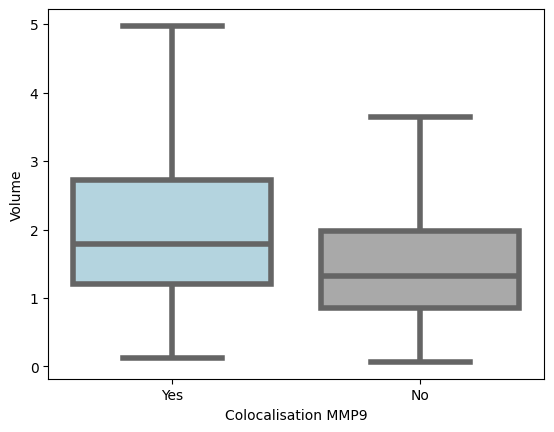

In [644]:
custom_palette = {"No": "darkgrey", "Yes": "lightblue"}  # Adjust colors based on your data

# Set categorical order (Other first, then HC)
#order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment

# Map the boxplot with the custom color palette
plot = sns.boxplot(hc_vglut, x="Colocalisation MMP9", y="Volume", hue="Colocalisation MMP9", palette=custom_palette,  linewidth = 4, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Colocalisation_VGLUT1")

plt.show()

# by MN

## determining correlations

### subsetting data

In [308]:
ColocMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal
0,1001,MN A,M,Upper,3159,0,3159,287,2872,0,287,0,2872,2850.969,2783.454,1
1,1001,MN B,M,Upper,1639,0,1639,163,1476,0,163,0,1476,1210.523,1022.167,1
2,1001,MN C,M,Upper,1887,0,1887,217,1670,0,217,0,1670,1543.300,1849.940,1
3,1001,MN D,M,Upper,7408,0,7408,157,7251,0,157,0,7251,1109.687,1190.923,1
4,1001,MN E,M,Upper,3409,0,3409,74,3335,0,74,0,3335,531.328,599.755,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522,2
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439,2
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110,2
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540,2


In [309]:
colocalisedMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal,log_HC
5,1001,MN F,M,Upper,6310,2,6308,238,6072,2,236,0,6072,2413.150,2487.290,1,1.098612
10,1003,MN A,L,Upper,6754,1,6753,153,6601,1,152,0,6601,756.690,688.760,1,0.693147
16,1004,MN B,M,Upper,10907,1,10906,492,10415,1,491,0,10415,2096.770,2444.810,1,0.693147
17,1004,MN C,M,Upper,5725,1,5724,413,5312,1,412,0,5312,3256.500,3694.120,1,0.693147
20,1005,MN A,M,Upper,13868,4,13864,1091,12777,4,1087,0,12777,8235.154,7999.836,1,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522,2,0.693147
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439,2,0.693147
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110,2,1.609438
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540,2,1.386294


In [310]:
average_value = colocalisedMN['Colocalised_HC'].mean()
print(f"Average Colocalised HC: {average_value:.2f}")


Average Colocalised HC: 3.24


In [86]:
colocalisedMN = ColocMN[ColocMN["Colocalised_HC"] > 0]

upperM = ColocMN[(ColocMN["Lumbar_Segment"] == "Upper") & 
                                (ColocMN["Position"] == "M") & ColocMN["Colocalised_HC"] > 0]

upperL = ColocMN[(ColocMN["Lumbar_Segment"] == "Upper") & 
                                (ColocMN["Position"] == "L")& ColocMN["Colocalised_HC"] > 0]

lowerM = ColocMN[(ColocMN["Lumbar_Segment"] == "Lower") & 
                                (ColocMN["Position"] == "M")& ColocMN["Colocalised_HC"] > 0]

lowerL = ColocMN[(ColocMN["Lumbar_Segment"] == "Lower") & 
                                (ColocMN["Position"] == "L")& ColocMN["Colocalised_HC"] > 0]


In [112]:
colocalisedMN = ColocMN[ColocMN["Colocalised_HC"] > 0]

upperM = colocalisedMN[(colocalisedMN["Lumbar Segment"] == "Upper") & 
                                (colocalisedMN["Position"] == "M")]

upperL = colocalisedMN[(colocalisedMN["Lumbar Segment"] == "Upper") & 
                                (colocalisedMN["Position"] == "L")]

lowerM = colocalisedMN[(colocalisedMN["Lumbar Segment"] == "Lower") & 
                                (colocalisedMN["Position"] == "M")]

lowerL = colocalisedMN[(colocalisedMN["Lumbar Segment"] == "Lower") & 
                                (colocalisedMN["Position"] == "L")]

In [74]:
colocalisedMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal
5,1001,MN F,M,Upper,6310,2,6308,238,6072,2,236,0,6072,2413.150,2487.290,1
10,1003,MN A,L,Upper,6754,1,6753,153,6601,1,152,0,6601,756.690,688.760,1
16,1004,MN B,M,Upper,10907,1,10906,492,10415,1,491,0,10415,2096.770,2444.810,1
17,1004,MN C,M,Upper,5725,1,5724,413,5312,1,412,0,5312,3256.500,3694.120,1
20,1005,MN A,M,Upper,13868,4,13864,1091,12777,4,1087,0,12777,8235.154,7999.836,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522,2
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439,2
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110,2
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540,2


# computing Colocalised HC/Other correlated to MN volume (only if at least one HC)

## mixed model - appropriate

In [75]:
colocalisedMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal
5,1001,MN F,M,Upper,6310,2,6308,238,6072,2,236,0,6072,2413.150,2487.290,1
10,1003,MN A,L,Upper,6754,1,6753,153,6601,1,152,0,6601,756.690,688.760,1
16,1004,MN B,M,Upper,10907,1,10906,492,10415,1,491,0,10415,2096.770,2444.810,1
17,1004,MN C,M,Upper,5725,1,5724,413,5312,1,412,0,5312,3256.500,3694.120,1
20,1005,MN A,M,Upper,13868,4,13864,1091,12777,4,1087,0,12777,8235.154,7999.836,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522,2
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439,2
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110,2
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540,2


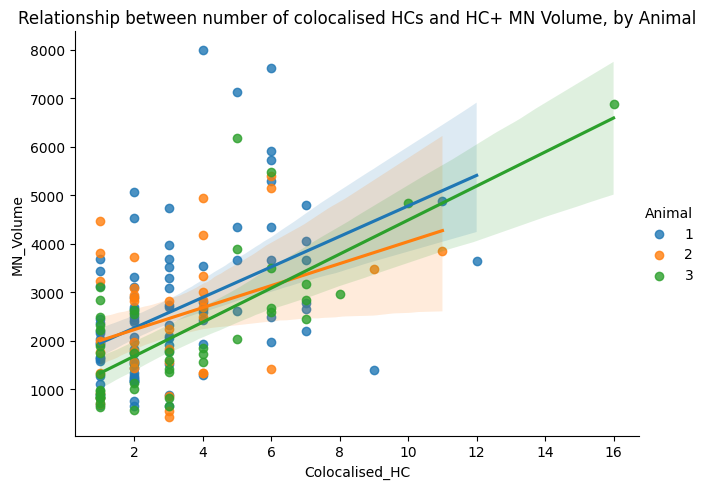

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of all data points, color-coded by Animal
sns.lmplot(
    data=colocalisedMN,
    x='Colocalised_HC',
    y='MN_Volume',
    hue='Animal',          # Color by animal
    markers='o',
    fit_reg=True,          # Optional: remove if you don’t want a trend line
    legend=True,
    aspect=1.2
)

plt.title("Relationship between number of colocalised HCs and HC+ MN Volume, by Animal")
plt.tight_layout()
plt.show()


/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_76955/896750927.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colocalisedMN['Animal'] = colocalisedMN['Animal'].astype(str)


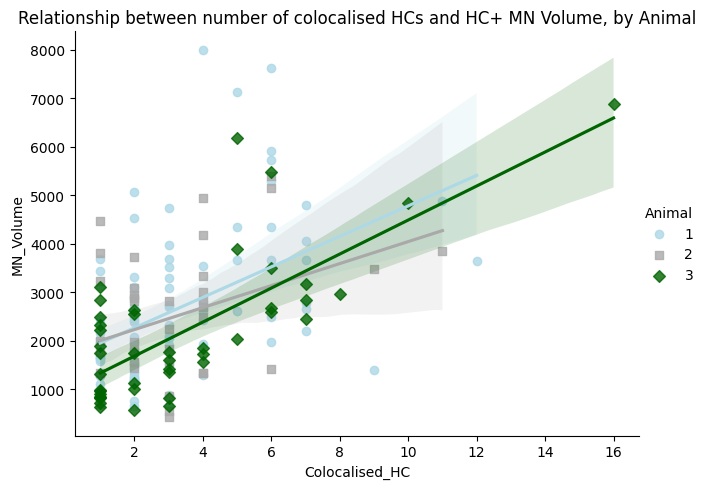

In [80]:
# could use
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors and markers for each animal
custom_palette = {
    '1': 'lightblue',  # blue
    '2': 'darkgrey',  # orange
    '3': 'darkgreen'   # green
}

custom_markers = ['o', 's', 'D']  # circle, square, diamond

# Make sure Animal is string for matching
colocalisedMN['Animal'] = colocalisedMN['Animal'].astype(str)

sns.lmplot(
    data=colocalisedMN,
    x='Colocalised_HC',
    y='MN_Volume',
    hue='Animal',
    palette=custom_palette,
    markers=custom_markers,
    fit_reg=True,
    legend=True,
    aspect=1.2
)

plt.title("Relationship between number of colocalised HCs and HC+ MN Volume, by Animal")
plt.tight_layout()
plt.show()


/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_76955/2388596159.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colocalisedMN['Animal'] = colocalisedMN['Animal'].astype(str)


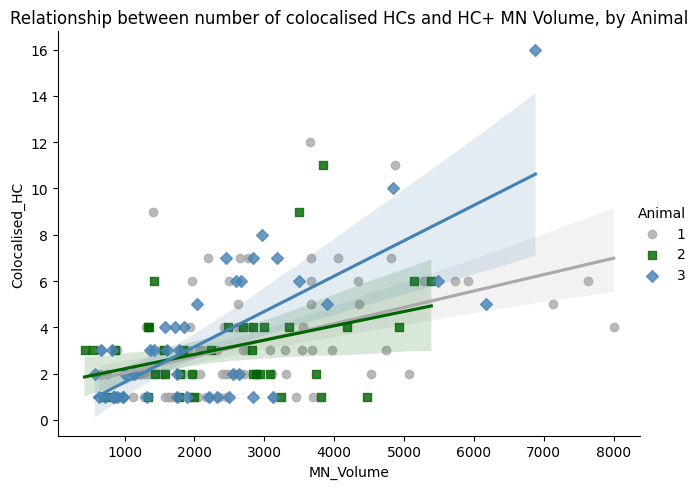

In [275]:
# dont use just yet - axis flipped
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors and markers for each animal
custom_palette = {
    '1': 'darkgrey',  # blue
    '2': 'darkgreen',  # orange
    '3': 'steelblue'   # green
}

custom_markers = ['o', 's', 'D']  # circle, square, diamond

# Make sure Animal is string for matching
colocalisedMN['Animal'] = colocalisedMN['Animal'].astype(str)

sns.lmplot(
    data=colocalisedMN,
    x='MN_Volume',
    y='Colocalised_HC',
    hue='Animal',
    palette=custom_palette,
    markers=custom_markers,
    fit_reg=True,
    legend=True,
    aspect=1.2
)

plt.title("Relationship between number of colocalised HCs and HC+ MN Volume, by Animal")
plt.tight_layout()
plt.show()

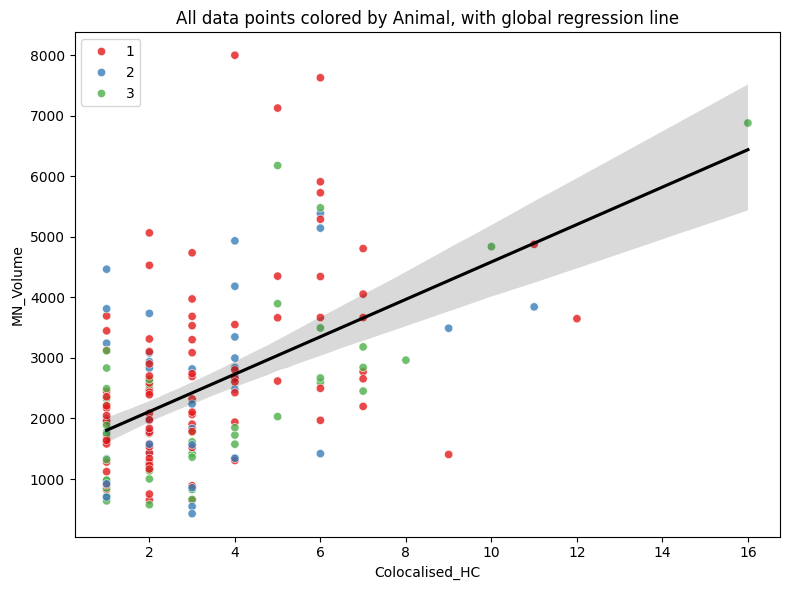

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot colored by animal
sns.scatterplot(
    data=colocalisedMN,
    x='Colocalised_HC',
    y='MN_Volume',
    hue='Animal',
    palette='Set1',
    alpha=0.8
)

# One global regression line (no hue)
sns.regplot(
    data=colocalisedMN,
    x='Colocalised_HC',
    y='MN_Volume',
    scatter=False,
    color='black',
    line_kws={'label': 'Global trend'}
)

plt.legend()
plt.title("All data points colored by Animal, with global regression line")
plt.tight_layout()
plt.show()

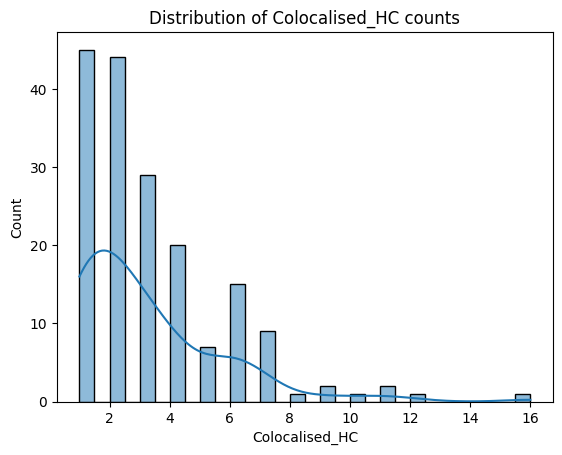

In [84]:
# checking if data is skewed - yes it is! therefore log transformation of HC count data is appropriate
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(colocalisedMN['Colocalised_HC'], kde=True, bins=30)
plt.title("Distribution of Colocalised_HC counts")
plt.xlabel("Colocalised_HC")
plt.show()


In [325]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Poisson

# Optional: Standardize MN_Volume for numerical stability
#colocalisedMN['MN_Volume_z'] = (colocalisedMN['MN_Volume'] - colocalisedMN['MN_Volume'].mean()) / colocalisedMN['MN_Volume'].std()

# Define response and predictor
y = colocalisedMN['Colocalised_HC']
X = sm.add_constant(colocalisedMN['MN_Volume'])  # Use standardized version

# Fit Poisson regression with clustered standard errors (by Animal)
poisson_model = Poisson(y, X).fit(
    cov_type='cluster',
    cov_kwds={'groups': colocalisedMN['Animal']}
)

# Print summary
print(poisson_model.summary())


Optimization terminated successfully.
         Current function value: 1.988827
         Iterations 11
                          Poisson Regression Results                          
Dep. Variable:         Colocalised_HC   No. Observations:                  177
Model:                        Poisson   Df Residuals:                      175
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Mar 2025   Pseudo R-squ.:                 0.09882
Time:                        18:05:01   Log-Likelihood:                -352.02
converged:                       True   LL-Null:                       -390.63
Covariance Type:              cluster   LLR p-value:                 1.541e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5663      0.079      7.166      0.000       0.411       0.721
MN_Volume      0.0002   4.29

In [311]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families import NegativeBinomial

# Fit a GLM with Negative Binomial family, clustered SEs by Animal
nb_model = smf.glm(
    formula="Colocalised_HC ~ MN_Volume",
    data=colocalisedMN,
    family=NegativeBinomial()
).fit(cov_type='cluster', cov_kwds={'groups': colocalisedMN['Animal']})

print(nb_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:         Colocalised_HC   No. Observations:                  177
Model:                            GLM   Df Residuals:                      175
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -401.08
Date:                Sat, 29 Mar 2025   Deviance:                       46.166
Time:                        17:48:22   Pearson chi2:                     50.4
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09682
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5024      0.079      6.352      0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [82]:
import numpy as np
colocalisedMN['log_HC'] = np.log1p(colocalisedMN['Colocalised_HC'])  # log(1 + x)

model = smf.mixedlm(
    formula="MN_Volume ~ log_HC",
    data=colocalisedMN,
    groups=colocalisedMN['Animal']
).fit()

print(model.summary())


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: MN_Volume   
No. Observations: 177     Method:             REML        
No. Groups:       3       Scale:              1569852.0161
Min. group size:  39      Log-Likelihood:     -1501.7527  
Max. group size:  94      Converged:          Yes         
Mean group size:  59.0                                    
----------------------------------------------------------
            Coef.   Std.Err.   z   P>|z|  [0.025   0.975] 
----------------------------------------------------------
Intercept   520.810  281.722 1.849 0.065  -31.354 1072.974
log_HC     1486.635  187.474 7.930 0.000 1119.193 1854.076
Group Var 26108.975   42.594                              



/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_76955/495303438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colocalisedMN['log_HC'] = np.log1p(colocalisedMN['Colocalised_HC'])  # log(1 + x)


## Pearson's correlation - not appropriate bc not independent samples

In [115]:
# Compute overall correlation
correlationvolumeall = colocalisedMN["Colocalised_HC"].corr(colocalisedMN["MN_Volume"], method="pearson")
print(f"Pearson Correlation: {correlationvolumeall:.4f}")


Pearson Correlation: 0.5196


In [124]:
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value - overall
r, p = pearsonr(colocalisedMN["MN_Volume"], colocalisedMN["Colocalised_HC"])

print(f"Pearson r = {r:.4f}, p = {p:.20f}")


Pearson r = 0.5196, p = 0.00000000000012511638


In [116]:
# Compute upper, medial correlation
correlationvolumeupperM = upperM["Colocalised_HC"].corr(upperM["MN_Volume"], method="pearson")
print(f"Pearson Correlation: {correlationvolumeupperM:.4f}")

Pearson Correlation: 0.4817


In [125]:
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value - upper, medial
r, p = pearsonr(upperM["MN_Volume"], upperM["Colocalised_HC"])

print(f"Pearson r = {r:.4f}, p = {p:.20f}")


Pearson r = 0.4817, p = 0.02319470762827988142


In [117]:
# Compute correlation
correlationvolumeupperL = upperL["Colocalised_HC"].corr(upperL["MN_Volume"], method="pearson")
print(f"Pearson Correlation: {correlationvolumeupperL:.4f}")

Pearson Correlation: 0.4807


In [126]:
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value - upper, lateral
r, p = pearsonr(upperL["MN_Volume"], upperL["Colocalised_HC"])

print(f"Pearson r = {r:.4f}, p = {p:.20f}")

Pearson r = 0.4807, p = 0.00002534988807713244


In [118]:
# Compute correlation
correlationvolumelowerM = lowerM["Colocalised_HC"].corr(lowerM["MN_Volume"], method="pearson")
print(f"Pearson Correlation: {correlationvolumelowerM:.4f}")

Pearson Correlation: 0.9705


In [127]:
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value - lower, medial
r, p = pearsonr(lowerM["MN_Volume"], lowerM["Colocalised_HC"])

print(f"Pearson r = {r:.4f}, p = {p:.20f}")

Pearson r = 0.9705, p = 0.02948107283948075974


In [119]:
# Compute correlation
correlationvolumelowerL = lowerL["Colocalised_HC"].corr(lowerL["MN_Volume"], method="pearson")
print(f"Pearson Correlation: {correlationvolumelowerL:.4f}")

Pearson Correlation: 0.5996


In [130]:
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value - lower, lateral
r, p = pearsonr(lowerL["MN_Volume"], lowerL["Colocalised_HC"])

print(f"Pearson r = {r:.4f}, p = {p:.20f}")

Pearson r = 0.5996, p = 0.00000000332591255690


### plotting correlations

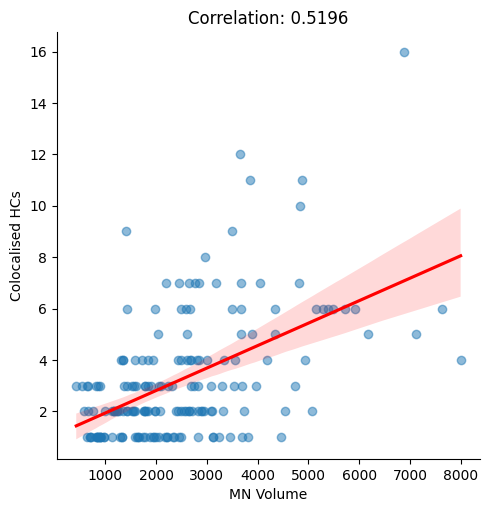

In [120]:
#overall
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x="MN_Volume", y="Colocalised_HC", data=colocalisedMN, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title(f"Correlation: {correlationvolumeall:.4f}")
plt.xlabel("MN Volume")
plt.ylabel("Colocalised HCs")
plt.show()

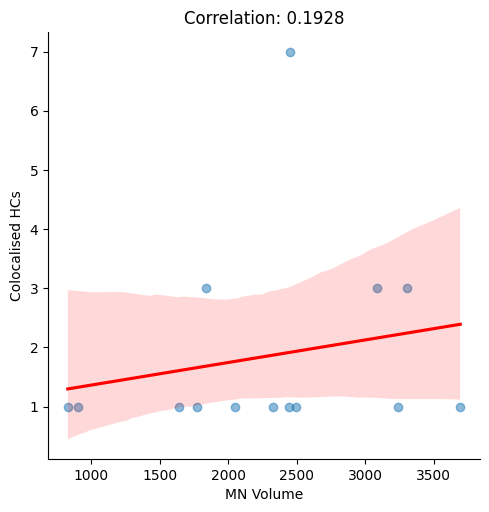

In [476]:
# upper, medial
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x="MN_Volume", y="Colocalised_HC", data= upperM, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title(f"Correlation: {correlationvolumeupperM:.4f}")
plt.xlabel("MN Volume")
plt.ylabel("Colocalised HCs")
plt.show()

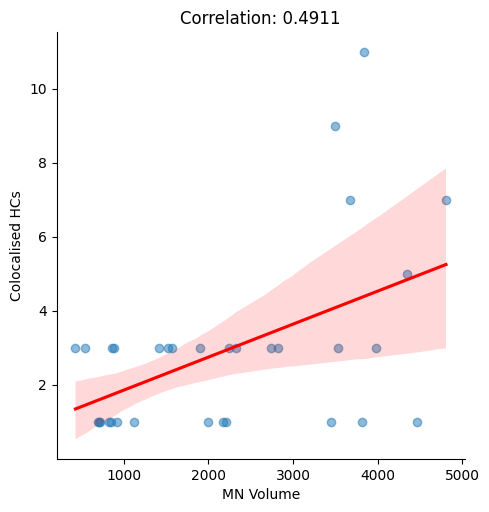

In [477]:
# upper, lateral
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x="MN_Volume", y="Colocalised_HC", data= upperL, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title(f"Correlation: {correlationvolumeupperL:.4f}")
plt.xlabel("MN Volume")
plt.ylabel("Colocalised HCs")
plt.show()

In [481]:
lowerM

,Image ID,MN ID,Position,Lumbar Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume
188,1047,MN A,M,Lower,30200,9,30191,1273,28927,5,1268,4,28923,5934.49,7127.540
249,1064,MN A,M,Lower,13687,12,13675,344,13343,3,341,9,13334,3070.12,2692.180
250,1064,MN B,M,Lower,6290,4,6286,61,6229,1,60,3,6226,1173.29,829.444


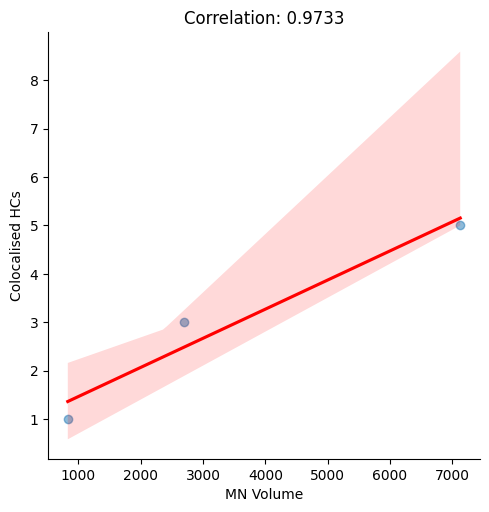

In [479]:
#lower, medial
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x="MN_Volume", y="Colocalised_HC", data= lowerM, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title(f"Correlation: {correlationvolumelowerM:.4f}")
plt.xlabel("MN Volume")
plt.ylabel("Colocalised HCs")
plt.show()

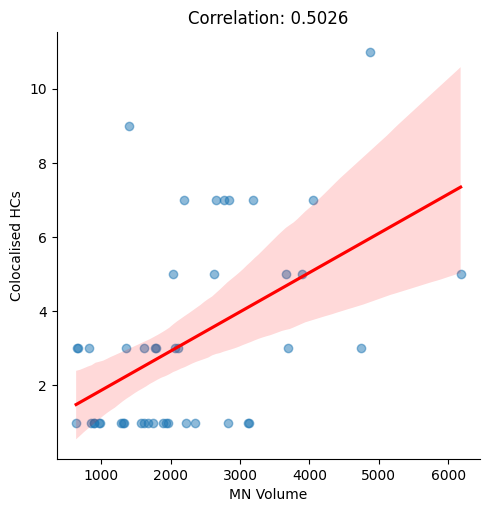

In [482]:
#lower, lateral
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x="MN_Volume", y="Colocalised_HC", data= lowerL, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title(f"Correlation: {correlationvolumelowerL:.4f}")
plt.xlabel("MN Volume")
plt.ylabel("Colocalised HCs")
plt.show()

## plotting correlation of HC size and MN size (only if at least 1 correlated HC) - not applicable

In [115]:
hc_data_colocalised_to_MN = hc_data[hc_data["Distance to MN"] <= 2]

In [116]:
hc_data_colocalised_to_MN

,Volume,Volume Unit,Type,ID,Image ID,Position,Animal,Lumbar_Segment,Area,Area Unit,...,MN Area,MN Area Unit,MN_Volume,MN Volume Unit,Colocalisation_VGLUT1,Colocalisation_MMP9,Colocalisation_only_VGLUT,Colocalisation_VGLUT1_and_MMP9,Colocalisation_only_MMP9,No_Colocalisation
15169,3.70907,µm^3,HC,27697,1001,M,1,Upper,31.59650,µm^2,...,2413.150,µm^2,2487.290,µm^3,1,1,0,1,0,0
15768,1.48943,µm^3,HC,28722,1001,M,1,Upper,14.18870,µm^2,...,2413.150,µm^2,2487.290,µm^3,1,1,0,1,0,0
69469,2.26495,µm^3,HC,37596,1003,L,1,Upper,19.14770,µm^2,...,756.690,µm^2,688.760,µm^3,1,1,0,1,0,0
86026,4.97370,µm^3,HC,16582,1004,M,1,Upper,37.36090,µm^2,...,2096.770,µm^2,2444.810,µm^3,1,1,0,1,0,0
100440,6.84999,µm^3,HC,44944,1004,M,1,Upper,37.63980,µm^2,...,3256.500,µm^2,3694.120,µm^3,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360806,1.31541,µm^3,HC,15288,1094,L,2,Upper,12.66730,µm^2,...,909.984,µm^2,546.599,µm^3,1,1,0,1,0,0
2361031,3.35858,µm^3,HC,15657,1094,L,2,Upper,20.33510,µm^2,...,1292.310,µm^2,856.379,µm^3,1,1,0,1,0,0
2364642,1.65552,µm^3,HC,21954,1094,L,2,Upper,10.13830,µm^2,...,1483.570,µm^2,1564.540,µm^3,1,1,0,1,0,0
2364670,1.19278,µm^3,HC,22005,1094,L,2,Upper,8.10061,µm^2,...,1608.070,µm^2,921.522,µm^3,1,1,0,1,0,0


In [173]:

hc_l = hc_data_colocalised_to_MN[(hc_data_colocalised_to_MN["Position"] == "L") ]

In [174]:
hc_m = hc_data_colocalised_to_MN[(hc_data_colocalised_to_MN["Position"] == "M") ]

In [ ]:
hc_data_colocalised_to_MN

In [ ]:
hc_l

In [ ]:
hc_m

In [ ]:
hc_data

In [ ]:
hc_data_colocalised_to_MN

# testing mixed linear model (does MN Volume predict HC Volume) - Pearsons not appropriate bc repeated measures

In [345]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    formula="Volume ~ MN_Volume",
    data=hc_data_colocalised_to_MN,
    groups=hc_data_colocalised_to_MN["Animal"]
).fit()

print(model.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Volume   
No. Observations: 574     Method:             REML     
No. Groups:       3       Scale:              1.6906   
Min. group size:  122     Log-Likelihood:     -978.4181
Max. group size:  300     Converged:          Yes      
Mean group size:  191.3                                
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  1.944     0.259  7.492  0.000   1.435   2.452
MN_Volume  0.000     0.000  1.633  0.102  -0.000   0.000
Group Var  0.162     0.121                              



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


In [347]:
# Get the exact beta value (not in scientific notation)
beta = model.params['MN_Volume']
print(f"Exact β for MN_Volume: {beta:.10f}")


Exact β for MN_Volume: 0.0000536906


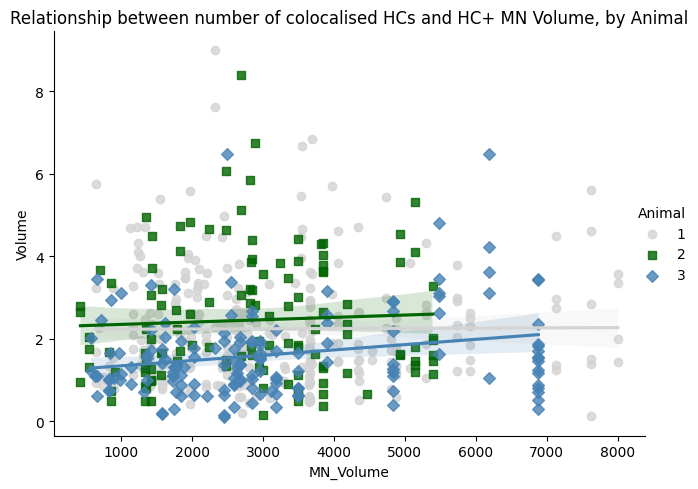

In [301]:
# dont use just yet - axis flipped
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors and markers for each animal
custom_palette = {
    '1': 'lightgrey',  # blue
    '2': 'darkgreen',  # orange
    '3': 'steelblue'   # green
}

custom_markers = ['o', 's', 'D']  # circle, square, diamond

# Make sure Animal is string for matching
#hc_data_colocalised_to_MN['Animal'] = hc_data_colocalised_to_MN['Animal'].astype(str)

sns.lmplot(
    data=hc_data_colocalised_to_MN,
    x='MN_Volume',
    y='Volume',
    hue='Animal',
    palette=custom_palette,
    markers=custom_markers,
    fit_reg=True,
    legend=True,
    aspect=1.2
)

plt.title("Relationship between number of colocalised HCs and HC+ MN Volume, by Animal")
plt.tight_layout()
plt.show()

# pearsons correlation not applicable bc of repeated measures

In [179]:
# Compute overall correlation
correlationhcvolumeall = hc_data_colocalised_to_MN["Volume"].corr(hc_data_colocalised_to_MN["MN Volume"], method="pearson")
print(f"Pearson Correlation: {correlationhcvolumeall:.4f}")


Pearson Correlation: 0.0579


In [181]:
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value - overall
r, p = pearsonr(hc_data_colocalised_to_MN["Volume"], hc_data_colocalised_to_MN["MN Volume"])

print(f"Pearson r = {r:.4f}, p = {p:.20f}")

Pearson r = 0.0579, p = 0.16576289463105886579


In [619]:
# Compute correlation only lateral
correlationhcvolumelateral = hc_l["Volume"].corr(hc_l["MN Volume"], method="pearson")
print(f"Pearson Correlation: {correlationhcvolumelateral:.4f}")


Pearson Correlation: 0.0448


In [622]:
# Compute correlation only medial
correlationhcvolumemedial = hc_m["Volume"].corr(hc_m["MN Volume"], method="pearson")
print(f"Pearson Correlation: {correlationhcvolumemedial:.4f}")

Pearson Correlation: 0.0943


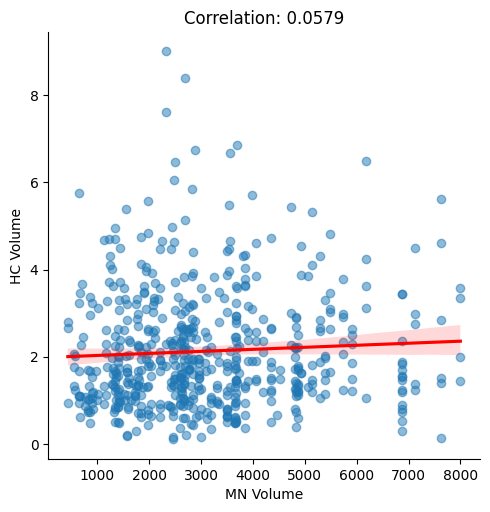

In [605]:
#overall
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x="MN Volume", y="Volume", data=hc_data_colocalised_to_MN, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title(f"Correlation: {correlationhcvolumeall:.4f}")
plt.xlabel("MN Volume")
plt.ylabel("HC Volume")
plt.show()

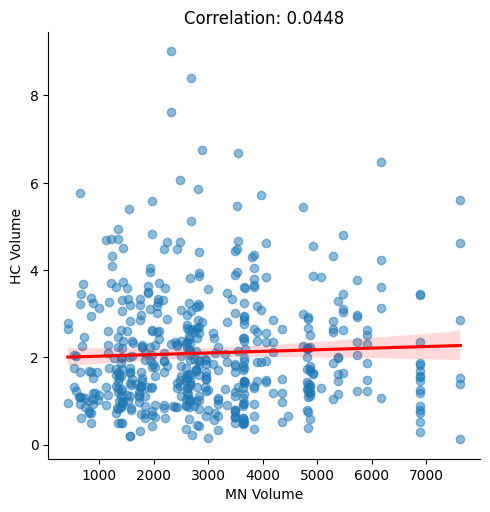

In [623]:
#plotting correlation lateral
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x="MN Volume", y="Volume", data=hc_l, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title(f"Correlation: {correlationhcvolumelateral:.4f}")
plt.xlabel("MN Volume")
plt.ylabel("HC Volume")
plt.show()

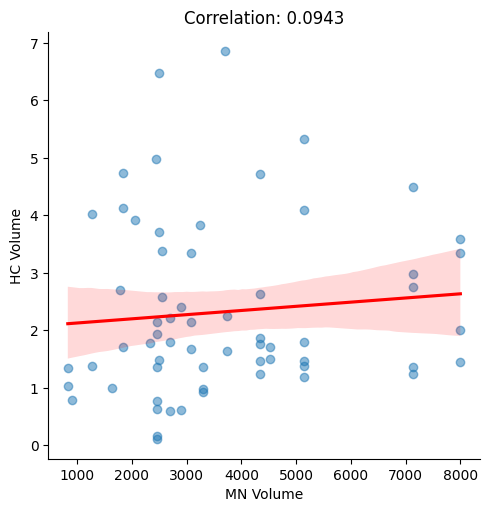

In [625]:
#overall
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x="MN Volume", y="Volume", data=hc_m, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title(f"Correlation: {correlationhcvolumemedial:.4f}")
plt.xlabel("MN Volume")
plt.ylabel("HC Volume")
plt.show()

# percentage of MNs with HC

In [228]:
check = (
    MN
    .groupby(['Animal', 'Position', 'Lumbar_Segment'])['MNs_with_Colocalised_HC']
    .mean()
    .reset_index()
)

check['Percentage'] = check['MNs_with_Colocalised_HC'] * 100

check.sort_values(['Position', 'Lumbar_Segment'])


,Animal,Position,Lumbar_Segment,MNs_with_Colocalised_HC,Percentage
0,1,L,Lower,0.723077,72.307692
4,2,L,Lower,0.142857,14.285714
8,3,L,Lower,0.711111,71.111111
1,1,L,Upper,0.607843,60.784314
5,2,L,Upper,0.780488,78.048780
9,3,L,Upper,0.411765,41.176471
2,1,M,Lower,0.222222,22.222222
6,2,M,Lower,0.000000,0.000000
10,3,M,Lower,0.000000,0.000000
3,1,M,Upper,0.179104,17.910448


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


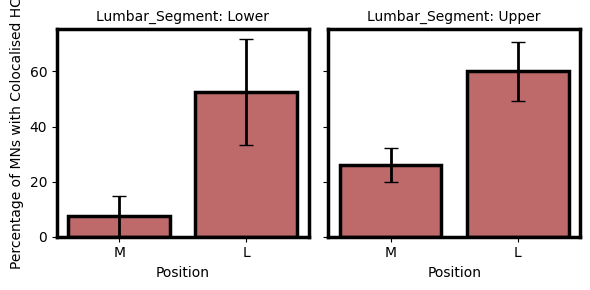

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Calculate % per Animal × Position × Lumbar Segment
grouped = (
    MN
    .groupby(['Animal', 'Position', 'Lumbar_Segment'])['MNs_with_Colocalised_HC']
    .mean()
    .reset_index()
)

# Convert to percentage
grouped['Percentage_MNs_with_Colocalised_HC'] = grouped['MNs_with_Colocalised_HC'] * 100

# STEP 2: Aggregate across animals to get mean ± SE
summary_df = (
    grouped
    .groupby(['Position', 'Lumbar_Segment'])['Percentage_MNs_with_Colocalised_HC']
    .agg(mean='mean', sem='sem')
    .reset_index()
)

# Sort positions
summary_df['Position'] = pd.Categorical(summary_df['Position'], categories=['M', 'L'], ordered=True)
summary_df = summary_df.sort_values(['Lumbar_Segment', 'Position'])

# STEP 3: Plot in matching style
custom_palette = {"M": "indianred", "L": "indianred"}

g = sns.FacetGrid(
    summary_df,
    col="Lumbar_Segment",
    col_wrap=2,
    sharey=True,
    despine=False
)

# Plot bars (height = mean, error bars = SE)
g.map_dataframe(
    sns.barplot,
    x="Position",
    y="mean",
    hue="Position",
    palette=custom_palette,
    linewidth=2.5,
    edgecolor="black",
    dodge=False,
    ci=None
)

bar_width = 0.2

# Add error bars manually
for ax, (_, group) in zip(g.axes.flat, summary_df.groupby("Lumbar_Segment")):
    positions = group['Position']
    x_coords = np.arange(len(positions))
    errors = group['sem']
    means = group['mean']
    ax.errorbar(
        x=x_coords,
        y=means,
        yerr=errors,
        fmt='none',
        ecolor='black',
        elinewidth=2,
        capsize=5
    )
    
    # Set tick labels
    ax.set_xticks(x_coords)
    ax.set_xticklabels(positions)

    # Add thick outer border
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    ax.set_xlabel("Position")
    ax.set_ylabel("Percentage of MNs with Colocalised HC")

# Final formatting
g.set_titles("Lumbar_Segment: {col_name}")
g.set_axis_labels("Position", "Percentage of MNs with Colocalised HC")
#g.add_legend(title="Position")

plt.tight_layout()
plt.show()


In [226]:
summary_df

,Position,Lumbar_Segment,mean,sem
2,M,Lower,7.407407,7.407407
0,L,Lower,52.568173,19.144346
3,M,Upper,26.037039,6.309803
1,L,Upper,60.003188,10.651282


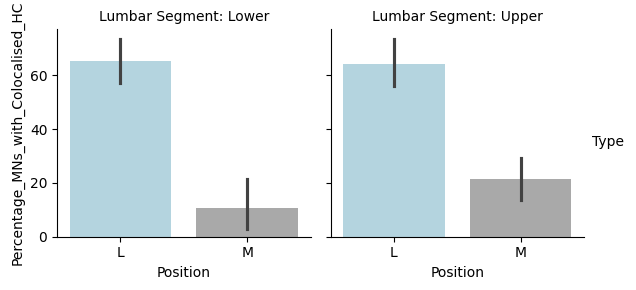

In [414]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette (adjust as needed)
custom_palette = {"M": "darkgrey", "L": "lightblue"}

# Set hue order (Other first, then HC)
#hue_order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(MN, col="Lumbar Segment", col_wrap=2, sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="Percentage_MNs_with_Colocalised_HC", 
    hue="Position", 
    #hue_order=hue_order, 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

# Show plot
plt.show()


In [233]:
MN

,Position,Lumbar_Segment,Image ID,MN ID,Total_MNs,MNs_with_Colocalised_HC,Total_Colocalised_HCs,Percentage_MNs_with_Colocalised_HC,Average_Colocalised_HC,Average_Colocalised_HC_All,Animal
0,L,Lower,1035,MN A,1,1,3,100.0,3.0,3.0,1
1,L,Lower,1035,MN B,1,0,0,0.0,NaN,0.0,1
2,L,Lower,1035,MN C,1,1,2,100.0,2.0,2.0,1
3,L,Lower,1035,MN D,1,0,0,0.0,NaN,0.0,1
4,L,Lower,1037,MN A,1,1,6,100.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...
368,M,Upper,1091,MN C,1,1,1,100.0,1.0,1.0,1
369,M,Upper,1093,MN A,1,1,6,100.0,6.0,6.0,1
370,M,Upper,1093,MN B,1,0,0,0.0,NaN,0.0,1
371,M,Upper,1093,MN C,1,0,0,0.0,NaN,0.0,1


In [236]:
colocalisedMN

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal,log_HC
5,1001,MN F,M,Upper,6310,2,6308,238,6072,2,236,0,6072,2413.150,2487.290,1,1.098612
10,1003,MN A,L,Upper,6754,1,6753,153,6601,1,152,0,6601,756.690,688.760,1,0.693147
16,1004,MN B,M,Upper,10907,1,10906,492,10415,1,491,0,10415,2096.770,2444.810,1,0.693147
17,1004,MN C,M,Upper,5725,1,5724,413,5312,1,412,0,5312,3256.500,3694.120,1,0.693147
20,1005,MN A,M,Upper,13868,4,13864,1091,12777,4,1087,0,12777,8235.154,7999.836,1,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522,2,0.693147
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439,2,0.693147
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110,2,1.609438
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540,2,1.386294


In [256]:
filtered = colocalisedMN.query("Animal == '2' and Position == 'M'")


In [257]:
filtered

,Image ID,MN ID,Position,Lumbar_Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume,Animal,log_HC
69,1014,MN A,M,Upper,7033,3,7030,450,6583,1,449,2,6581,2848.597,3242.97,2,0.693147
70,1014,MN B,M,Upper,2136,1,2135,235,1901,1,234,0,1901,1617.770,1773.38,2,0.693147
71,1014,MN C,M,Upper,7754,3,7751,227,7527,3,224,0,7527,1330.310,1833.94,2,1.386294
85,1018,MN B,M,Upper,2700,4,2696,262,2438,2,260,2,2436,3083.030,3735.58,2,1.098612
93,1020,MN A,M,Upper,12322,14,12308,682,11640,6,676,8,11632,4146.480,5144.01,2,1.945910


In [246]:
grouped

,Animal,Position,Lumbar_Segment,Colocalised_HC
0,1,L,Lower,3.553191
1,1,L,Upper,3.064516
2,1,M,Lower,2.750000
3,1,M,Upper,2.250000
4,2,L,Lower,1.500000
5,2,L,Upper,3.312500
6,2,M,Upper,2.600000
7,3,L,Lower,3.718750
8,3,L,Upper,3.000000
9,3,M,Upper,2.400000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


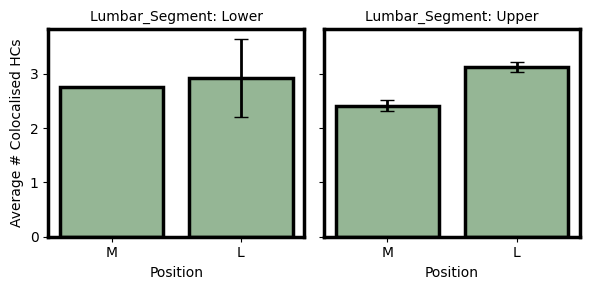

In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Compute average colocalised HCs per MN per Animal × Position × Segment
grouped = (
   colocalisedMN
    .groupby(['Animal', 'Position', 'Lumbar_Segment'])['Colocalised_HC']
    .mean()
    .reset_index()
)



# STEP 2: Aggregate across animals to get mean ± SE
summary_df = (
    grouped
    .groupby(['Position', 'Lumbar_Segment'])['Colocalised_HC']
    .agg(mean='mean', sem='sem')
    .reset_index()
)

# Order positions
summary_df['Position'] = pd.Categorical(summary_df['Position'], categories=['M', 'L'], ordered=True)
summary_df = summary_df.sort_values(['Lumbar_Segment', 'Position'])

# STEP 3: Plot in matched formatting
custom_palette = {"M": "darkseagreen", "L": "darkseagreen"}

g = sns.FacetGrid(
    summary_df,
    col="Lumbar_Segment",
    col_wrap=2,
    sharey=True,
    despine=False
)

g.map_dataframe(
    sns.barplot,
    x="Position",
    y="mean",
    hue="Position",
    palette=custom_palette,
    linewidth=2.5,
    edgecolor="black",
    dodge=False,
    ci=None
)

bar_width = 0.4

# Add manual error bars
for ax, (_, group) in zip(g.axes.flat, summary_df.groupby("Lumbar_Segment")):
    positions = group['Position']
    x_coords = np.arange(len(positions))
    errors = group['sem']
    means = group['mean']

    ax.errorbar(
        x=x_coords,
        y=means,
        yerr=errors,
        fmt='none',
        ecolor='black',
        elinewidth=2,
        capsize=5
    )

    ax.set_xticks(x_coords)
    ax.set_xticklabels(positions)

    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    ax.set_xlabel("Position")
    ax.set_ylabel("Average # Colocalised HCs")

# Final touches
g.set_titles("Lumbar_Segment: {col_name}")
g.set_axis_labels("Position", "Average # Colocalised HCs")
#g.add_legend(title="Position")

plt.tight_layout()
plt.show()


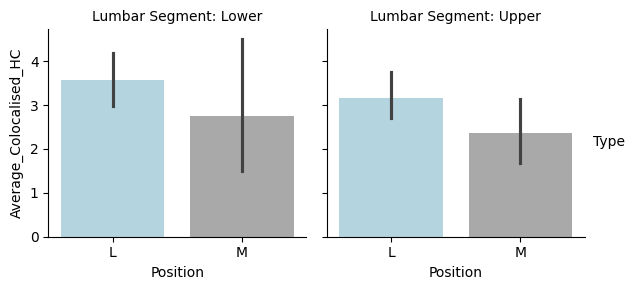

In [415]:
#of MNs that are colocalised with HC - on average how many HCs

import matplotlib.pyplot as plt

# Define a custom color palette (adjust as needed)
custom_palette = {"M": "darkgrey", "L": "lightblue"}

# Set hue order (Other first, then HC)
#hue_order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(MN, col="Lumbar Segment", col_wrap=2, sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="Average_Colocalised_HC", 
    hue="Position", 
    #hue_order=hue_order, 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

# Show plot
plt.show()


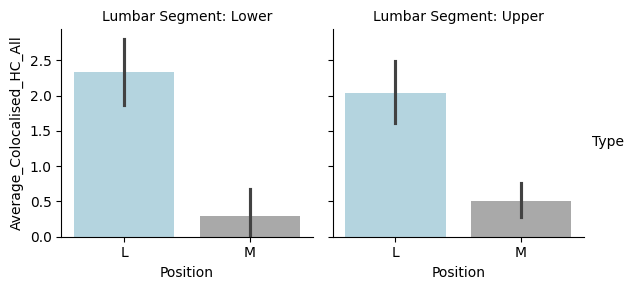

In [416]:
#of all MNs - on average how many HCs - dont include

import matplotlib.pyplot as plt

# Define a custom color palette (adjust as needed)
custom_palette = {"M": "darkgrey", "L": "lightblue"}

# Set hue order (Other first, then HC)
#hue_order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(MN, col="Lumbar Segment", col_wrap=2, sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="Average_Colocalised_HC_All", 
    hue="Position", 
    #hue_order=hue_order, 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Type")

# Show plot
plt.show()


In [417]:
MN

,Position,Lumbar Segment,Image ID,MN ID,Total_MNs,MNs_with_Colocalised_HC,Total_Colocalised_HCs,Percentage_MNs_with_Colocalised_HC,Average_Colocalised_HC,Average_Colocalised_HC_All
0,L,Lower,1035,MN A,1,1,3,100.0,3.0,3.0
1,L,Lower,1035,MN B,1,0,0,0.0,NaN,0.0
2,L,Lower,1035,MN C,1,1,2,100.0,2.0,2.0
3,L,Lower,1035,MN D,1,0,0,0.0,NaN,0.0
4,L,Lower,1037,MN A,1,1,6,100.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...
368,M,Upper,1091,MN C,1,1,1,100.0,1.0,1.0
369,M,Upper,1093,MN A,1,1,6,100.0,6.0,6.0
370,M,Upper,1093,MN B,1,0,0,0.0,NaN,0.0
371,M,Upper,1093,MN C,1,0,0,0.0,NaN,0.0


In [41]:
ColocMN

,Image ID,MN ID,Position,Lumbar Segment,Total_Synapses,Total_HC,Total_Other,Colocalised_Synapses,Not_Colocalised_Synapses,Colocalised_HC,Colocalised_Other,Not_Colocalised_HC,Not_Colocalised_Other,MN_Area,MN_Volume
0,1001,MN A,M,Upper,3159,0,3159,287,2872,0,287,0,2872,2850.969,2783.454
1,1001,MN B,M,Upper,1639,0,1639,163,1476,0,163,0,1476,1210.523,1022.167
2,1001,MN C,M,Upper,1887,0,1887,217,1670,0,217,0,1670,1543.300,1849.940
3,1001,MN D,M,Upper,7408,0,7408,157,7251,0,157,0,7251,1109.687,1190.923
4,1001,MN E,M,Upper,3409,0,3409,74,3335,0,74,0,3335,531.328,599.755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1094,MN G,L,Upper,2494,5,2489,102,2392,1,101,4,2388,1608.070,921.522
369,1094,MN H,L,Upper,1389,4,1385,67,1322,1,66,3,1319,891.614,701.439
370,1094,MN I,L,Upper,1091,6,1085,112,979,4,108,2,977,1513.460,1341.110
371,1094,MN J,L,Upper,1175,8,1167,108,1067,3,105,5,1062,1483.570,1564.540


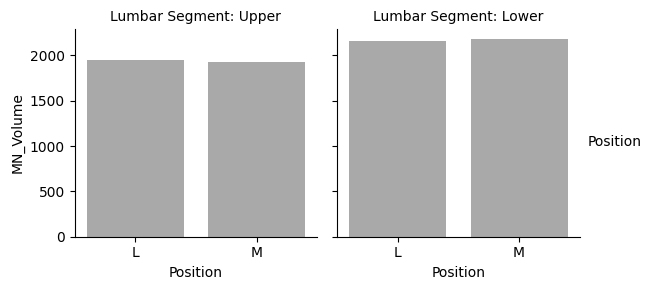

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = {"M": "darkgrey", "L": "darkgrey"}

# Set hue order
hue_order = ["L", "M"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(ColocMN, col="Lumbar Segment", col_wrap=2, sharey=True)

# Map the barplot correctly with hue inside sns.barplot()
g.map_dataframe(
    sns.barplot, 
    x="Position",  # Use Position for x-axis instead of Lumbar Segment
    y="MN_Volume", 
    hue="Position",  # Ensure hue is passed inside barplot()
    order=hue_order,  # Ensure correct ordering of M and L
    palette=custom_palette, 
    errorbar=None,  # Suppress error bars if not needed
)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Position")

# Show plot
plt.show()


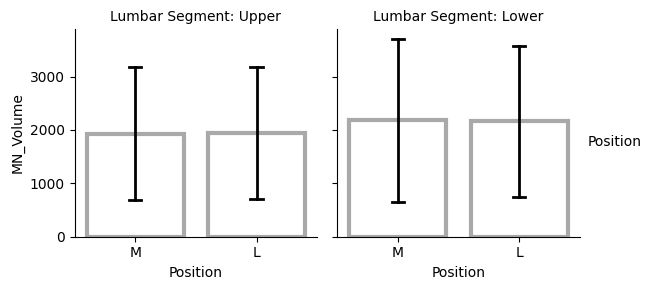

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette for the outline
custom_palette = {"M": "darkgrey", "L": "darkgrey"}  # Dark grey outline for both M and L

# Set hue order
hue_order = ["L", "M"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(ColocMN, col="Lumbar Segment", col_wrap=2, sharey=True)

# Map the barplot correctly with transparent bars, thick outlines, and updated error bars
g.map_dataframe(
    sns.barplot, 
    x="Position",  
    y="MN_Volume", 
    hue="Position",
    hue_order=hue_order,
    palette=custom_palette,  # Keeps dark grey outlines
    linewidth=3,  # Thick bar outlines
    edgecolor="darkgrey",  # Dark grey border
    facecolor=(0, 0, 0, 0),  # Fully transparent fill
    errorbar="sd",  # Adds standard deviation error bars
    capsize=0.1,  # Adds caps to error bars
    err_kws={'color': 'black', 'linewidth': 2}  # Updated error bar settings
)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Position")

# Show plot
plt.show()



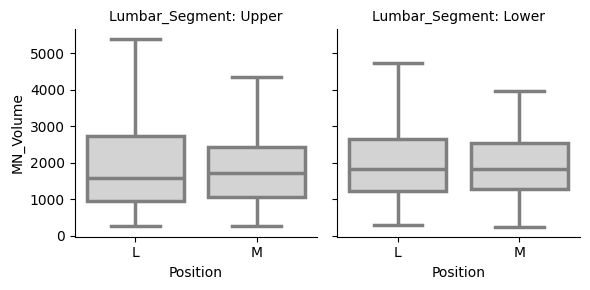

In [66]:
# plotting HC Volume data by Posiiton and Lumbar Segment
# Define a custom color palette (adjust as needed)
custom_palette = {"M": "lightgrey", "L": "lightgrey"}  # Adjust colors based on your data

# Set hue order (Other first, then HC)
hue_order = ["L", "M"]
order = ["L", "M"]
# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(ColocMN, col="Lumbar Segment", col_wrap=2, sharey=True)

# Map the boxplot with the custom color palette
g.map_dataframe(sns.boxplot, x="Position", y="MN_Volume", hue="Position", hue_order = hue_order, order = order,
            palette=custom_palette, linewidth = 2.5, showfliers=False)

# Adjust titles and legends
g.set_titles("Lumbar_Segment: {col_name}")
#g.add_legend(title="Position")

plt.show()

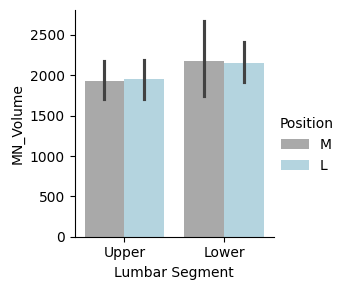

In [45]:
# MN size by Position and lumbar segment
# bar plot - HC only - does VGLUT1 colocalisation affect volume?
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette (adjust as needed)
custom_palette = {"M": "darkgrey", "L": "lightblue"}

# Set hue order (Other first, then HC)
hue_order = ["M", "L"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(ColocMN, sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Lumbar Segment", 
    y="MN_Volume", 
    hue="Position", 
    hue_order=hue_order, 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
#g.set_titles("Lumbar Segment: {col_name}")
g.add_legend(title="Position")

# Show plot
plt.show()

# Percentages HC vs Other

In [418]:
#datahead = data.head()

In [419]:
#datahead.to_csv('datahead.csv')

In [182]:
# Calculate overall percentages
total_count = len(data)
hc_count = len(data[data['Type'] == 'HC'])
other_count = total_count - hc_count

hc_percentage_overall = (hc_count / total_count) * 100
other_percentage_overall = (other_count / total_count) * 100

# Calculate percentages by Position and Lumbar Segment
percentage_by_position_lumbar = data.groupby(['Position', 'Lumbar_Segment'])['Type'].value_counts(normalize=True) * 100

# Convert to DataFrame for better readability
percentage_by_position_lumbar_df = percentage_by_position_lumbar.unstack().fillna(0)

# Display results
percentage_by_position_lumbar_df['HC Percentage'] = percentage_by_position_lumbar_df.get('HC', 0)
percentage_by_position_lumbar_df['Other Percentage'] = percentage_by_position_lumbar_df.get('Other', 0)

# Display overall percentages
hc_percentage_overall, other_percentage_overall


(0.05996881284117549, 99.94003118715882)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


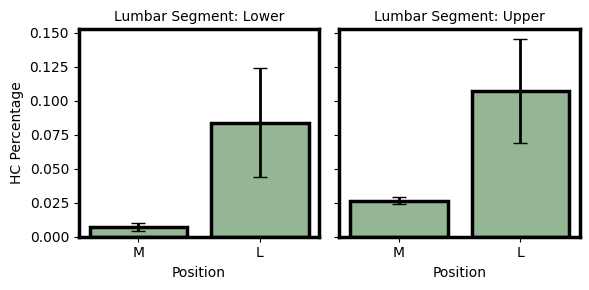

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Calculate %HC per animal in each group
# Filter to HC and Other types
data_filtered = data[data['Type'].isin(['HC', 'Other'])]

# Count HC and total per animal, Position, and Segment
grouped = (
    data_filtered
    .groupby(['Animal', 'Position', 'Lumbar_Segment'])['Type']
    .value_counts()
    .unstack()
    .fillna(0)
    .reset_index()
)

# Compute %HC
grouped['HC Percentage'] = grouped['HC'] / (grouped['HC'] + grouped['Other']) * 100

# STEP 2: Aggregate across animals to get mean ± SE
summary_df = (
    grouped
    .groupby(['Position', 'Lumbar_Segment'])['HC Percentage']
    .agg(['mean', 'sem'])
    .reset_index()
)

# Sort positions
summary_df['Position'] = pd.Categorical(summary_df['Position'], categories=['M', 'L'], ordered=True)
summary_df = summary_df.sort_values(['Lumbar_Segment', 'Position'])

# STEP 3: Plot
custom_palette = {"M": "darkseagreen", "L": "darkseagreen"}

g = sns.FacetGrid(
    summary_df,
    col="Lumbar_Segment",
    col_wrap=2,
    sharey=True,
    despine=False
)

g.map_dataframe(
    sns.barplot,
    x="Position",
    y="mean",
    hue="Position",
    palette=custom_palette,
    linewidth=2.5,
    edgecolor="black",
    dodge=False,
    ci=None,
    # Note: We will add error bars manually
)
bar_width = 0.4
# Add error bars manually (standard error)
for ax, (_, group) in zip(g.axes.flat, summary_df.groupby("Lumbar_Segment")):
    positions = group['Position']
    x_coords = range(len(positions))
    errors = group['sem']
    means = group['mean']
    ax.errorbar(
        x=x_coords,
        y=means,
        yerr=errors,
        fmt='none',
        ecolor='black',
        elinewidth=2,
        capsize=5,
        #width = bar_width
        
    )

    # Set x-tick labels
    ax.set_xticks(x_coords)
    ax.set_xticklabels(positions)

    # Outer border
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    ax.set_xlabel("Position")
    ax.set_ylabel("HC Percentage")

# Titles and layout
g.set_titles("Lumbar Segment: {col_name}")
g.set_axis_labels("Position", "HC Percentage")
plt.tight_layout()
plt.show()


/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_76955/3202787070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc_percentage_plot_df['Position'] = pd.Categorical(


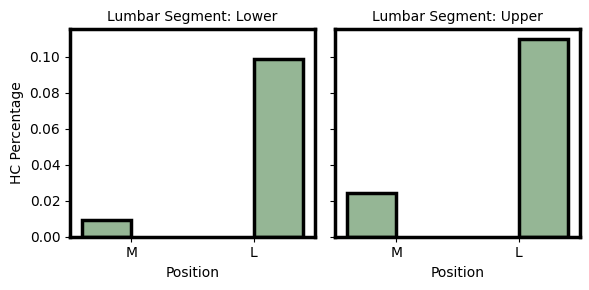

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'M' appears before 'L'
hc_percentage_plot_df['Position'] = pd.Categorical(
    hc_percentage_plot_df['Position'], categories=['M', 'L'], ordered=True
)

# Define a custom color palette
custom_palette = {"M": "darkseagreen", "L": "darkseagreen"}

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(
    hc_percentage_plot_df,
    col="Lumbar_Segment",
    col_wrap=2,
    sharey=True,
    despine=False  # Leave spines on so we can modify them
)

# Use sns.barplot with reduced bar width (use dodge to simulate this)
g.map_dataframe(
    sns.barplot,
    x="Position",
    y="HC Percentage",
    hue="Position",
    palette=custom_palette,
    linewidth=2.5,
    dodge=0.4,  # Reduces bar width
    edgecolor="black"
)

# Format each axis
for ax in g.axes.flatten():
    # Outer black border
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
        #spine.set_edgecolor("black")
    ax.set_xlabel("Position")
    ax.set_ylabel("HC Percentage")

# Remove legend if not needed
#g.add_legend(title="Position")

# Adjust titles
g.set_titles("Lumbar Segment: {col_name}")

# Tight layout
plt.tight_layout()
plt.show()


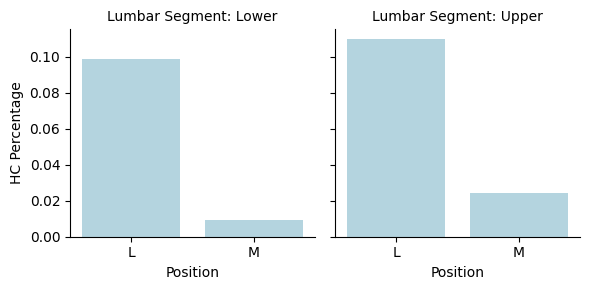

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting
percentage_plot_df = percentage_by_position_lumbar_df[['HC Percentage', 'Other Percentage']].reset_index()

# Filter only HC Percentage for plotting
hc_percentage_plot_df = percentage_plot_df[['Position', 'Lumbar_Segment', 'HC Percentage']]

# Define a custom color palette
custom_palette = {"M": "lightblue", "L": "lightblue"}

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(hc_percentage_plot_df, col="Lumbar_Segment", col_wrap=2, sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="HC Percentage", 
    hue="Position", 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
g.set_titles("Lumbar Segment: {col_name}")
#g.add_legend(title="Position")

# Show plot
plt.show()


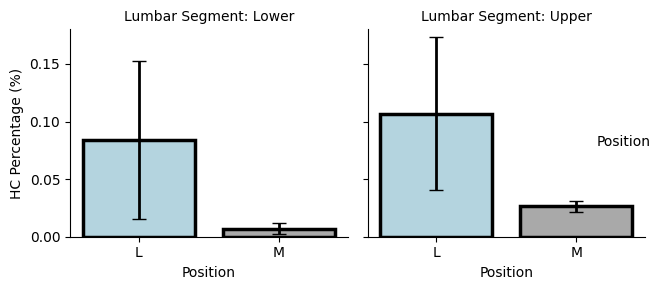

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate percentages per Animal
grouped = (
    data.groupby(['Animal', 'Position', 'Lumbar_Segment'])['Type']
    .value_counts(normalize=True)
    .mul(100)
    .unstack()
    .fillna(0)
    .reset_index()
)

# Step 2: Aggregate HC percentages to get mean and std per Position & Lumbar_Segment
summary = (
    grouped.groupby(['Position', 'Lumbar_Segment'])['HC']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'HC_Percentage_Mean', 'std': 'HC_Percentage_Std'})
)

# Step 3: Plot with error bars
custom_palette = {"M": "darkgrey", "L": "lightblue"}

g = sns.FacetGrid(summary, col="Lumbar_Segment", col_wrap=2, sharey=True)

g.map_dataframe(
    sns.barplot,
    x="Position",
    y="HC_Percentage_Mean",
    hue="Position",
    palette=custom_palette,
    linewidth=2.5,
    errorbar=None,
    edgecolor="black"
)

# Add error bars manually
for ax, (_, subdata) in zip(g.axes.flatten(), summary.groupby('Lumbar_Segment')):
    xticks = ax.get_xticks()
    for j, row in enumerate(subdata.itertuples()):
        ax.errorbar(
            x=xticks[j],
            y=row.HC_Percentage_Mean,
            yerr=row.HC_Percentage_Std,
            fmt='none',
            c='black',
            capsize=5,
            linewidth=2,
        )

# Final plot tweaks
g.set_titles("Lumbar Segment: {col_name}")
g.set_axis_labels("Position", "HC Percentage (%)")
g.set(ylim=(0, 0.18))
g.add_legend(title="Position")
plt.tight_layout()
plt.show()



In [50]:
summary

,Position,Lumbar_Segment,HC_Percentage_Mean,HC_Percentage_Std
0,L,Lower,0.083854,0.068880
1,L,Upper,0.106786,0.066340
2,M,Lower,0.007066,0.004802
3,M,Upper,0.026445,0.004707


In [52]:
grouped

Type,Animal,Position,Lumbar_Segment,HC,Other
0,1,L,Lower,0.147529,99.852471
1,1,L,Upper,0.087619,99.912381
2,1,M,Lower,0.011192,99.988808
3,1,M,Upper,0.021521,99.978479
4,2,L,Lower,0.010742,99.989258
5,2,L,Upper,0.180600,99.819400
6,2,M,Lower,0.001795,99.998205
7,2,M,Upper,0.030900,99.969100
8,3,L,Lower,0.093292,99.906708
9,3,L,Upper,0.052140,99.947860


## for vglut

In [422]:
hc_coloc = data[(data['Distance to VGLUT1'] <= 0.1) & (data['Type'] == 'HC')]

In [423]:
# Calculate overall percentages
total_count_vglut = len(VGLUT)
hc_coloc_count = len(data[(data['Distance to VGLUT1'] <= 0.1) & (data['Type'] == 'HC')])

hc_percentage_overall_vglut = (hc_coloc_count / total_count_vglut) * 100


In [435]:
VGLUT_count_by_group = VGLUT.groupby(['Position', 'Lumbar Segment']).size().reset_index(name='VGLUT Count')
VGLUT_count_by_group.rename(columns={'Lumbar Segment': 'Lumbar_Segment'}, inplace=True)

In [440]:
VGLUT_count_by_group

,Position,Lumbar_Segment,VGLUT Count
0,L,Lower,21388
1,L,Upper,20865
2,M,Lower,12327
3,M,Upper,14571


In [441]:
# Calculate the count of HC where 'Distance to VGLUT1' <= 0.1, grouped by Position and Lumbar Segment
hc_coloc_count_by_group = data[(data['Distance to VGLUT1'] <= 0.1) & (data['Type'] == 'HC')] \
    .groupby(['Position', 'Lumbar_Segment']) \
    .size() \
    .reset_index(name='HC Colocalised Count')


In [442]:
hc_coloc_count_by_group


,Position,Lumbar_Segment,HC Colocalised Count
0,L,Lower,525
1,L,Upper,508
2,M,Lower,21
3,M,Upper,92


In [444]:
merged_df = pd.merge(VGLUT_count_by_group, hc_coloc_count_by_group, on=['Position', 'Lumbar_Segment'], how='outer')
merged_df

,Position,Lumbar_Segment,VGLUT Count,HC Colocalised Count
0,L,Lower,21388,525
1,L,Upper,20865,508
2,M,Lower,12327,21
3,M,Upper,14571,92


In [ ]:
# Percentage of VGLUT that are colocalised with HCs

/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_29085/2073705170.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['HC Colocalised Percentage'].fillna(0, inplace=True)


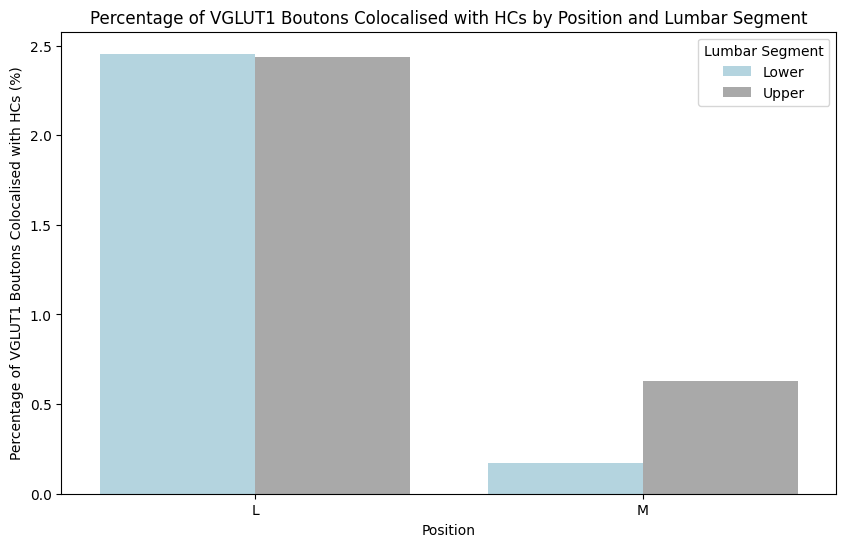

In [449]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of HC Colocalised relative to VGLUT Count
merged_df['HC Colocalised Percentage'] = (merged_df['HC Colocalised Count'] / merged_df['VGLUT Count']) * 100

custom_palette = {"Upper": "darkgrey", "Lower": "lightblue"}


# Fill NaN or infinite values with 0 (in case of division by zero)
merged_df['HC Colocalised Percentage'].fillna(0, inplace=True)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Position', y='HC Colocalised Percentage', hue='Lumbar_Segment', palette= custom_palette)

# Adjust labels and title
plt.xlabel('Position')
plt.ylabel('Percentage of VGLUT1 Boutons Colocalised with HCs (%)')
plt.title('Percentage of VGLUT1 Boutons Colocalised with HCs by Position and Lumbar Segment')
plt.legend(title="Lumbar Segment")

# Show the plot
plt.show()


In [1]:
import sys
print(sys.version)


3.13.2 (v3.13.2:4f8bb3947cf, Feb  4 2025, 11:51:10) [Clang 15.0.0 (clang-1500.3.9.4)]


In [2]:
!jupyter lab --version


4.3.5


In [3]:
import nbformat
import re

def extract_imports_from_notebook(path):
    with open(path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    
    code_cells = [cell['source'] for cell in nb.cells if cell['cell_type'] == 'code']
    all_code = '\n'.join(code_cells)
    
    # Match both `import xxx` and `from xxx import yyy`
    imports = re.findall(r'^\s*(?:import|from)\s+([a-zA-Z0-9_\.]+)', all_code, re.MULTILINE)
    return sorted(set(imports))

# Example
used_packages = extract_imports_from_notebook("Stats.ipynb")
print(used_packages)


['matplotlib.pyplot', 'numpy', 'pandas', 'patsy', 'scipy.stats', 'seaborn', 'statsmodels.api', 'statsmodels.formula.api', 'statsmodels.genmod.families', 'statsmodels.stats.diagnostic', 'statsmodels.stats.multitest', 'statsmodels.stats.outliers_influence', 'statsmodels.stats.stattools', 'sys']


In [5]:
import nbformat
import re
import importlib

def extract_imports_with_versions(path):
    with open(path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    
    code_cells = [cell['source'] for cell in nb.cells if cell['cell_type'] == 'code']
    all_code = '\n'.join(code_cells)
    
    # Match `import xxx` and `from xxx import yyy`
    raw_imports = re.findall(r'^\s*(?:import|from)\s+([a-zA-Z0-9_\.]+)', all_code, re.MULTILINE)
    unique_imports = sorted(set(raw_imports))
    
    versions = {}
    for name in unique_imports:
        # Use the top-level module only
        top_level = name.split('.')[0]
        try:
            mod = importlib.import_module(top_level)
            version = getattr(mod, '__version__', 'N/A')
        except Exception as e:
            version = f'Error: {e}'
        versions[name] = version

    return versions

# Example usage
used_packages_with_versions = extract_imports_with_versions("Stats.ipynb")
for pkg, ver in used_packages_with_versions.items():
    print(f"{pkg}: {ver}")



matplotlib.pyplot: 3.10.0
nbformat: 5.10.4
numpy: 2.2.3
pandas: 2.2.3
patsy: 1.0.1
re: 2.2.1
scipy.stats: 1.15.2
seaborn: 0.13.2
statsmodels.api: 0.14.4
statsmodels.formula.api: 0.14.4
statsmodels.genmod.families: 0.14.4
statsmodels.stats.diagnostic: 0.14.4
statsmodels.stats.multitest: 0.14.4
statsmodels.stats.outliers_influence: 0.14.4
statsmodels.stats.stattools: 0.14.4
sys: N/A
